# TRABAJO PRACTICO UTN - DATA SCIENCE

## Análisis de Datos de Propiedades Inmobiliarias (Properati) - Mercado Inmobiliario

## Objetivos:
*   Aplicar conocimientos de estadísticas y aprendizaje automático a un dataset de datos abiertos de internet.
*   Conocer el mercado inmobiliario a través del análisis de datos para asesorar a clientes en la toma de decisiones y planes de acción futuros.

Este notebook presenta un análisis reorganizado y optimizado del conjunto de datos de Properati. Se han eliminado secciones duplicadas y consolidado el contenido relevante, para una exploración clara de los datos y la identificación de segmentos de mercado clave.

## 1. Configuración Inicial y Carga de Datos

In [1]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Importar otras librerías si son necesarias más adelante (sklearn, tensorflow, torch, scipy, statsmodels)

# Configurar opciones de visualización de pandas
# pd.set_option('display.max_rows', None) # Mantener configuración existente
# pd.set_option('display.max_columns', None) # Mantener configuración existente
print("Librerías importadas exitosamente.")

# Montar Google Drive (si el archivo está en Drive)
from google.colab import drive
drive.mount('/content/drive')
print("Google Drive montado exitosamente.")

# Cargar el conjunto de datos
# Asegúrate de que la ruta del archivo sea correcta
file_path = "/content/drive/MyDrive/2025 cs datos/tp/datos_properati.csv"
df = pd.read_csv(file_path)
print("csv cargado exitosamente.")

# Convertir 'rooms' a entero. Manejar NaNs si los hubiera antes de imputación (aunque imputamos luego)
# Usaremos errors='coerce' por si hay valores no numéricos, que se convertirán a NaN y se imputarán.
df['rooms'] = pd.to_numeric(df['rooms'], errors='coerce')
df['rooms'] = df['rooms'].fillna(df['rooms'].mean()).astype(int)


# Aplicar formato de visualización a las columnas de precio y mostrar las primeras filas
# Esto crea una copia del DataFrame solo para visualización con formato string
df_display = df.copy()
# Aplicar formato con separador de miles (.) y sin decimales
df_display['price_aprox_usd'] = df_display['price_aprox_usd'].apply(lambda x: f"{x:,.0f}".replace(",", "."))
df_display['price_usd_per_m2'] = df_display['price_usd_per_m2'].apply(lambda x: f"{x:,.0f}".replace(",", "."))
# Aplicar formato a las columnas de superficie con 2 decimales, coma para decimales y punto para miles
df_display['surface_total_in_m2'] = df_display['surface_total_in_m2'].apply(lambda x: f"{x:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))
df_display['surface_covered_in_m2'] = df_display['surface_covered_in_m2'].apply(lambda x: f"{x:,.2f}".replace(",", "X").replace(".", ",").replace("X", "."))


print("\nPrimeras filas del DataFrame con formato de visualización:")
display(df_display.head())

# Puedes mostrar el DataFrame original sin formato en otro momento si necesitas los números
# display(df.head())

Librerías importadas exitosamente.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Google Drive montado exitosamente.
csv cargado exitosamente.

Primeras filas del DataFrame con formato de visualización:


created_on operation property_type  \
0  2017-09-22      sell         house   
1  2017-08-01      sell         store   
2  2017-08-02      sell         store   
3  2017-08-03      sell         store   
4  2017-08-08      sell         store   

                             place_with_parent_names  \
0  |Argentina|Capital Federal|Palermo|Palermo Viejo|   
1                |Argentina|Capital Federal|Palermo|   
2   |Argentina|Capital Federal|Palermo|Palermo Soho|   
3                |Argentina|Capital Federal|Palermo|   
4           |Argentina|Capital Federal|Barrio Norte|   

                         lat-lon        lat        lon price_aprox_usd  \
0  -34.5889531469,-58.4298817776 -34.588953 -58.429882       2.000.000   
1          -34.586069,-58.414431 -34.586069 -58.414431         790.000   
2         -34.589723,-58.4325664 -34.589723 -58.432566         343.000   
3        -34.5923646,-58.4144028 -34.592365 -58.414403         145.000   
4   -34.585652875,-58.4114933233 -34.585653 -58.411493         175.000   

  surface_total_in_m2 surface_covered_in_m2 price_usd_per_m2  floor  rooms  \
0              312,00                   nan            6.410    NaN      3   
1              121,00                121,00            6.529    NaN      3   
2              122,00                108,00            2.811    NaN      2   
3               24,00                 24,00            6.042    NaN      3   
4               24,00                 24,00            7.292    NaN      3   

   expenses                                      properati_url   barrio  \
0       NaN  https://www.properati.com.ar/2os_venta_casa_pa...  PALERMO   
1       NaN  https://www.properati.com.ar/1cl7l_venta_local...  PALERMO   
2       NaN  https://www.properati.com.ar/1cm8w_venta_local...  PALERMO   
3       NaN  https://www.properati.com.ar/1covk_venta_local...  PALERMO   
4       NaN  https://www.properati.com.ar/1csk7_venta_local...  PALERMO   

   comuna  
0    14.0  
1    14.0  
2    14.0  
3    14.0  
4    14.0

## 2. Exploración Inicial y Limpieza de Datos

### 2.1 Descripción de las Columnas (DICCIONARIO)

In [2]:
# @title
# Diccionario con descripción de columnas relevantes (basado en el diccionario original del usuario)
my_dictionary = {
    "created_on": "Fecha de ingreso de la propiedad",
    "property_type": "Clasificación por tipo (casa, apartamento, etc.)",
    "place_with_parent_names": "Ubicación geográfica detallada",
    "price_aprox_usd": "Valor aproximado de la propiedad en USD",
    "surface_total_in_m2": "Superficie total de la propiedad en m²",
    "surface_covered_in_m2": "Superficie cubierta en m²",
    "price_usd_per_m2": "Precio de construcción por m² (original, puede ser inconsistente)",
    "rooms": "Cantidad de habitaciones"
}
print("Diccionario de columnas:")
print(my_dictionary)

# Ver nombres de columnas actuales
print("\nColumnas del DataFrame:")
print(df.columns)

Diccionario de columnas:
{'created_on': 'Fecha de ingreso de la propiedad', 'property_type': 'Clasificación por tipo (casa, apartamento, etc.)', 'place_with_parent_names': 'Ubicación geográfica detallada', 'price_aprox_usd': 'Valor aproximado de la propiedad en USD', 'surface_total_in_m2': 'Superficie total de la propiedad en m²', 'surface_covered_in_m2': 'Superficie cubierta en m²', 'price_usd_per_m2': 'Precio de construcción por m² (original, puede ser inconsistente)', 'rooms': 'Cantidad de habitaciones'}

Columnas del DataFrame:
Index(['created_on', 'operation', 'property_type', 'place_with_parent_names',
       'lat-lon', 'lat', 'lon', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'floor', 'rooms',
       'expenses', 'properati_url', 'barrio', 'comuna'],
      dtype='object')


### 2.2 Eliminación de Columnas Irrelevantes

Basado en las decisiones de proyecto del análisis original, se eliminan las columnas consideradas no relevantes: `operation` porque son todas ventas, `lat-lon` pero se conserva LAT y LON, `expenses`, `floor`, `properati_url` son valores irrelevantes para el estudio.

In [3]:
# @title
# Eliminar columnas
cols_to_drop = ["operation", "lat-lon", "expenses", "floor", "properati_url"]
df = df.drop(cols_to_drop, axis=1)

print("Columnas eliminadas. DataFrame actualizado:")
display(df.head())

Columnas eliminadas. DataFrame actualizado:


created_on property_type  \
0  2017-09-22         house   
1  2017-08-01         store   
2  2017-08-02         store   
3  2017-08-03         store   
4  2017-08-08         store   

                             place_with_parent_names        lat        lon  \
0  |Argentina|Capital Federal|Palermo|Palermo Viejo| -34.588953 -58.429882   
1                |Argentina|Capital Federal|Palermo| -34.586069 -58.414431   
2   |Argentina|Capital Federal|Palermo|Palermo Soho| -34.589723 -58.432566   
3                |Argentina|Capital Federal|Palermo| -34.592365 -58.414403   
4           |Argentina|Capital Federal|Barrio Norte| -34.585653 -58.411493   

   price_aprox_usd  surface_total_in_m2  surface_covered_in_m2  \
0        2000000.0                312.0                    NaN   
1         790000.0                121.0                  121.0   
2         343000.0                122.0                  108.0   
3         145000.0                 24.0                   24.0   
4         175000.0                 24.0                   24.0   

   price_usd_per_m2  rooms   barrio  comuna  
0       6410.256410      3  PALERMO    14.0  
1       6528.925620      3  PALERMO    14.0  
2       2811.475410      2  PALERMO    14.0  
3       6041.666667      3  PALERMO    14.0  
4       7291.666667      3  PALERMO    14.0

objetivo pendiente: si bien se expresa que los valores numericos de precios, superficies y habitaciones deben ser numeros enteros con separación de miles con puntos, a lo largo del trabajo la interfaz no lo muestra así.

### 2.3 Manejo de Valores Nulos

In [4]:
# @title
# Verificar datos NULL
print("Información del DataFrame antes de imputar nulos:")
df.info()

# Seleccionar solo las columnas numéricas (ahora incluyendo 'rooms' como float si es necesario antes de convertir)
numeric_cols_before_int = df.select_dtypes(include=np.number).columns.tolist()

# Excluir 'rooms' de la imputación con media si ya la manejamos antes, o asegurarnos de que se maneje correctamente
# Si la conversión a int se hace después de la imputación, la imputación se aplica a float
# Como convertimos a int *antes* de la imputación general en 0114b207, 'rooms' ya no tendrá NaNs aquí por la imputación con media y conversión a int.
# Pero para estar seguros y cubrir el caso si el orden cambiara, podemos imputar con la media para floats primero y luego convertir rooms a int.
# Revirtiendo la estrategia: imputar con media para *todos* los numéricos, y luego convertir rooms a int.

numeric_cols = df.select_dtypes(include=np.number).columns # Obtener columnas numéricas *después* de la posible conversión en 0114b207

# Rellenar los valores nulos en las columnas numéricas con la media de cada columna
# Usamos .loc para evitar SettingWithCopyWarning y asegurar la modificación en el DataFrame original
for col in numeric_cols:
    # Solo imputar si hay nulos en la columna
    if df.loc[:, col].isnull().any():
        df.loc[:, col] = df.loc[:, col].fillna(df.loc[:, col].mean())

# Asegurarse de que 'rooms' es entero DESPUÉS de la imputación general por si acaso
# Convertir 'rooms' a entero después de la imputación general
df['rooms'] = df['rooms'].astype(int)


# Verificar que no hay valores nulos en las columnas numéricas
print("\nValores nulos después de la imputación con la media y conversión de 'rooms' a entero:")
# Seleccionar columnas numéricas *después* de la conversión de rooms a int
numeric_cols_after_int = df.select_dtypes(include=np.number).columns
print(df[numeric_cols_after_int].isnull().sum())


print("\nInformación del DataFrame después de imputar nulos y convertir 'rooms' a entero:")
df.info()

Información del DataFrame antes de imputar nulos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18979 entries, 0 to 18978
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   created_on               18979 non-null  object 
 1   property_type            18979 non-null  object 
 2   place_with_parent_names  18979 non-null  object 
 3   lat                      18979 non-null  float64
 4   lon                      18979 non-null  float64
 5   price_aprox_usd          17445 non-null  float64
 6   surface_total_in_m2      16586 non-null  float64
 7   surface_covered_in_m2    16876 non-null  float64
 8   price_usd_per_m2         16037 non-null  float64
 9   rooms                    18979 non-null  int64  
 10  barrio                   18979 non-null  object 
 11  comuna                   18979 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.7+ MB

Valores nulos después 

Se verifica la presencia de valores nulos y se imputan los valores faltantes en las columnas numéricas con la media de cada columna, según la estrategia definida en el análisis original.

### 2.4 Identificación de Registros Duplicados

In [5]:
# @title
# ver registros duplicados
duplicated_rows = df[df.duplicated()]
print(f"Número de registros duplicados: {len(duplicated_rows)}")

# Si hay duplicados, se pueden eliminar si es necesario, pero el análisis original indicó que no había.
# Si quisieras eliminarlos: df = df.drop_duplicates().copy()

Número de registros duplicados: 36


Se utilizan métodos estadísticos y visualizaciones para identificar y comprender los valores que se desvían significativamente en las columnas numéricas clave.

## 3. Análisis de Valores Atípicos (Outliers)

### 3.1 Visualización de Valores Atípicos con Diagramas de Caja

Estadísticas descriptivas para: price_aprox_usd


count    1.897900e+04
mean     2.963559e+05
std      3.938806e+05
min      5.043300e+03
25%      1.250000e+05
50%      1.990000e+05
75%      3.000000e+05
max      1.350000e+07
Name: price_aprox_usd, dtype: float64

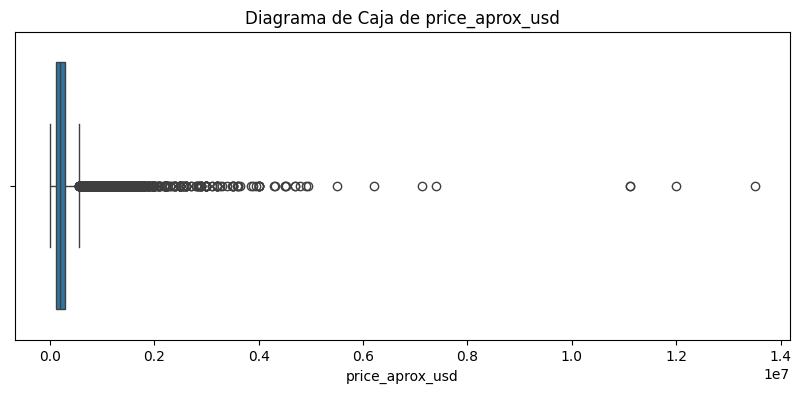

In [6]:
# @title
# Lista de columnas numéricas para visualizar
numerical_cols_outliers = ['price_aprox_usd']

# Generar un diagrama de caja para cada columna numérica
for col in numerical_cols_outliers:
    print(f"Estadísticas descriptivas para: {col}")
    display(df[col].describe())
    plt.figure(figsize=(10, 4)) # Hacer la figura más ancha (amplía eje x) y más corta (comprime vertical)
    sns.boxplot(x=df[col]) # Mantener la orientación horizontal
    plt.title(f'Diagrama de Caja de {col}')
    plt.xlabel(col) # Etiquetar eje X
    plt.ylabel('') # Eliminar la etiqueta del eje Y para un gráfico horizontal
    plt.show()

Estadísticas descriptivas para: surface_total_in_m2


count     18979.000000
mean        142.784758
std        1619.065947
min           0.000000
25%          51.000000
50%          86.000000
75%         142.784758
max      184000.000000
Name: surface_total_in_m2, dtype: float64

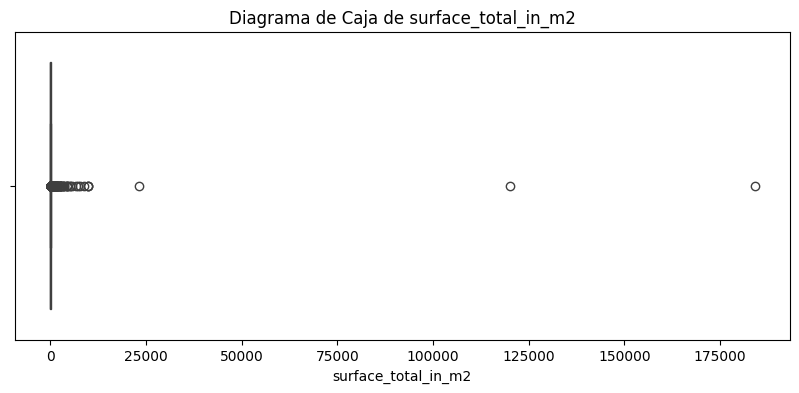

In [7]:
# @title
# Lista de columnas numéricas para visualizar
numerical_cols_outliers = ['surface_total_in_m2']

# Generar un diagrama de caja para cada columna numérica
for col in numerical_cols_outliers:
    print(f"Estadísticas descriptivas para: {col}")
    display(df[col].describe())
    plt.figure(figsize=(10, 4)) # Hacer la figura más ancha (amplía eje x) y más corta (comprime vertical)
    sns.boxplot(x=df[col]) # Mantener la orientación horizontal
    plt.title(f'Diagrama de Caja de {col}')
    plt.xlabel(col) # Etiquetar eje X
    plt.ylabel('') # Eliminar la etiqueta del eje Y para un gráfico horizontal
    plt.show()

Estadísticas descriptivas para: surface_covered_in_m2


count     18979.000000
mean        127.491171
std        1437.240136
min           1.000000
25%          45.000000
50%          75.000000
75%         127.491171
max      150000.000000
Name: surface_covered_in_m2, dtype: float64

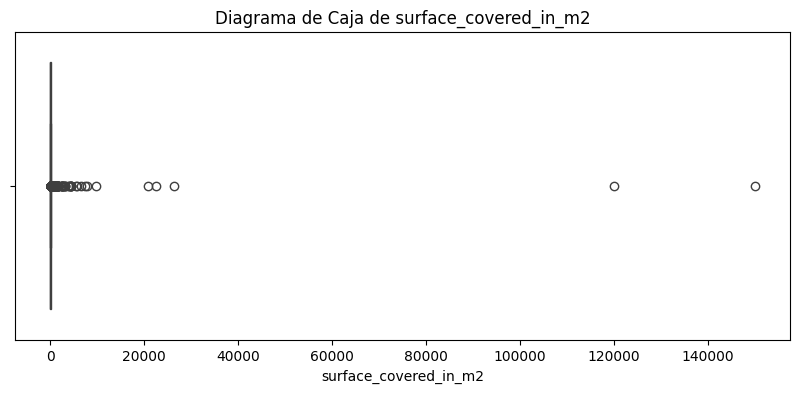

In [8]:
# @title
# Lista de columnas numéricas para visualizar
numerical_cols_outliers = ['surface_covered_in_m2']

# Generar un diagrama de caja para cada columna numérica
for col in numerical_cols_outliers:
    print(f"Estadísticas descriptivas para: {col}")
    display(df[col].describe())
    plt.figure(figsize=(10, 4)) # Hacer la figura más ancha (amplía eje x) y más corta (comprime vertical)
    sns.boxplot(x=df[col]) # Mantener la orientación horizontal
    plt.title(f'Diagrama de Caja de {col}')
    plt.xlabel(col) # Etiquetar eje X
    plt.ylabel('') # Eliminar la etiqueta del eje Y para un gráfico horizontal
    plt.show()

Estadísticas descriptivas para: price_usd_per_m2


count     18979.000000
mean       2760.408525
std        1783.441345
min           0.958333
25%        2090.909091
50%        2742.226415
75%        3026.315789
max      142450.141026
Name: price_usd_per_m2, dtype: float64

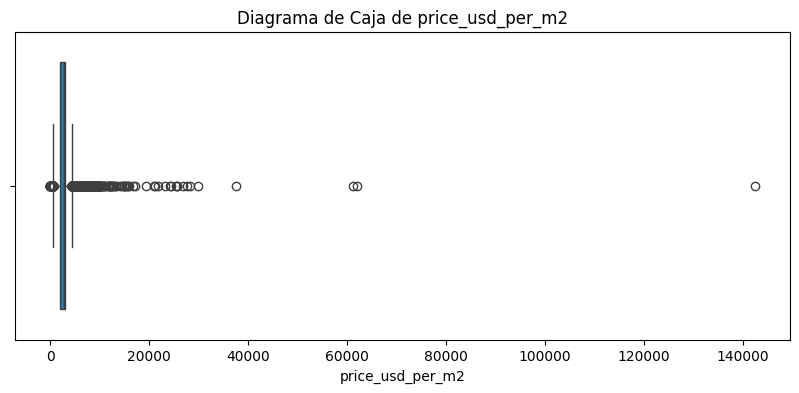

In [9]:
# @title
# Lista de columnas numéricas para visualizar
numerical_cols_outliers = ['price_usd_per_m2']

# Generar un diagrama de caja para cada columna numérica
for col in numerical_cols_outliers:
    print(f"Estadísticas descriptivas para: {col}")
    display(df[col].describe())
    plt.figure(figsize=(10, 4)) # Hacer la figura más ancha (amplía eje x) y más corta (comprime vertical)
    sns.boxplot(x=df[col]) # Mantener la orientación horizontal
    plt.title(f'Diagrama de Caja de {col}')
    plt.xlabel(col) # Etiquetar eje X
    plt.ylabel('') # Eliminar la etiqueta del eje Y para un gráfico horizontal
    plt.show()

Estadísticas descriptivas para: rooms


count    18979.000000
mean         3.023974
std          1.500695
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         38.000000
Name: rooms, dtype: float64

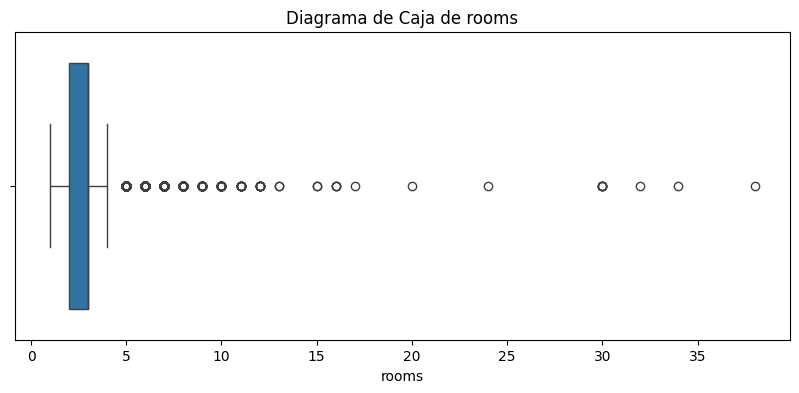

In [10]:
# @title
# Lista de columnas numéricas para visualizar
numerical_cols_outliers = ['rooms']

# Generar un diagrama de caja para cada columna numérica
for col in numerical_cols_outliers:
    print(f"Estadísticas descriptivas para: {col}")
    display(df[col].describe())
    plt.figure(figsize=(10, 4)) # Hacer la figura más ancha (amplía eje x) y más corta (comprime vertical)
    sns.boxplot(x=df[col]) # Mantener la orientación horizontal
    plt.title(f'Diagrama de Caja de {col}')
    plt.xlabel(col) # Etiquetar eje X
    plt.ylabel('') # Eliminar la etiqueta del eje Y para un gráfico horizontal
    plt.show()

### 3.2 Identificación Cuantitativa de Valores Atípicos (Método IQR)

In [11]:
# @title
# List of numerical columns to analyze
numerical_cols_iqr = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'rooms']

print("Análisis de Outliers (Método IQR):")

for col in numerical_cols_iqr:
    print(f"\nColumna: {col}")

    # Calculate Q1, Q3, and IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"  Q1 (25%): {Q1:,.2f}")
    print(f"  Q3 (75%): {Q3:,.2f}")
    print(f"  IQR: {IQR:,.2f}")
    print(f"  Límite Inferior para Outliers: {lower_bound:,.2f}")
    print(f"  Límite Superior para Outliers: {upper_bound:,.2f}")

    # Count outliers
    outliers_lower = df[df[col] < lower_bound].shape[0]
    outliers_upper = df[df[col] > upper_bound].shape[0]
    total_outliers = outliers_lower + outliers_upper

    print(f"  Número de Outliers (debajo del límite inferior): {outliers_lower}")
    print(f"  Número de Outliers (por encima del límite superior): {outliers_upper}")
    print(f"  Total de Outliers: {total_outliers}")
    print(f"  Porcentaje de Outliers: {total_outliers / len(df) * 100:.2f}%")

Análisis de Outliers (Método IQR):

Columna: price_aprox_usd
  Q1 (25%): 125,000.00
  Q3 (75%): 300,000.00
  IQR: 175,000.00
  Límite Inferior para Outliers: -137,500.00
  Límite Superior para Outliers: 562,500.00
  Número de Outliers (debajo del límite inferior): 0
  Número de Outliers (por encima del límite superior): 1805
  Total de Outliers: 1805
  Porcentaje de Outliers: 9.51%

Columna: surface_total_in_m2
  Q1 (25%): 51.00
  Q3 (75%): 142.78
  IQR: 91.78
  Límite Inferior para Outliers: -86.68
  Límite Superior para Outliers: 280.46
  Número de Outliers (debajo del límite inferior): 0
  Número de Outliers (por encima del límite superior): 1231
  Total de Outliers: 1231
  Porcentaje de Outliers: 6.49%

Columna: surface_covered_in_m2
  Q1 (25%): 45.00
  Q3 (75%): 127.49
  IQR: 82.49
  Límite Inferior para Outliers: -78.74
  Límite Superior para Outliers: 251.23
  Número de Outliers (debajo del límite inferior): 0
  Número de Outliers (por encima del límite superior): 1155
  Total d

### 3.3 Examen de las Características de los Valores Atípicos de Precio

Se inspeccionan los registros identificados como atípicos en la columna `price_aprox_usd` para comprender sus características.

In [12]:
# @title
# Calculate Q3 and IQR for price_aprox_usd
Q3_price = df['price_aprox_usd'].quantile(0.75)
IQR_price = Q3_price - df['price_aprox_usd'].quantile(0.25)

# Calculate the upper bound for price_aprox_usd outliers
upper_bound_price = Q3_price + 1.5 * IQR_price

# Filter the original DataFrame to get price outliers
price_outliers_df = df[df['price_aprox_usd'] > upper_bound_price].copy()

print("Primeras filas del DataFrame conteniendo outliers de precio:")
display(price_outliers_df.head())

print("\nDistribución de tipos de propiedad dentro de los outliers de precio:")
display(price_outliers_df['property_type'].value_counts())

print("\nEstadísticas descriptivas para columnas numéricas dentro de los outliers de precio:")
display(price_outliers_df[['surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'rooms']].describe())

Primeras filas del DataFrame conteniendo outliers de precio:


created_on property_type  \
0   2017-09-22         house   
1   2017-08-01         store   
14  2017-08-26         store   
16  2017-08-29         store   
17  2017-08-29         store   

                              place_with_parent_names        lat        lon  \
0   |Argentina|Capital Federal|Palermo|Palermo Viejo| -34.588953 -58.429882   
1                 |Argentina|Capital Federal|Palermo| -34.586069 -58.414431   
14               |Argentina|Capital Federal|Belgrano| -34.569961 -58.432340   
16                |Argentina|Capital Federal|Palermo| -34.582680 -58.428711   
17                |Argentina|Capital Federal|Palermo| -34.591548 -58.425896   

    price_aprox_usd  surface_total_in_m2  surface_covered_in_m2  \
0         2000000.0                312.0             127.491171   
1          790000.0                121.0             121.000000   
14         685000.0                185.0             185.000000   
16         690000.0                 70.0              70.000000   
17        1950000.0                341.0             127.491171   

    price_usd_per_m2  rooms   barrio  comuna  
0        6410.256410      3  PALERMO    14.0  
1        6528.925620      3  PALERMO    14.0  
14       3702.702703      3  PALERMO    14.0  
16       9857.142857      3  PALERMO    14.0  
17       5718.475073      3  PALERMO    14.0


Distribución de tipos de propiedad dentro de los outliers de precio:


property_type
apartment    1252
house         308
store         224
PH             21
Name: count, dtype: int64


Estadísticas descriptivas para columnas numéricas dentro de los outliers de precio:


surface_total_in_m2  surface_covered_in_m2  price_usd_per_m2  \
count          1805.000000            1805.000000       1805.000000   
mean            329.889214             307.976272       4299.494457   
std             681.553785             827.848410       4616.055829   
min               0.000000               1.000000         34.169550   
25%             171.000000             162.000000       2760.408525   
50%             240.000000             220.000000       3559.523810   
75%             350.000000             324.000000       5144.694534   
max           23120.000000           26338.000000     142450.141026   

             rooms  
count  1805.000000  
mean      4.676454  
std       2.427331  
min       1.000000  
25%       3.000000  
50%       4.000000  
75%       6.000000  
max      38.000000

### 3.4 Visualización de Valores Atípicos de Precio en Relación con Otras Variables

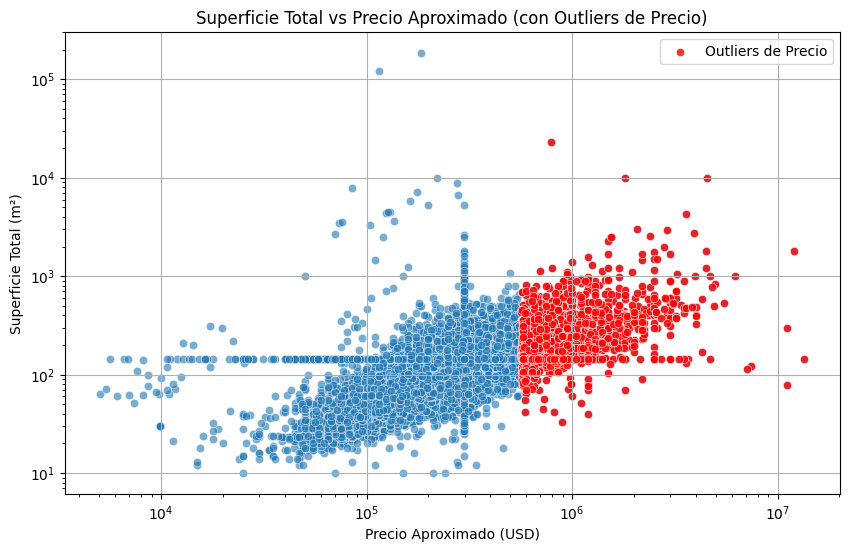

In [13]:
# @title
# Scatter plot for price_aprox_usd vs surface_total_in_m2
plt.figure(figsize=(10, 6))
# Use scatterplot for the main data
sns.scatterplot(data=df, x='price_aprox_usd', y='surface_total_in_m2', alpha=0.6)
# Overlay the outliers as scatter points
sns.scatterplot(data=price_outliers_df, x='price_aprox_usd', y='surface_total_in_m2', color='red', label='Outliers de Precio', alpha=0.8)
plt.title('Superficie Total vs Precio Aproximado (con Outliers de Precio)')
plt.xlabel('Precio Aproximado (USD)')
plt.ylabel('Superficie Total (m²)') # Improved Y-axis label
plt.legend()
plt.grid(True)

# Apply logarithmic scale to both axes
plt.xscale('log')
plt.yscale('log')

plt.show() # Moved plt.show() to this cell

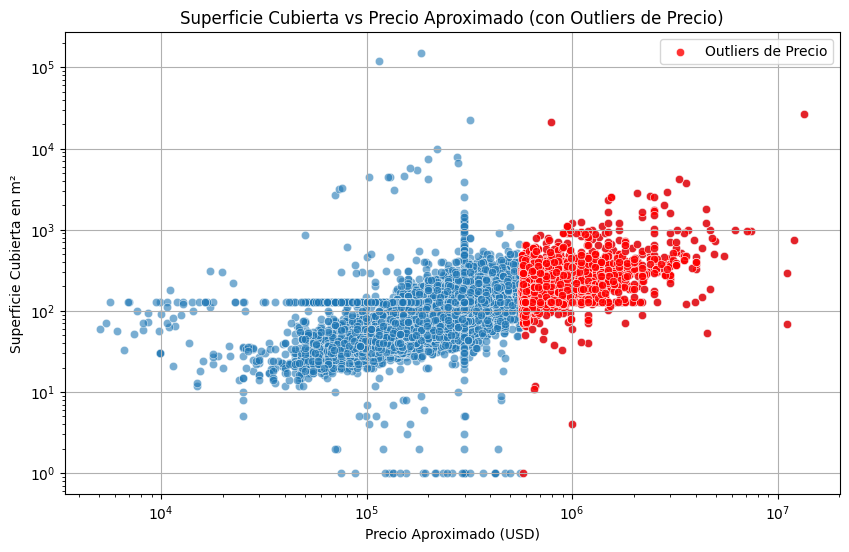

In [14]:
# @title
# Diagrama de dispersión de price_aprox_usd vs surface_covered_in_m2
plt.figure(figsize=(10, 6))
# Usar diagrama de dispersión para los datos principales
sns.scatterplot(data=df, x='price_aprox_usd', y='surface_covered_in_m2', alpha=0.6)
# Superponer los valores atípicos como puntos de dispersión
sns.scatterplot(data=price_outliers_df, x='price_aprox_usd', y='surface_covered_in_m2', color='red', label='Outliers de Precio', alpha=0.8)
plt.title('Superficie Cubierta vs Precio Aproximado (con Outliers de Precio)')
plt.xlabel('Precio Aproximado (USD)')
plt.ylabel('Superficie Cubierta en m²')
plt.legend()
plt.grid(True)

# Aplicar escala logarítmica a ambos ejes
plt.xscale('log')
plt.yscale('log')

# Ajustar el límite del eje y para una mejor distribución, usando el percentil 99 de los datos combinados
# se eliminó esta línea ya que estaba en conflicto con la escala logarítmica

plt.show() # plt.show() ya está en esta celda

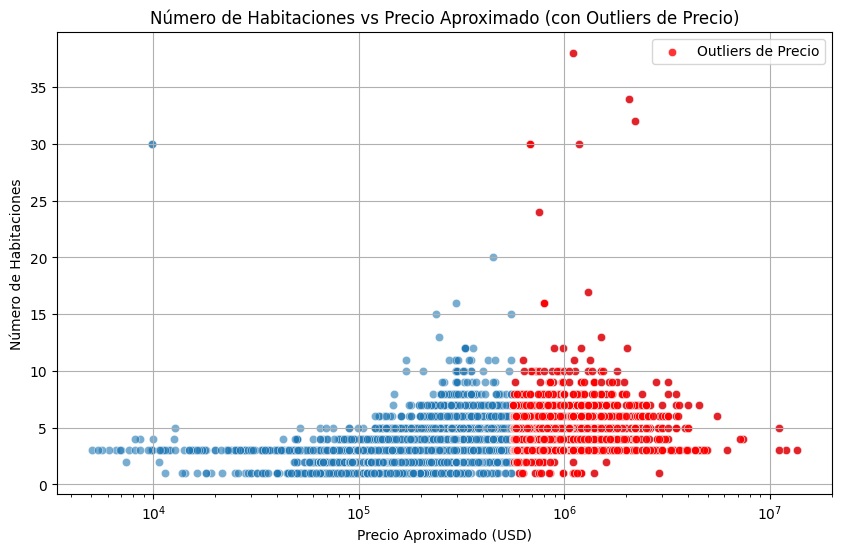

In [15]:
# @title
# Diagrama de dispersión de price_aprox_usd vs habitaciones
plt.figure(figsize=(10, 6))
# Usar diagrama de dispersión para los datos principales
sns.scatterplot(data=df, x='price_aprox_usd', y='rooms', alpha=0.6)
# Superponer los valores atípicos como puntos dispersos
sns.scatterplot(data=price_outliers_df, x='price_aprox_usd', y='rooms', color='red', label='Outliers de Precio', alpha=0.8)
plt.title('Número de Habitaciones vs Precio Aproximado (con Outliers de Precio)')
plt.xlabel('Precio Aproximado (USD)')
plt.ylabel('Número de Habitaciones')
plt.legend()
plt.grid(True)

# Aplicar escala logarítmica al eje de precios (eje X)
plt.xscale('log')

### 3.5 Decisión sobre el Manejo de Valores Atípicos

Basado en el análisis, se determina la estrategia para manejar los valores atípicos de precio. Dado que parecen representar propiedades de alto valor genuino, se decide conservarlos para análisis posteriores, posiblemente tratándolos como un segmento de mercado distinto.

In [16]:
# @title
# El DataFrame 'price_outliers_df' ya contiene los outliers de precio identificados.
# Se conserva este DataFrame para análisis separados o para usar en modelos robustos a outliers.

print(f"Número de propiedades identificadas como outliers de precio: {len(price_outliers_df)}")
print("\nEstadísticas descriptivas para el segmento de outliers de precio:")
display(price_outliers_df.describe())

Número de propiedades identificadas como outliers de precio: 1805

Estadísticas descriptivas para el segmento de outliers de precio:


lat          lon  price_aprox_usd  surface_total_in_m2  \
count  1805.000000  1805.000000     1.805000e+03          1805.000000   
mean    -34.587718   -58.417329     1.124551e+06           329.889214   
std       0.021276     0.037553     8.655586e+05           681.553785   
min     -34.665701   -58.525668     5.650000e+05             0.000000   
25%     -34.599510   -58.445047     6.700000e+05           171.000000   
50%     -34.588025   -58.412688     8.500000e+05           240.000000   
75%     -34.572146   -58.387116     1.250000e+06           350.000000   
max     -34.536471   -58.358672     1.350000e+07         23120.000000   

       surface_covered_in_m2  price_usd_per_m2        rooms       comuna  
count            1805.000000       1805.000000  1805.000000  1805.000000  
mean              307.976272       4299.494457     4.676454     8.233241  
std               827.848410       4616.055829     2.427331     5.836881  
min                 1.000000         34.169550     1.000000     1.000000  
25%               162.000000       2760.408525     3.000000     2.000000  
50%               220.000000       3559.523810     4.000000    12.000000  
75%               324.000000       5144.694534     6.000000    14.000000  
max             26338.000000     142450.141026    38.000000    15.000000

## 4. Análisis Exploratorio Adicional y Feature Engineering

Se generan nuevas columnas a partir de las columnas existentes para enriquecer el dataset. Se extraen AÑO y MES de la fecha de creación, aunque en el presente análisis no se trabaje con agrupaciones por fechas.

In [17]:
# @title
# Convertir 'created_on' a datetime y extraer año y mes
df['created_on'] = pd.to_datetime(df['created_on'])
df['year'] = df['created_on'].dt.year
df['month'] = df['created_on'].dt.month

# Crear la relación superficie cubierta/total
df['covered_to_total_ratio'] = df['surface_covered_in_m2'] / df['surface_total_in_m2']

# Manejar posibles valores infinitos si surface_total_in_m2 era 0
df['covered_to_total_ratio'] = df['covered_to_total_ratio'].replace([np.inf, -np.inf], np.nan)

# Rellenar los NaN resultantes (de la división por cero o NaNs originales)
df['covered_to_total_ratio'] = df['covered_to_total_ratio'].fillna(df['covered_to_total_ratio'].mean())

print("DataFrame con nuevas características temporales y de proporción:")
display(df.head())

DataFrame con nuevas características temporales y de proporción:


created_on property_type                            place_with_parent_names  \
0 2017-09-22         house  |Argentina|Capital Federal|Palermo|Palermo Viejo|   
1 2017-08-01         store                |Argentina|Capital Federal|Palermo|   
2 2017-08-02         store   |Argentina|Capital Federal|Palermo|Palermo Soho|   
3 2017-08-03         store                |Argentina|Capital Federal|Palermo|   
4 2017-08-08         store           |Argentina|Capital Federal|Barrio Norte|   

         lat        lon  price_aprox_usd  surface_total_in_m2  \
0 -34.588953 -58.429882        2000000.0                312.0   
1 -34.586069 -58.414431         790000.0                121.0   
2 -34.589723 -58.432566         343000.0                122.0   
3 -34.592365 -58.414403         145000.0                 24.0   
4 -34.585653 -58.411493         175000.0                 24.0   

   surface_covered_in_m2  price_usd_per_m2  rooms   barrio  comuna  year  \
0             127.491171       6410.256410      3  PALERMO    14.0  2017   
1             121.000000       6528.925620      3  PALERMO    14.0  2017   
2             108.000000       2811.475410      2  PALERMO    14.0  2017   
3              24.000000       6041.666667      3  PALERMO    14.0  2017   
4              24.000000       7291.666667      3  PALERMO    14.0  2017   

   month  covered_to_total_ratio  
0      9                0.408626  
1      8                1.000000  
2      8                0.885246  
3      8                1.000000  
4      8                1.000000

### 4.1 Análisis de Correlación (PEARSON)

Se calcula y visualiza la matriz de correlación para las variables numéricas.

Matriz de Correlación de Variables Numéricas:


lat       lon  price_aprox_usd  \
lat                     1.000000 -0.024358         0.160597   
lon                    -0.024358  1.000000         0.108170   
price_aprox_usd         0.160597  0.108170         1.000000   
surface_total_in_m2    -0.014175 -0.003614         0.044673   
surface_covered_in_m2  -0.017935  0.000511         0.075159   
price_usd_per_m2        0.207856  0.124811         0.480465   
rooms                  -0.006317  0.054345         0.354856   
comuna                  0.464241 -0.646895         0.037490   
year                   -0.014709 -0.072552        -0.052963   
month                   0.016547  0.064070         0.047392   
covered_to_total_ratio -0.020842  0.024202         0.183371   

                        surface_total_in_m2  surface_covered_in_m2  \
lat                               -0.014175              -0.017935   
lon                               -0.003614               0.000511   
price_aprox_usd                    0.044673               0.075159   
surface_total_in_m2                1.000000               0.974746   
surface_covered_in_m2              0.974746               1.000000   
price_usd_per_m2                  -0.026238              -0.020569   
rooms                              0.048431               0.047500   
comuna                             0.000741              -0.002629   
year                               0.004884               0.002870   
month                             -0.003884              -0.001586   
covered_to_total_ratio            -0.003420               0.160289   

                        price_usd_per_m2     rooms    comuna      year  \
lat                             0.207856 -0.006317  0.464241 -0.014709   
lon                             0.124811  0.054345 -0.646895 -0.072552   
price_aprox_usd                 0.480465  0.354856  0.037490 -0.052963   
surface_total_in_m2            -0.026238  0.048431  0.000741  0.004884   
surface_covered_in_m2          -0.020569  0.047500 -0.002629  0.002870   
price_usd_per_m2                1.000000 -0.031694  0.046755 -0.015814   
rooms                          -0.031694  1.000000 -0.047720 -0.042273   
comuna                          0.046755 -0.047720  1.000000  0.035443   
year                           -0.015814 -0.042273  0.035443  1.000000   
month                           0.015268  0.038580 -0.028482 -0.979201   
covered_to_total_ratio          0.031147 -0.002098 -0.013614 -0.000031   

                           month  covered_to_total_ratio  
lat                     0.016547               -0.020842  
lon                     0.064070                0.024202  
price_aprox_usd         0.047392                0.183371  
surface_total_in_m2    -0.003884               -0.003420  
surface_covered_in_m2  -0.001586                0.160289  
price_usd_per_m2        0.015268                0.031147  
rooms                   0.038580               -0.002098  
comuna                 -0.028482               -0.013614  
year                   -0.979201               -0.000031  
month                   1.000000                0.002188  
covered_to_total_ratio  0.002188                1.000000

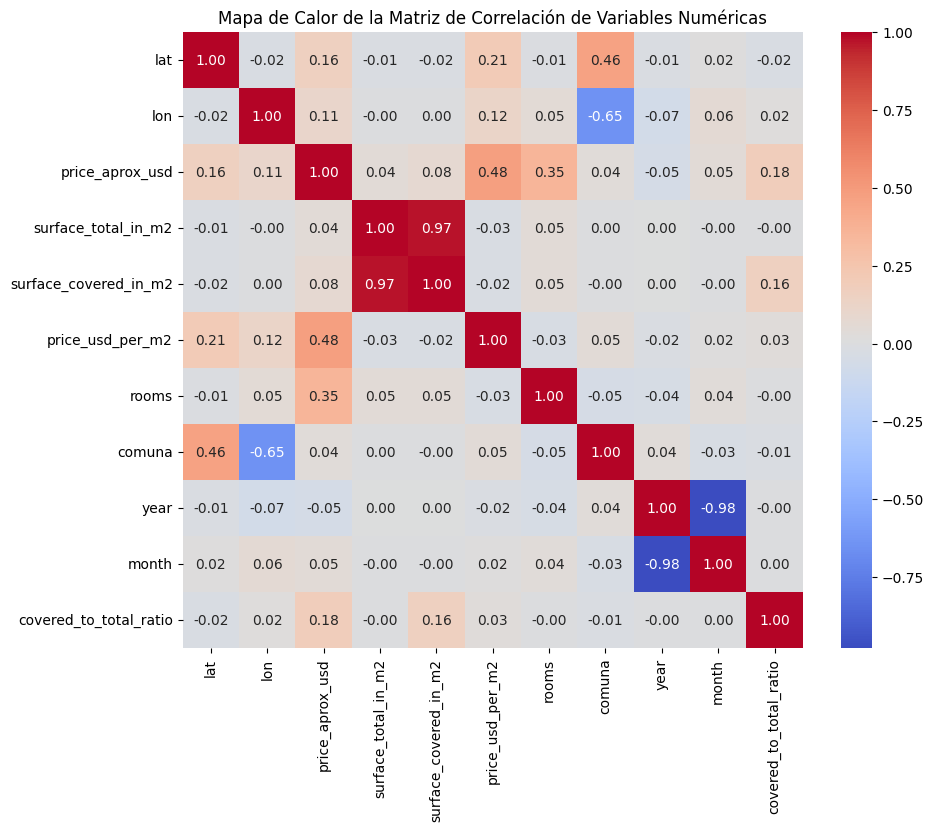

In [18]:
# @title
# Calcular la matriz de correlación solo para columnas numéricas
df_numeric_corr = df.select_dtypes(include=np.number)
correlation_matrix = df_numeric_corr.corr()

print("Matriz de Correlación de Variables Numéricas:")
display(correlation_matrix)

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de la Matriz de Correlación de Variables Numéricas')
plt.show()

### 4.2 Preparación para Análisis de Variables Categóricas (Feature Encoding)

Se prepara la variable categórica `property_type` para análisis o modelado mediante one-hot encoding.

In [19]:
# @title
# Seleccionar las columnas categóricas a transformar (excluyendo las de alta cardinalidad si no se van a procesar)
# En este caso, solo 'property_type'
obj_df = df.select_dtypes(include=['object']).copy()
obj_df_to_encode = obj_df[['property_type']].copy()

# Aplicar one-hot encoding
obj_df_encoded = pd.get_dummies(obj_df_to_encode, columns=['property_type'], drop_first=True)

print("DataFrame con la variable categórica 'property_type' codificada:")
display(obj_df_encoded.head())

DataFrame con la variable categórica 'property_type' codificada:


property_type_apartment  property_type_house  property_type_store
0                    False                 True                False
1                    False                False                 True
2                    False                False                 True
3                    False                False                 True
4                    False                False                 True

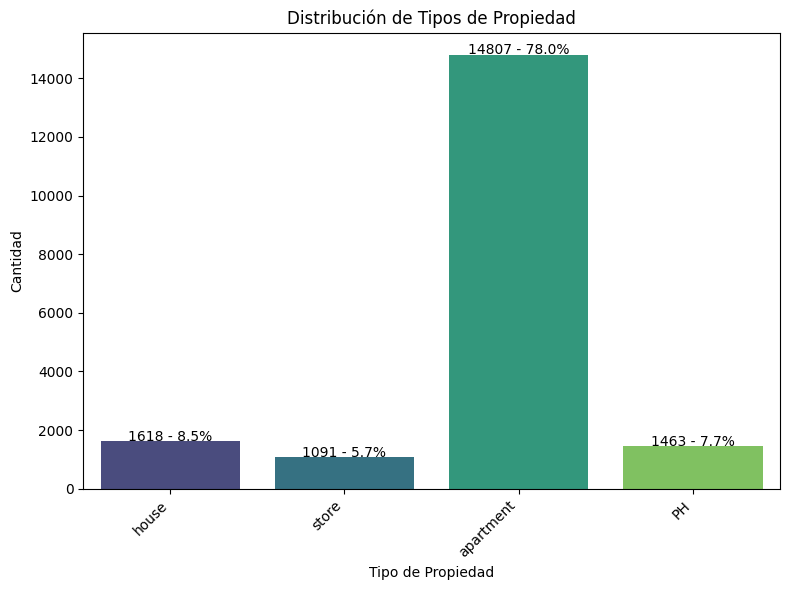

In [20]:
# @title
# Visualizar la distribución de 'property_type' antes de la codificación
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='property_type', hue='property_type', palette='viridis', legend=False)
plt.title('Distribución de Tipos de Propiedad')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# agrega etiquetas a las barras con valor y porcentaje
total_properties = len(df) # Obtener el total de propiedades para calcular porcentajes
ax = plt.gca() # Obtener los ejes actuales
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 3,
            f'{int(height)} - {height/total_properties:.1%}',
            ha="center")

plt.show()

### 4.3 Feature Engineering: Densidad de Habitaciones

Creamos una nueva característica calculando la densidad de habitaciones, definida como el número de habitaciones por metro cuadrado de superficie cubierta. Esto puede ser útil para entender la distribución del espacio interior.

In [21]:
# @title
# Calcular la densidad de habitaciones (habitaciones por m2 cubierto)
# Manejar casos donde surface_covered_in_m2 es cero para evitar división por cero
df['room_density'] = df.apply(
    lambda row: row['rooms'] / row['surface_covered_in_m2'] if row['surface_covered_in_m2'] > 0 else 0, axis=1
)

# Mostrar las primeras filas con la nueva columna
print("DataFrame con la nueva característica 'room_density':")
display(df.head())

# Opcionalmente, ver estadísticas descriptivas de la nueva característica
print("\nEstadísticas descriptivas para 'room_density':")
display(df['room_density'].describe())

DataFrame con la nueva característica 'room_density':


created_on property_type                            place_with_parent_names  \
0 2017-09-22         house  |Argentina|Capital Federal|Palermo|Palermo Viejo|   
1 2017-08-01         store                |Argentina|Capital Federal|Palermo|   
2 2017-08-02         store   |Argentina|Capital Federal|Palermo|Palermo Soho|   
3 2017-08-03         store                |Argentina|Capital Federal|Palermo|   
4 2017-08-08         store           |Argentina|Capital Federal|Barrio Norte|   

         lat        lon  price_aprox_usd  surface_total_in_m2  \
0 -34.588953 -58.429882        2000000.0                312.0   
1 -34.586069 -58.414431         790000.0                121.0   
2 -34.589723 -58.432566         343000.0                122.0   
3 -34.592365 -58.414403         145000.0                 24.0   
4 -34.585653 -58.411493         175000.0                 24.0   

   surface_covered_in_m2  price_usd_per_m2  rooms   barrio  comuna  year  \
0             127.491171       6410.256410      3  PALERMO    14.0  2017   
1             121.000000       6528.925620      3  PALERMO    14.0  2017   
2             108.000000       2811.475410      2  PALERMO    14.0  2017   
3              24.000000       6041.666667      3  PALERMO    14.0  2017   
4              24.000000       7291.666667      3  PALERMO    14.0  2017   

   month  covered_to_total_ratio  room_density  
0      9                0.408626      0.023531  
1      8                1.000000      0.024793  
2      8                0.885246      0.018519  
3      8                1.000000      0.125000  
4      8                1.000000      0.125000


Estadísticas descriptivas para 'room_density':


count    18979.000000
mean         0.044669
std          0.131199
min          0.000033
25%          0.023810
50%          0.035714
75%          0.047619
max          5.000000
Name: room_density, dtype: float64

### 4.4 Estudio Spearman y Kendall

Los coeficientes de correlación de Spearman y Kendall son alternativas al coeficiente de Pearson, y aportan un valor diferente:

Pearson: Mide la fuerza y dirección de una relación lineal entre dos variables. Asume que los datos son paramétricos y siguen una distribución normal (aunque es algo robusto a desviaciones).

Spearman y Kendall: Miden la fuerza y dirección de una relación monotónica entre dos variables. No asumen una relación lineal ni una distribución normal. Se basan en los rangos de los datos, no en los valores brutos. Esto los hace más robustos a valores atípicos y a relaciones no lineales pero consistentes (si una variable aumenta, la otra también tiende a aumentar, aunque no sea en línea recta).

¿Cómo aportan valor aquí?

Dado que identificamos valores atípicos significativos y algunas relaciones (como precio vs. superficie en el nicho principal) no parecían fuertemente lineales, calcular Spearman o Kendall podría revelar relaciones monotónicas que Pearson no capta tan bien, o confirmar la fuerza de las relaciones sin la influencia de los extremos.

Por ejemplo, aunque la correlación de Pearson entre precio y superficie total fue baja en el nicho principal, una correlación de Spearman o Kendall podría ser un poco más alta si existe una tendencia general a que propiedades más grandes tengan precios más altos, incluso si la relación no es perfectamente lineal.

In [22]:
# @title
# Calcular la matriz de correlación de Spearman para columnas numéricas
df_numeric_corr = df.select_dtypes(include=np.number)
correlation_matrix_spearman = df_numeric_corr.corr(method='spearman')

print("Matriz de Correlación de Spearman de Variables Numéricas:")
display(correlation_matrix_spearman)

Matriz de Correlación de Spearman de Variables Numéricas:


lat       lon  price_aprox_usd  \
lat                     1.000000 -0.063378         0.250830   
lon                    -0.063378  1.000000         0.060048   
price_aprox_usd         0.250830  0.060048         1.000000   
surface_total_in_m2    -0.004467 -0.033414         0.751453   
surface_covered_in_m2  -0.011511  0.014952         0.763643   
price_usd_per_m2        0.417078  0.142852         0.319750   
rooms                  -0.006919  0.039524         0.581373   
comuna                  0.468514 -0.632027         0.083283   
year                   -0.016512 -0.067143        -0.007674   
month                   0.020369  0.036436        -0.006126   
covered_to_total_ratio  0.003584  0.198696        -0.068473   
room_density           -0.031222  0.005117        -0.491806   

                        surface_total_in_m2  surface_covered_in_m2  \
lat                               -0.004467              -0.011511   
lon                               -0.033414               0.014952   
price_aprox_usd                    0.751453               0.763643   
surface_total_in_m2                1.000000               0.875303   
surface_covered_in_m2              0.875303               1.000000   
price_usd_per_m2                  -0.107896              -0.065245   
rooms                              0.660410               0.679278   
comuna                             0.004841              -0.023182   
year                               0.001488               0.010928   
month                             -0.022058              -0.025081   
covered_to_total_ratio            -0.265288               0.073964   
room_density                      -0.555078              -0.675898   

                        price_usd_per_m2     rooms    comuna      year  \
lat                             0.417078 -0.006919  0.468514 -0.016512   
lon                             0.142852  0.039524 -0.632027 -0.067143   
price_aprox_usd                 0.319750  0.581373  0.083283 -0.007674   
surface_total_in_m2            -0.107896  0.660410  0.004841  0.001488   
surface_covered_in_m2          -0.065245  0.679278 -0.023182  0.010928   
price_usd_per_m2                1.000000 -0.096569  0.131523  0.002803   
rooms                          -0.096569  1.000000 -0.038908 -0.044908   
comuna                          0.131523 -0.038908  1.000000  0.033090   
year                            0.002803 -0.044908  0.033090  1.000000   
month                           0.001279  0.027376 -0.010093 -0.836551   
covered_to_total_ratio          0.122564 -0.005387 -0.139997 -0.004689   
room_density                   -0.039977 -0.021151 -0.013000 -0.045530   

                           month  covered_to_total_ratio  room_density  
lat                     0.020369                0.003584     -0.031222  
lon                     0.036436                0.198696      0.005117  
price_aprox_usd        -0.006126               -0.068473     -0.491806  
surface_total_in_m2    -0.022058               -0.265288     -0.555078  
surface_covered_in_m2  -0.025081                0.073964     -0.675898  
price_usd_per_m2        0.001279                0.122564     -0.039977  
rooms                   0.027376               -0.005387     -0.021151  
comuna                 -0.010093               -0.139997     -0.013000  
year                   -0.836551               -0.004689     -0.045530  
month                   1.000000                0.015733      0.055432  
covered_to_total_ratio  0.015733                1.000000     -0.087030  
room_density            0.055432               -0.087030      1.000000

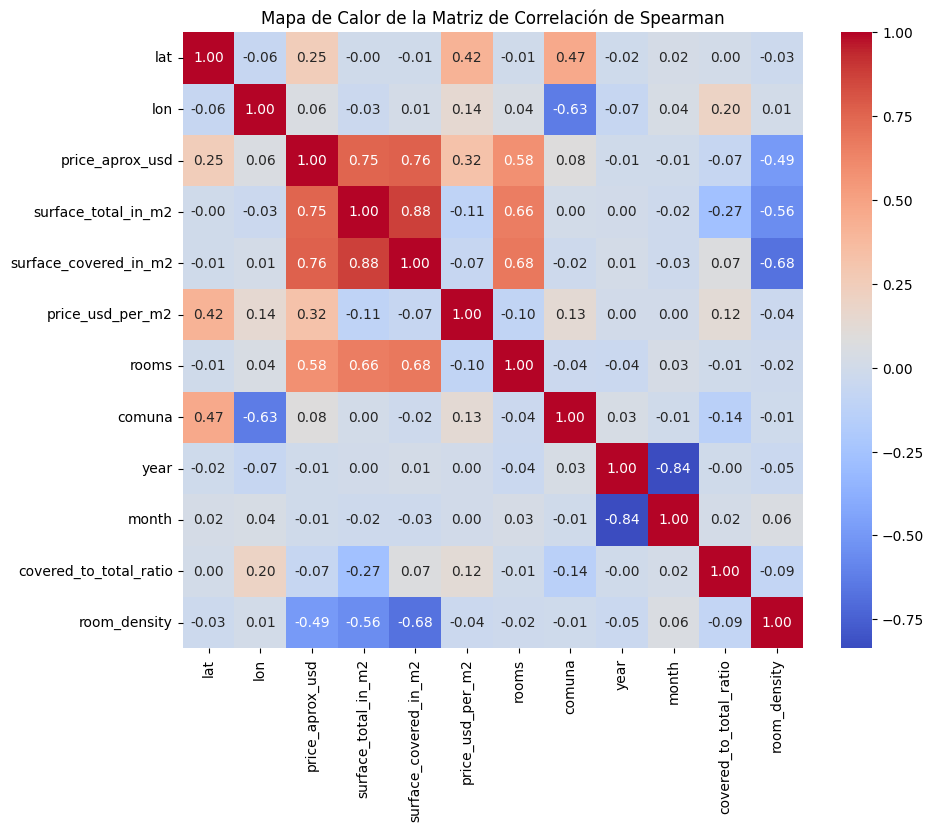

In [23]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que las matrices de correlación de Spearman y Kendall estén definidas
try:
    correlation_matrix_spearman
except NameError:
    print("Error: La matriz de correlación de Spearman no está definida. Por favor, ejecuta la celda 4849f2bb primero.")
    raise # Detener ejecución si las matrices no existen

# Mapa de calor para la matriz de correlación de Spearman
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de la Matriz de Correlación de Spearman')
plt.show()

In [24]:
# @title
# Calcular la matriz de correlación de Kendall para columnas numéricas
correlation_matrix_kendall = df_numeric_corr.corr(method='kendall')

print("\nMatriz de Correlación de Kendall de Variables Numéricas:")
display(correlation_matrix_kendall)


Matriz de Correlación de Kendall de Variables Numéricas:


lat       lon  price_aprox_usd  \
lat                     1.000000 -0.067745         0.167354   
lon                    -0.067745  1.000000         0.041041   
price_aprox_usd         0.167354  0.041041         1.000000   
surface_total_in_m2    -0.003668 -0.023196         0.585226   
surface_covered_in_m2  -0.008290  0.009832         0.594529   
price_usd_per_m2        0.286986  0.099197         0.223113   
rooms                  -0.005773  0.029561         0.456263   
comuna                  0.241275 -0.450818         0.060579   
year                   -0.013484 -0.054832        -0.006296   
month                   0.014884  0.026566        -0.003957   
covered_to_total_ratio  0.001718  0.140233        -0.047627   
room_density           -0.021324  0.003448        -0.354745   

                        surface_total_in_m2  surface_covered_in_m2  \
lat                               -0.003668              -0.008290   
lon                               -0.023196               0.009832   
price_aprox_usd                    0.585226               0.594529   
surface_total_in_m2                1.000000               0.780842   
surface_covered_in_m2              0.780842               1.000000   
price_usd_per_m2                  -0.075045              -0.046225   
rooms                              0.537454               0.556871   
comuna                             0.003556              -0.016505   
year                               0.001227               0.009003   
month                             -0.016029              -0.018202   
covered_to_total_ratio            -0.189474               0.050851   
room_density                      -0.421572              -0.540738   

                        price_usd_per_m2     rooms    comuna      year  \
lat                             0.286986 -0.005773  0.241275 -0.013484   
lon                             0.099197  0.029561 -0.450818 -0.054832   
price_aprox_usd                 0.223113  0.456263  0.060579 -0.006296   
surface_total_in_m2            -0.075045  0.537454  0.003556  0.001227   
surface_covered_in_m2          -0.046225  0.556871 -0.016505  0.009003   
price_usd_per_m2                1.000000 -0.073778  0.095105  0.002313   
rooms                          -0.073778  1.000000 -0.030487 -0.040890   
comuna                          0.095105 -0.030487  1.000000  0.028106   
year                            0.002313 -0.040890  0.028106  1.000000   
month                           0.000837  0.022788 -0.007556 -0.751324   
covered_to_total_ratio          0.087824 -0.003717 -0.100358 -0.003963   
room_density                   -0.027722 -0.009825 -0.009025 -0.037435   

                           month  covered_to_total_ratio  room_density  
lat                     0.014884                0.001718     -0.021324  
lon                     0.026566                0.140233      0.003448  
price_aprox_usd        -0.003957               -0.047627     -0.354745  
surface_total_in_m2    -0.016029               -0.189474     -0.421572  
surface_covered_in_m2  -0.018202                0.050851     -0.540738  
price_usd_per_m2        0.000837                0.087824     -0.027722  
rooms                   0.022788               -0.003717     -0.009825  
comuna                 -0.007556               -0.100358     -0.009025  
year                   -0.751324               -0.003963     -0.037435  
month                   1.000000                0.011854      0.040125  
covered_to_total_ratio  0.011854                1.000000     -0.059854  
room_density            0.040125               -0.059854      1.000000

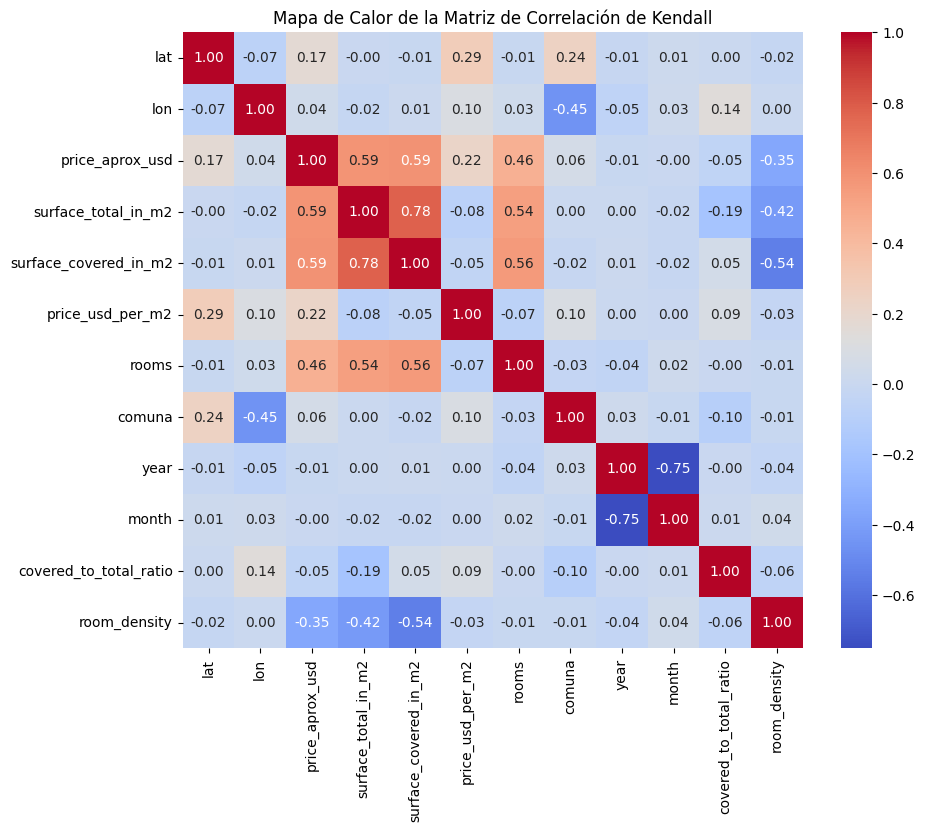

In [25]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que las matrices de correlación de Spearman y Kendall estén definidas
try:
    correlation_matrix_spearman, correlation_matrix_kendall
except NameError:
    print("Error: Las matrices de correlación de Spearman o Kendall no están definidas. Por favor, ejecuta la celda 4849f2bb primero.")
    raise # Detener ejecución si las matrices no existen

# Mapa de calor para la matriz de correlación de Kendall
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_kendall, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de la Matriz de Correlación de Kendall')
plt.show()

Ahora, para interpretar estos gráficos:

**- Comparación con Pearson**: Notarás que los coeficientes de Spearman y Kendall tienden a ser ligeramente diferentes a los de Pearson. Esto es esperable, ya que miden relaciones monotónicas en lugar de estrictamente lineales y son menos sensibles a los valores atípicos extremos.

**- Relaciones Clave**:

  **Precio vs. Superficie (Total y Cubierta)**: Las correlaciones entre price_aprox_usd y las superficies (surface_total_in_m2, surface_covered_in_m2) son notablemente más altas con Spearman (alrededor de 0.75-0.76) y Kendall (alrededor de 0.58-0.59) en comparación con Pearson (alrededor de 0.04-0.07). Esto sugiere que, aunque la relación no sea perfectamente lineal en todo el rango de datos (especialmente con los outliers), sí existe una fuerte tendencia monotónica: a mayor superficie, generalmente mayor precio.

  **Precio vs. Habitaciones**: La correlación entre price_aprox_usd y rooms también es mayor con Spearman (alrededor de 0.58) y Kendall (alrededor de 0.46) que con Pearson (alrededor de 0.35). Esto refuerza la idea de que más habitaciones tienden a asociarse con precios más altos, incluso si no es una relación estrictamente lineal.

  **Superficie Total vs. Superficie Cubierta**: La correlación entre surface_total_in_m2 y surface_covered_in_m2 sigue siendo muy alta con Spearman (alrededor de 0.88) y Kendall (alrededor de 0.78), lo que indica que estas dos métricas de superficie están fuertemente relacionadas.

  **Densidad de Habitaciones (room_density)**: Esta nueva característica muestra una correlación negativa moderada con price_aprox_usd en Spearman (-0.49) y Kendall (-0.35). Esto es interesante: propiedades con mayor densidad de habitaciones (más habitaciones por m² cubierto) tienden a tener precios totales menores. Esto podría reflejar que las propiedades más pequeñas o en segmentos de menor precio tienen distribuciones de espacio interior diferentes.

  **Cluster Label**: La etiqueta del clúster (cluster_label) muestra una correlación positiva moderada con price_aprox_usd, superficies y habitaciones, lo cual valida que los clústeres identificados por K-Means sí agrupan propiedades con características de valor similares, aunque la correlación no sea perfecta.

***En resumen, Spearman y Kendall confirman la existencia de relaciones monotónicas más fuertes entre precio, superficies y habitaciones de lo que sugería Pearson para el dataset completo, probablemente debido a la influencia de los outliers y la naturaleza no estrictamente lineal de las relaciones en todo el rango de datos. La densidad de habitaciones emerge como una característica con una relación negativa interesante con el precio.***

Recordando el grafico de Pearson (4.1)

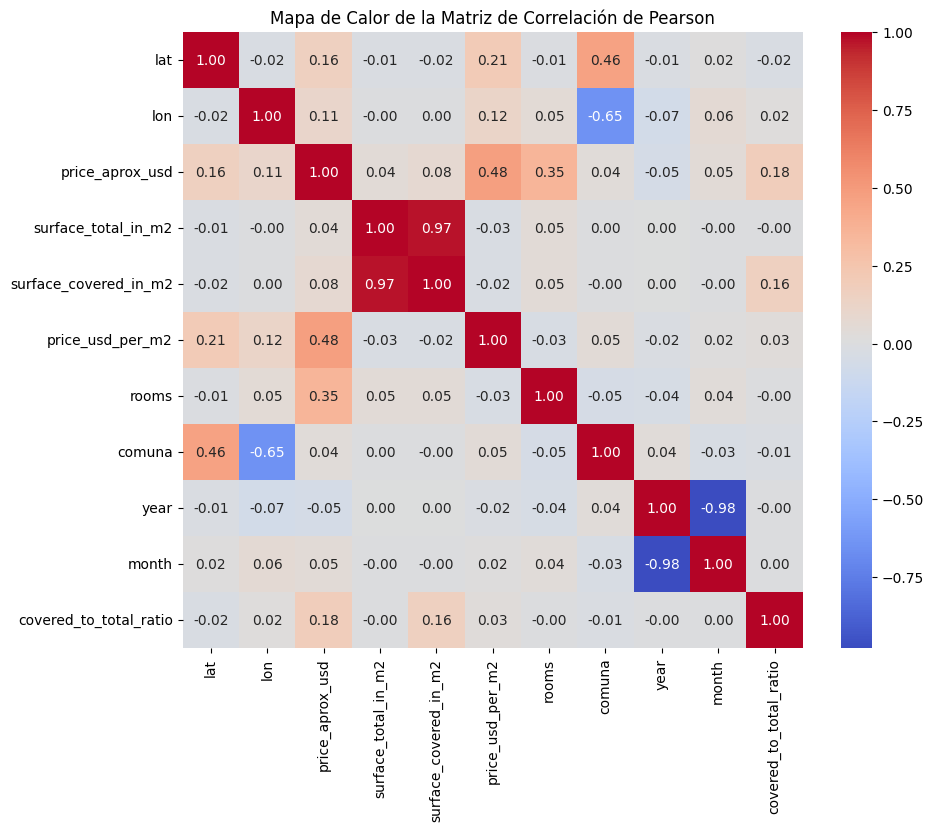

In [26]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que la matriz de correlación de Pearson esté definida
try:
    correlation_matrix
except NameError:
    print("Error: La matriz de correlación de Pearson no está definida. Por favor, ejecuta la celda c51b559c primero.")
    raise # Detener ejecución si la matriz no existe

# Crear el mapa de calor para la matriz de correlación de Pearson
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de la Matriz de Correlación de Pearson')
plt.show()

Teniendo los tres mapas de calor a la vista (Pearson, Spearman y Kendall), podemos compararlos:

**- Relaciones Lineales vs. Monotónicas**: Observa las diferencias en los valores de correlación entre price_aprox_usd y las superficies (surface_total_in_m2, surface_covered_in_m2). En el mapa de Pearson, estas correlaciones son bastante bajas (alrededor de 0.04-0.07), lo que sugiere una relación lineal débil. Sin embargo, en los mapas de **Spearman y Kendall**, estas correlaciones son significativamente más altas (0.75-0.76 para Spearman, 0.58-0.59 para Kendall). Esto indica que, aunque no haya una línea recta clara que describa la relación precio-superficie en todo el dataset (posiblemente influenciado por los outliers), sí existe una fuerte tendencia: a medida que la superficie aumenta, el precio también tiende a aumentar de manera consistente (relación monotónica). Spearman y Kendall son mejores para capturar este tipo de relaciones.

**- Influencia de Outliers**: La diferencia entre Pearson y Spearman/Kendall es más pronunciada en variables que tienen valores atípicos extremos, como las superficies y el precio. Pearson es muy sensible a estos valores extremos, que pueden distorsionar la medida de la relación lineal. Spearman y Kendall, al basarse en rangos, son menos afectados por los valores absolutos de los outliers.

**- Relación Precio-Habitaciones**: La correlación entre price_aprox_usd y rooms también es más alta con Spearman (0.58) y Kendall (0.46) que con Pearson (0.35). Esto confirma que, aunque no sea perfectamente lineal, hay una tendencia clara a que las propiedades con más habitaciones tengan precios más altos.

**- Relaciones Consistentes**: Para variables sin outliers extremos o con relaciones más cercanas a la linealidad (como surface_total_in_m2 vs surface_covered_in_m2), los valores de correlación de los tres métodos tienden a ser más similares.

***En resumen, la comparación de los tres mapas de calor nos muestra que, si bien la relación lineal entre precio y características como superficie y habitaciones puede ser débil en el dataset completo (según Pearson, posiblemente debido a outliers), existe una fuerte tendencia general a que a mayor superficie y más habitaciones, mayor sea el precio (según Spearman y Kendall). Esto valida la importancia de estas características, incluso si la relación no es una línea recta perfecta.***

## 5. Aplicación de Aprendizaje No Supervisado (Clustering)

Se aplica el clustering K-Means para identificar agrupaciones naturales de propiedades basadas en sus características numéricas.

In [27]:
# @title
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# 1. Seleccionar las columnas numéricas relevantes para el clustering
numeric_features_clustering = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'rooms']
df_numeric_clustering = df[numeric_features_clustering]

# 2. Escalar las columnas numéricas seleccionadas
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_numeric_clustering)

# 3. Decidir un número de clústeres 'K' (ej. K=4, aunque se recomienda validar con métodos como el codo)
k = 4 # Número de clústeres elegido para este ejemplo

# 4. Instanciar KMeans
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # explicitly set n_init

# 5. Entrenar el modelo K-Means
kmeans.fit(scaled_features)
print(f"Modelo K-Means entrenado con K={k} clústeres.")

# 6. Obtener las etiquetas de clúster
cluster_labels = kmeans.labels_

# 7. Agregar una nueva columna al DataFrame df con las etiquetas de clúster
df['cluster_label'] = cluster_labels

# 8. Mostrar el recuento de propiedades en cada clúster
print("\nRecuento de propiedades por clúster:")
display(df['cluster_label'].value_counts())

# 9. Opcionalmente, mostrar las características promedio de cada clúster
print("\nCaracterísticas promedio de cada clúster:")
display(df.groupby('cluster_label')[numeric_features_clustering].mean())

Modelo K-Means entrenado con K=4 clústeres.

Recuento de propiedades por clúster:


cluster_label
0    16947
1     2026
2        4
3        2
Name: count, dtype: int64


Características promedio de cada clúster:


price_aprox_usd  surface_total_in_m2  surface_covered_in_m2  \
cluster_label                                                                
0                 2.122417e+05           104.863395              92.565156   
1                 9.825401e+05           310.060696             285.622034   
2                 9.187788e+06           152.250000             570.750000   
3                 1.500000e+05        152000.000000          135000.000000   

               price_usd_per_m2     rooms  
cluster_label                              
0                   2602.577768  2.736591  
1                   3939.114035  5.424482  
2                  75815.241996  4.000000  
3                      0.981884  4.500000

Se utiliza el algoritmo de clustering K-Means para aplicar el método "fitting":
* Instanciar KMeans
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # explicitly set n_init
* Entrenar el modelo K-Means
kmeans.fit(scaled_features)

Aquí, kmeans.fit(scaled_features) entrena el modelo K-Means utilizando los datos de características escaladas (scaled_features). El algoritmo K-Means "ajusta" sus centroides (los puntos centrales de los clústeres) a los datos.

Aprende la ubicación óptima de estos centroides y asigna cada punto de datos al clúster cuyo centroide está más cerca. Este proceso iterativo de ajustar los centroides y reasignar puntos es lo que se conoce como "fitting" en este caso. Después de este paso, el modelo kmeans está "entrenado" y puede usarse para predecir a qué clúster pertenece un nuevo punto de datos.

### 5.1 Análisis de la Distribución de Tipos de Propiedad por Clúster

In [28]:
# @title
# Analizar la distribución de propiedades por tipo y clúster
cluster_property_distribution = pd.crosstab(df['cluster_label'], df['property_type'])

print("Distribución de Propiedades por Clúster y Tipo:")
display(cluster_property_distribution)

Distribución de Propiedades por Clúster y Tipo:


property_type    PH  apartment  house  store
cluster_label                               
0              1357      13389   1249    952
1               105       1414    368    139
2                 0          4      0      0
3                 1          0      1      0

### 5.2 Visualización de la Distribución de Clústeres

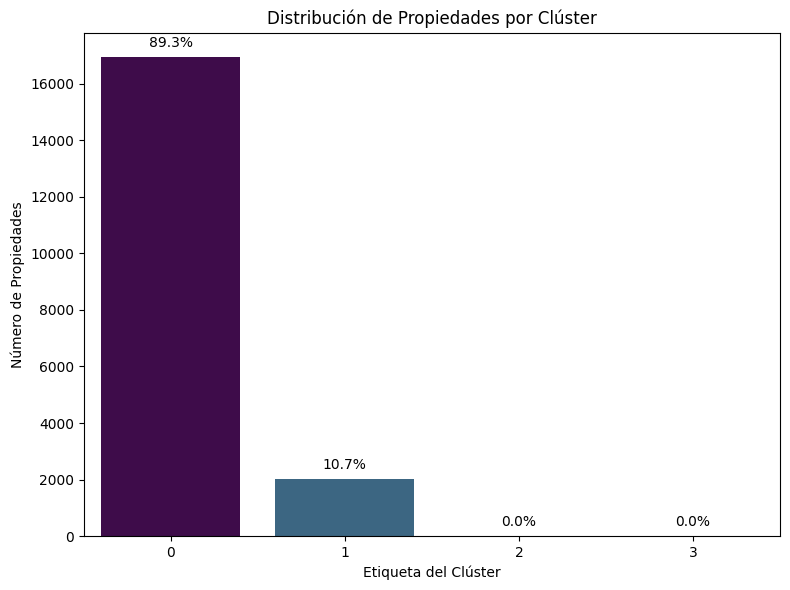

In [29]:
# @title
# Obtener el recuento de propiedades por clúster
cluster_counts = df['cluster_label'].value_counts()

# Calcular el total de propiedades para calcular porcentajes
total_properties = cluster_counts.sum()

# Crear un gráfico de barras con porcentajes
plt.figure(figsize=(8, 6))
# Modificación: Usar 'hue' en lugar de solo 'palette' para evitar FutureWarning
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='viridis', legend=False)

# Agregar título y etiquetas a los ejes
plt.title('Distribución de Propiedades por Clúster')
plt.xlabel('Etiqueta del Clúster')
plt.ylabel('Número de Propiedades')
plt.xticks(rotation=0)

# Agregar el porcentaje encima de cada barra
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total_properties)
    x = p.get_x() + p.get_width() / 2.
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

### 5.3 Validación del Número de Clústeres: Método del Codo

Para validar el número de clústeres (`k`) en el análisis de K-Means, utilizaremos el método del codo. Este método consiste en calcular la inercia (suma de cuadrados dentro de los clústeres) para diferentes valores de `k` y luego graficar los resultados. El punto donde la disminución de la inercia se ralentiza significativamente (formando un "codo") sugiere un número de clústeres apropiado.

Usando el escalador existente.


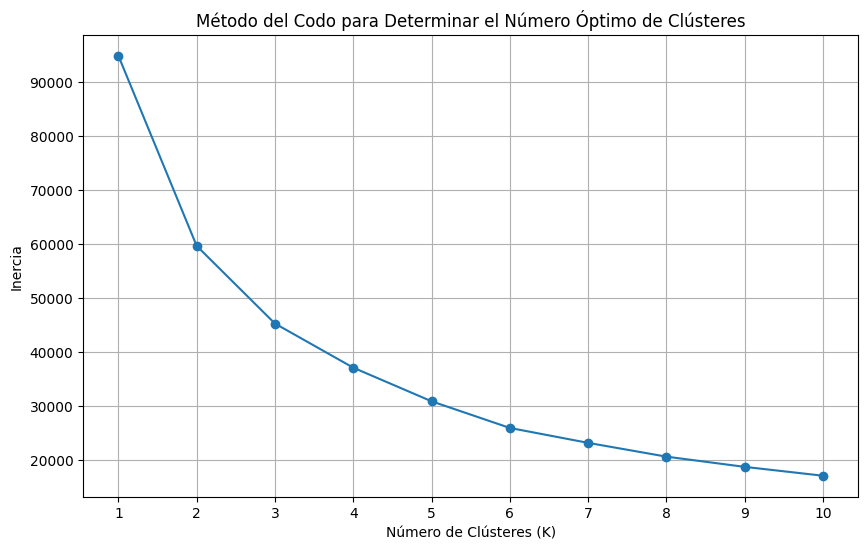


Valores de Inercia para cada K:
K=1: 94895.00
K=2: 59675.76
K=3: 45287.08
K=4: 37115.85
K=5: 30890.61
K=6: 25952.96
K=7: 23189.41
K=8: 20635.89
K=9: 18741.92
K=10: 17101.10


In [30]:
# @title
from sklearn.cluster import KMeans

# Seleccionar las mismas columnas numéricas usadas para el clustering
numeric_features_clustering = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2', 'rooms']
df_numeric_clustering = df[numeric_features_clustering]

# Asegurarse de que los datos estén escalados, usando el mismo escalador si es posible
# Si no se ha guardado el escalador, escalamos de nuevo para consistencia
try:
    scaled_features = scaler.transform(df_numeric_clustering)
    print("Usando el escalador existente.")
except NameError:
    print("Escalador no encontrado. Escalando datos nuevamente.")
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df_numeric_clustering)


# Calcular la inercia para un rango de valores de K
inertia = []
k_range = range(1, 11) # Probar con K de 1 a 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # explicitly set n_init
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Método del Codo para Determinar el Número Óptimo de Clústeres')
plt.xlabel('Número de Clústeres (K)')
plt.ylabel('Inercia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

print("\nValores de Inercia para cada K:")
for k, value in zip(k_range, inertia):
    print(f"K={k}: {value:.2f}")

En el gráfico del método del codo se busca un punto donde la curva se doble de manera significativa. Este punto "de codo" sugiere un número de clústeres que proporciona un buen equilibrio entre la reducción de la inercia y la complejidad del modelo.

### Conclusión del Clustering:

**El análisis de clustering K-Means ha permitido identificar agrupaciones de propiedades con características similares. El Clúster 0 es el más grande y representa el segmento más común, dominado por apartamentos. Los clústeres más pequeños (1 y 3) parecen contener propiedades atípicas o de muy alto valor, mientras que el Clúster 2 agrupa propiedades de gama media-alta. Esto proporciona una base para entender la estructura del mercado sin etiquetas predefinidas.**

## 6. Identificación del Nicho Principal de Mercado (Análisis Descriptivo)

Basado en el análisis de la distribución de precios y la identificación de la mayoría de las propiedades, se busca definir el segmento de mercado más significativo.

In [31]:
# @title
# Filtrar los registros con precio menor a 1.000.000 USD
filtered_df_less_1M = df[df['price_aprox_usd'] < 1000000].copy()

num_properties_less_than_1M = len(filtered_df_less_1M)
print(f"El número de propiedades con price_aprox_usd menor a 1.000.000 es: {num_properties_less_than_1M}")
print(f"Porcentaje del total: {num_properties_less_than_1M / len(df) * 100:.2f}%")

# Calcular estadísticas clave para este subconjunto
mean_price_1M = filtered_df_less_1M['price_aprox_usd'].mean()
median_price_1M = filtered_df_less_1M['price_aprox_usd'].median()
q1_1M = filtered_df_less_1M['price_aprox_usd'].quantile(0.25)
q3_1M = filtered_df_less_1M['price_aprox_usd'].quantile(0.75)
iqr_1M = q3_1M - q1_1M

print("\nEstadísticas descriptivas para propiedades con precio menor a 1.000.000 USD:")
print(f"  Media: {mean_price_1M:,.2f} USD")
print(f"  Mediana: {median_price_1M:,.2f} USD")
print(f"  Q1 (25%): {q1_1M:,.2f} USD")
print(f"  Q3 (75%): {q3_1M:,.2f} USD")
print(f"  IQR: {iqr_1M:,.2f} USD")

El número de propiedades con price_aprox_usd menor a 1.000.000 es: 18314
Porcentaje del total: 96.50%

Estadísticas descriptivas para propiedades con precio menor a 1.000.000 USD:
  Media: 241,913.91 USD
  Mediana: 190,000.00 USD
  Q1 (25%): 120,000.00 USD
  Q3 (75%): 296,355.85 USD
  IQR: 176,355.85 USD


### 6.1 Análisis Consolidado del Nicho Principal y Micro-ubicación

### Análisis Consolidado del Nicho Principal y Micro-ubicación - Fraccionado

In [32]:
# @title
# Filtrar para el nicho principal (propiedades entre Q1 y Q3 de < 1M USD) ---
# Asegurarse de que 'filtered_df_less_1M', 'q1_1M', y 'q3_1M' estén definidos.

properties_between_q1_q3_1M = filtered_df_less_1M[(filtered_df_less_1M['price_aprox_usd'] >= q1_1M) & (filtered_df_less_1M['price_aprox_usd'] <= q3_1M)].copy()

# Definir el DataFrame para el nicho principal (apartamentos entre Q1 y Q3 de < 1M USD)
apartments_in_principal_niche = properties_between_q1_q3_1M[properties_between_q1_q3_1M['property_type'] == 'apartment'].copy()

print("DataFrames filtrados para el Nicho Principal creados.")

DataFrames filtrados para el Nicho Principal creados.


### Extraer y Mostrar Distribución de Ubicaciones Granulares

In [33]:
# @title
# Extraer el nivel más granular de la ubicación para el nicho principal de apartamentos
# Asumiendo que el último elemento después del último '|' es el nivel más granular
# Manejar casos donde la cadena puede terminar con '|' o tener otros formatos
apartments_in_principal_niche['granular_location'] = apartments_in_principal_niche['place_with_parent_names'].apply(
    lambda x: [part for part in x.split('|') if part][-1] if isinstance(x, str) and '|' in x and [part for part in x.split('|') if part] else 'Desconocido'
)

# Mostrar la distribución de las ubicaciones granulares
print("Distribución de Ubicaciones Granulares dentro del Nicho Principal (Apartamentos):")
granular_location_counts = apartments_in_principal_niche['granular_location'].value_counts()
display(granular_location_counts.head(20)) # Mostrar las 20 ubicaciones más comunes

Distribución de Ubicaciones Granulares dentro del Nicho Principal (Apartamentos):


granular_location
Palermo              753
Belgrano             739
Caballito            724
Recoleta             437
Barrio Norte         325
Villa Urquiza        323
Almagro              319
Boedo                317
Villa Crespo         316
Flores               277
Nuñez                245
Balvanera            226
San Telmo            170
Villa Santa Rita     155
Palermo Hollywood    143
Colegiales           126
Retiro               121
Villa del Parque     112
Villa Devoto         108
Floresta             104
Name: count, dtype: int64

### Calcular Precio Promedio por Ubicación Granular en el Nicho Principal

In [34]:
# @title
# Calcular el precio promedio por cada ubicación granular (para ubicaciones con suficientes datos)
# Considerar solo ubicaciones con un número mínimo de propiedades (ej. > 10) para que la media sea más representativa
min_properties_for_mean = 10
locations_to_analyze = granular_location_counts[granular_location_counts >= min_properties_for_mean].index

if not locations_to_analyze.empty:
    price_by_granular_location = apartments_in_principal_niche[
        apartments_in_principal_niche['granular_location'].isin(locations_to_analyze)
    ].groupby('granular_location')['price_aprox_usd'].mean().sort_values(ascending=False)

    print(f"\nPrecio Promedio por Ubicación Granular (más de {min_properties_for_mean} propiedades) en el Nicho Principal:")
# Mostrar como un DataFrame para que sea más compacto con múltiples columnas
    display(price_by_granular_location.to_frame().T)
else:
    print(f"\nNo hay ubicaciones granulares con más de {min_properties_for_mean} propiedades en el Nicho Principal para calcular el precio promedio.")


Precio Promedio por Ubicación Granular (más de 10 propiedades) en el Nicho Principal:


granular_location  Capital Federal  Villa Santa Rita          Boedo  \
price_aprox_usd      293249.177403     285987.299076  277533.377756   

granular_location  Puerto Madero  Parque Avellaneda  Palermo Chico  \
price_aprox_usd    262744.008965      255704.390969   247112.57022   

granular_location   Barrio Norte      Recoleta        Liniers   Villa Lugano  \
price_aprox_usd    215378.466242  213305.71296  210831.748164  208269.268722   

granular_location  ...  San Cristobal   Constitución      Versalles  \
price_aprox_usd    ...  169108.246452  168461.378663  166831.818182   

granular_location  Villa Ortuzar     Tribunales       Paternal  \
price_aprox_usd    163328.548806  156626.315789  154067.915318   

granular_location  Villa Pueyrredón    Parque Chas  Agronomía           Boca  
price_aprox_usd       153165.362589  150345.666667   147898.0  144278.842105  

[1 rows x 55 columns]

### Visualizar Precio Promedio por Ubicación Granular (Top N)

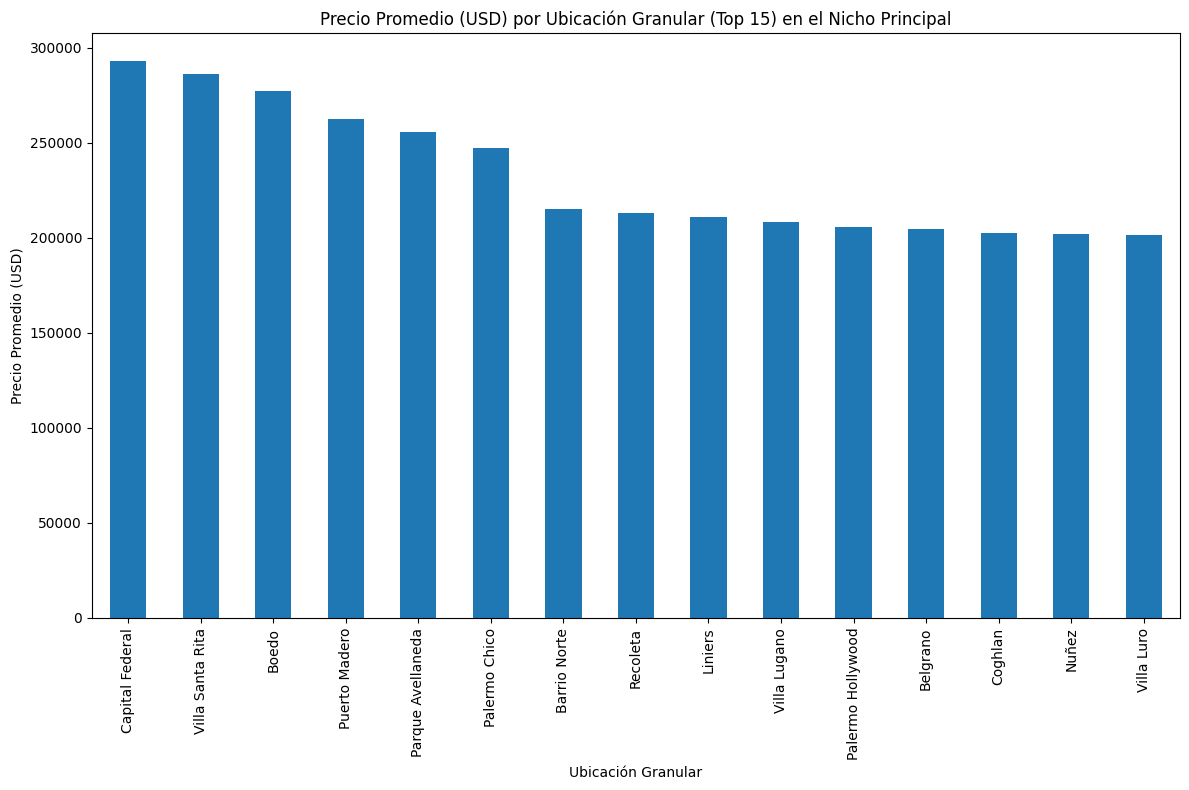

In [35]:
# Opcionalmente, visualizar el precio promedio por ubicación granular (Top N)
if not locations_to_analyze.empty and len(locations_to_analyze) > 0: # Ensure there are locations to plot
    top_n_locations = 15 # Mostrar las Top 15 ubicaciones por precio promedio
    plt.figure(figsize=(12, 8))
    price_by_granular_location.head(top_n_locations).plot(kind='bar')
    plt.title(f'Precio Promedio (USD) por Ubicación Granular (Top {top_n_locations}) en el Nicho Principal')
    plt.xlabel('Ubicación Granular')
    plt.ylabel('Precio Promedio (USD)')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
elif locations_to_analyze.empty:
    print("No hay ubicaciones con suficientes propiedades para visualizar el precio promedio.")
else:
     print("No hay suficientes ubicaciones para visualizar en el Top N.")

Se enfoca el análisis en el rango de precios entre el primer y tercer cuartil de las propiedades con precio menor a 1.000.000 USD para identificar el segmento más representativo.

### 6.2 Visualización del Rango de Precios Principal

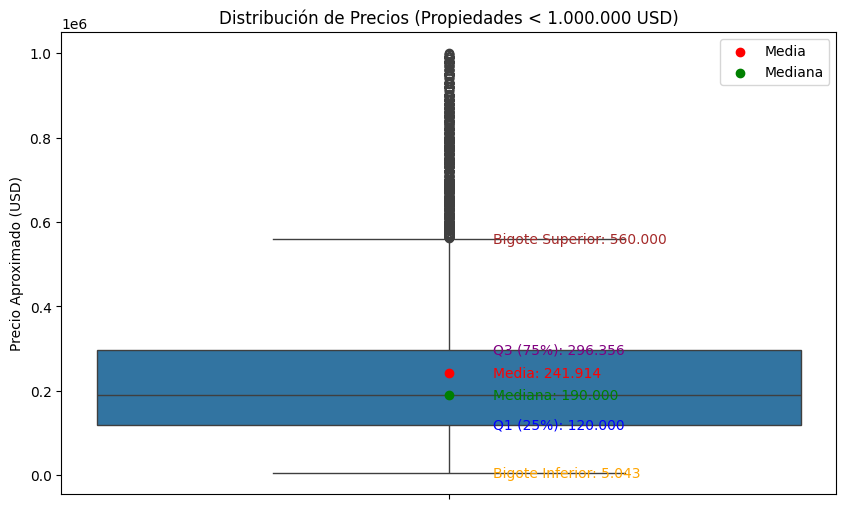

In [36]:
# @title
# crear gráfico de caja para propiedades < 1M USD
plt.figure(figsize=(10, 6)) # Keep original figure size or adjust for vertical plot
sns.boxplot(y=filtered_df_less_1M['price_aprox_usd']) # Change 'x' back to 'y' for vertical orientation

# colocar media y mediana en el gráfico
plt.scatter(0, mean_price_1M, color='red', zorder=5, label='Media') # Swap x and y coordinates back for vertical plot
plt.scatter(0, median_price_1M, color='green', zorder=5, label='Mediana') # Swap x and y coordinates back for vertical plot

# agregar anotaciones de texto para la clave estadística (usando los valores calculados para <1M)
# Adjust text placement for vertical plot (swap x and y, adjust va/ha)
plt.text(0.05, mean_price_1M, f'Media: {mean_price_1M:,.0f}'.replace(',', '.'), color='red', ha='left', va='center') # Restored text annotation
plt.text(0.05, median_price_1M, f'Mediana: {median_price_1M:,.0f}'.replace(',', '.'), color='green', ha='left', va='center') # Restored text annotation
plt.text(0.05, q1_1M, f'Q1 (25%): {q1_1M:,.0f}'.replace(',', '.'), color='blue', ha='left', va='center') # Restored text annotation
plt.text(0.05, q3_1M, f'Q3 (75%): {q3_1M:,.0f}'.replace(',', '.'), color='purple', ha='left', va='center') # Restored text annotation

# Calcular y anotar los bigotes (usando los límites del IQR para <1M)
lower_whisker_1M = filtered_df_less_1M['price_aprox_usd'][filtered_df_less_1M['price_aprox_usd'] >= q1_1M - 1.5 * iqr_1M].min()
upper_whisker_1M = filtered_df_less_1M['price_aprox_usd'][filtered_df_less_1M['price_aprox_usd'] <= q3_1M + 1.5 * iqr_1M].max()

# Adjust text placement for vertical plot
plt.text(0.05, lower_whisker_1M, f'Bigote Inferior: {lower_whisker_1M:,.0f}'.replace(',', '.'), color='orange', ha='left', va='center') # Restored text annotation
plt.text(0.05, upper_whisker_1M, f'Bigote Superior: {upper_whisker_1M:,.0f}'.replace(',', '.'), color='brown', ha='left', va='center')


plt.title('Distribución de Precios (Propiedades < 1.000.000 USD)')
plt.xlabel('') # Remove xlabel for vertical plot
plt.ylabel('Precio Aproximado (USD)') # Change xlabel to ylabel for vertical plot
plt.legend()
plt.show()

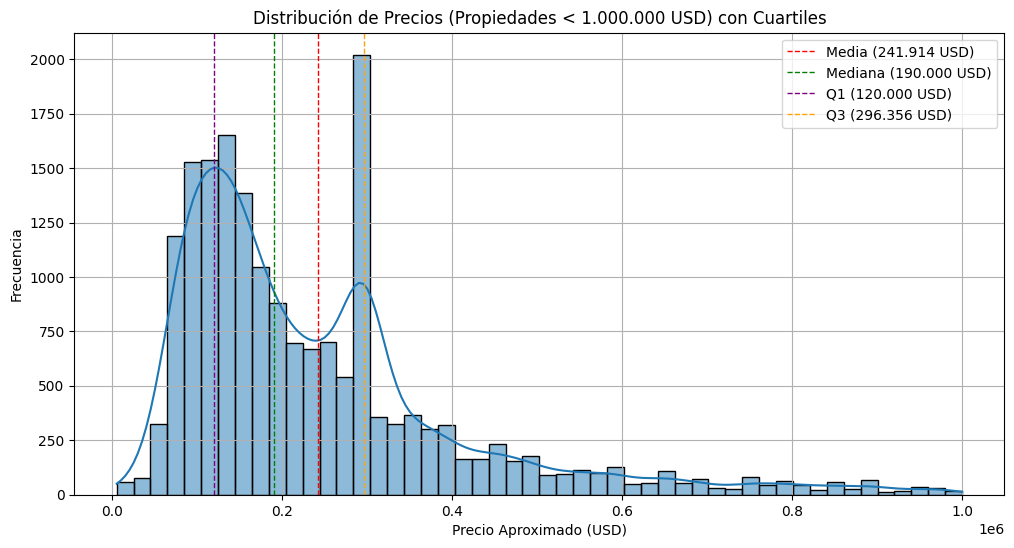

In [37]:
# @title
# Crear gráfico histograma para propiedades < 1M USD
plt.figure(figsize=(12, 6)) # Ajustar el tamaño de la figura para un histograma
sns.histplot(data=filtered_df_less_1M, x='price_aprox_usd', bins=50, kde=True) # Usar histplot para histograma

# colocar media y mediana en el gráfico (usando los valores calculados para <1M)
# Asegurarse de que q1_1M, q3_1M, mean_price_1M, y median_price_1M estén definidos
try:
    q1_1M, q3_1M, mean_price_1M, median_price_1M, filtered_df_less_1M
except NameError:
    print("Error: Algunas variables necesarias (q1_1M, q3_1M, mean_price_1M, median_price_1M, filtered_df_less_1M) no están definidas. Por favor, ejecuta las celdas de análisis del nicho principal (sección 6) primero.")
    raise # Detener ejecución si las variables no existen


plt.axvline(mean_price_1M, color='red', linestyle='dashed', linewidth=1, label=f'Media ({mean_price_1M:,.0f} USD)'.replace(',', '.')) # Usar axvline para líneas verticales
plt.axvline(median_price_1M, color='green', linestyle='dashed', linewidth=1, label=f'Mediana ({median_price_1M:,.0f} USD)'.replace(',', '.'))
plt.axvline(q1_1M, color='purple', linestyle='dashed', linewidth=1, label=f'Q1 ({q1_1M:,.0f} USD)'.replace(',', '.')) # Agregar línea para Q1
plt.axvline(q3_1M, color='orange', linestyle='dashed', linewidth=1, label=f'Q3 ({q3_1M:,.0f} USD)'.replace(',', '.')) # Agregar línea para Q3


plt.title('Distribución de Precios (Propiedades < 1.000.000 USD) con Cuartiles')
plt.xlabel('Precio Aproximado (USD)')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True) # Agregar cuadrícula para mejor lectura
plt.show()

OBSERVACIONES:

**Distribución Sesgada**: El histograma muestra claramente una distribución sesgada hacia la derecha (sesgo positivo). La mayor concentración de propiedades se encuentra en los rangos de precios más bajos, y la frecuencia disminuye a medida que aumenta el precio. Esto es común en los datos de precios de bienes raíces, donde hay muchas propiedades a precios moderados y menos propiedades a precios muy altos.

**Relación Media vs. Mediana**: La media (línea roja) se encuentra a la derecha de la mediana (línea verde). En una distribución sesgada hacia la derecha, la media suele ser mayor que la mediana porque los valores más altos ("colas" a la derecha) tiran de la media en esa dirección. Esto confirma el sesgo observado.

**Concentración en el Nicho Principal**: Las líneas de Q1 (morada) y Q3 (naranja) delimitan el rango donde se encuentra el 50% central de las propiedades en este subconjunto (< 1M USD). Como se calculó anteriormente, este rango (aproximadamente 120.000 a 296.000 USD) contiene una gran parte de los datos, lo que visualmente se corresponde con la parte más alta y ancha del histograma, confirmando que este es el "nicho principal" en términos de concentración de propiedades.

**Outliers Visuales (a la derecha)**: Aunque este histograma se limita a propiedades menores a 1M USD, la "cola" extendida hacia la derecha dentro de este rango (y los valores atípicos que se identificaron previamente por encima de 562.500 USD, aunque no estén marcados en este gráfico específico) son evidentes. Esto muestra que incluso dentro del segmento de "menos de 1M", hay propiedades significativamente más caras que la mayoría.

### 6.3 Análisis del Nicho Principal (Propiedades entre Q1 y Q3 de < 1M USD)

Cantidad de propiedades con precio entre 120.000 y 296.356 USD (dentro del rango < 1M): 9821
Porcentaje de este nicho sobre el total del dataset: 51.75%

Distribución de Tipos de Propiedad en el Nicho Principal:


property_type
apartment    7696
PH            991
house         701
store         433
Name: count, dtype: int64

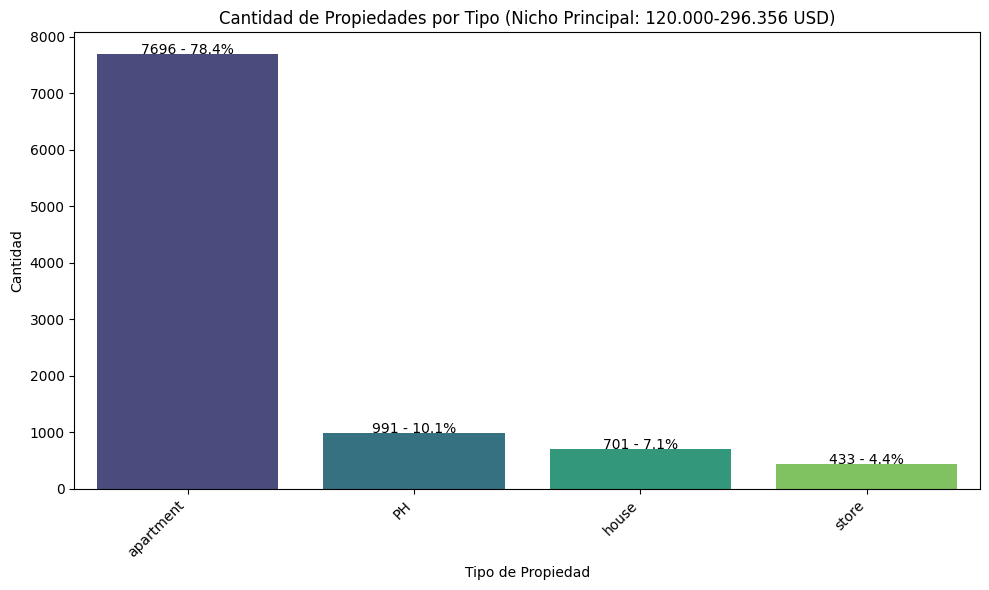

In [38]:
# @title
# Filtrar los precios entre Q1 y Q3 del subconjunto < 1M USD
# Usamos los valores de q1_1M y q3_1M calculados previamente
properties_between_q1_q3_1M = filtered_df_less_1M[(filtered_df_less_1M['price_aprox_usd'] >= q1_1M) & (filtered_df_less_1M['price_aprox_usd'] <= q3_1M)].copy()

print(f"Cantidad de propiedades con precio entre {q1_1M:,.0f} y {q3_1M:,.0f} USD (dentro del rango < 1M): {len(properties_between_q1_q3_1M)}".replace(',', '.'))
print(f"Porcentaje de este nicho sobre el total del dataset: {len(properties_between_q1_q3_1M) / len(df) * 100:.2f}%")

# Analizar tipo de propiedades en este nicho
property_type_counts_niche = properties_between_q1_q3_1M['property_type'].value_counts()
total_properties_niche = property_type_counts_niche.sum()

print("\nDistribución de Tipos de Propiedad en el Nicho Principal:")
display(property_type_counts_niche)

# Visualizar la distribución de tipos de propiedad en el nicho
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=property_type_counts_niche.index, y=property_type_counts_niche.values, hue=property_type_counts_niche.index, palette='viridis', legend=False)
plt.title(f'Cantidad de Propiedades por Tipo (Nicho Principal: {q1_1M:,.0f}-{q3_1M:,.0f} USD)'.replace(',', '.'))
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Cantidad')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# agrega etiquetas a las barras con valor y porcentaje
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 3,
            f'{int(height)} - {height/total_properties_niche:.1%}',
            ha="center")
plt.show()

### 6.4 Análisis de Micro-ubicación dentro del Nicho Principal (Apartamentos)

Exploramos la distribución de sub-áreas o barrios dentro del nicho principal de apartamentos (precios entre ~120.000 y ~296.000 USD) utilizando la columna `place_with_parent_names`. Aunque esta columna contiene una jerarquía (Argentina|Capital Federal|Barrio|Sub-área), nos enfocaremos en los niveles más detallados disponibles para identificar posibles variaciones por micro-ubicación.

In [39]:
# @title
# Extraer el nivel más granular de la ubicación para el nicho principal
# Asumiendo que el último elemento después del último '|' es el nivel más granular
apartments_in_principal_niche['granular_location'] = apartments_in_principal_niche['place_with_parent_names'].apply(lambda x: x.split('|')[-1] if isinstance(x, str) and '|' in x else 'Desconocido')

# Mostrar la distribución de las ubicaciones granulares
print("Distribución de Ubicaciones Granulares dentro del Nicho Principal (Apartamentos):")
granular_location_counts = apartments_in_principal_niche['granular_location'].value_counts()
display(granular_location_counts.head(20)) # Mostrar las 20 ubicaciones más comunes

# Calcular el precio promedio por cada ubicación granular (para ubicaciones con suficientes datos)
# Considerar solo ubicaciones con un número mínimo de propiedades (ej. > 10) para que la media sea más representativa
min_properties_for_mean = 10
locations_to_analyze = granular_location_counts[granular_location_counts >= min_properties_for_mean].index

if not locations_to_analyze.empty:
    price_by_granular_location = apartments_in_principal_niche[
        apartments_in_principal_niche['granular_location'].isin(locations_to_analyze)
    ].groupby('granular_location')['price_aprox_usd'].mean().sort_values(ascending=False)

    print(f"\nPrecio Promedio por Ubicación Granular (más de {min_properties_for_mean} propiedades) en el Nicho Principal:")
    display(price_by_granular_location)

    # Opcionalmente, visualizar el precio promedio por ubicación granular (Top N)
    if len(price_by_granular_location) > 0:
        top_n_locations = 15 # Mostrar las Top 15 ubicaciones por precio promedio
else:
    print(f"\nNo hay ubicaciones granulares con más de {min_properties_for_mean} propiedades en el Nicho Principal para calcular el precio promedio.")

Distribución de Ubicaciones Granulares dentro del Nicho Principal (Apartamentos):


granular_location
    7696
Name: count, dtype: int64


Precio Promedio por Ubicación Granular (más de 10 propiedades) en el Nicho Principal:


granular_location
    200804.239656
Name: price_aprox_usd, dtype: float64

### 6.5 Análisis de Características Numéricas por Tipo de Propiedad en el Nicho Principal

Analizamos las estadísticas descriptivas de las características numéricas (`price_aprox_usd`, `surface_total_in_m2`, `surface_covered_in_m2`, `price_usd_per_m2`, `rooms`, `room_density`) para cada tipo de propiedad (`property_type`) dentro del nicho principal identificado (propiedades con precios entre Q1 y Q3 del subconjunto < 1M USD).

In [40]:
# @title
# Asegurarse de que 'properties_between_q1_q3_1M' esté definido.
# Este DataFrame se define en la celda 0e391e58 o en la celda consolidada 5283e1ad.
# Si no está definido, ejecutar la celda correspondiente primero.

# Seleccionar las columnas numéricas a analizar
numerical_features_niche_analysis = [
    'price_aprox_usd',
    'surface_total_in_m2',
    'surface_covered_in_m2',
    'price_usd_per_m2',
    'rooms',
    'room_density' # Incluimos la nueva característica
]

# Filtrar el DataFrame principal para obtener solo las propiedades en el nicho
# Nota: properties_between_q1_q3_1M ya contiene este filtro
# Usaremos properties_between_q1_q3_1M si ya está definido, o filtraremos df si no
try:
    # Intenta usar el DataFrame del nicho si ya está definido
    df_niche = properties_between_q1_q3_1M.copy()
    print("Usando el DataFrame 'properties_between_q1_q3_1M' para el análisis del nicho.")
except NameError:
    # Si no está definido, filtramos el DataFrame original
    print("El DataFrame 'properties_between_q1_q3_1M' no está definido. Filtrando el DataFrame original 'df'.")
    # Asegurarse de que q1_1M y q3_1M estén definidos (provienen de la celda 6.1 d9ae441d)
    try:
        q1_1M, q3_1M
    except NameError:
        print("Error: q1_1M o q3_1M no están definidos. Por favor, ejecuta la celda 6.1 (d9ae441d) primero.")
        # Salir o manejar el error apropiadamente, por ahora solo imprimimos
        raise # Relanzar el error para detener la ejecución si q1/q3 no están definidos

    filtered_df_less_1M = df[df['price_aprox_usd'] < 1000000].copy()
    df_niche = filtered_df_less_1M[(filtered_df_less_1M['price_aprox_usd'] >= q1_1M) & (filtered_df_less_1M['price_aprox_usd'] <= q3_1M)].copy()
    print(f"Filtrado completado. {len(df_niche)} propiedades en el nicho.")


# Agrupar por tipo de propiedad y calcular estadísticas descriptivas para las columnas numéricas
niche_analysis_by_property_type = df_niche.groupby('property_type')[numerical_features_niche_analysis].describe()

print("\nEstadísticas Descriptivas de Características Numéricas por Tipo de Propiedad en el Nicho Principal:")
display(niche_analysis_by_property_type)

Usando el DataFrame 'properties_between_q1_q3_1M' para el análisis del nicho.

Estadísticas Descriptivas de Características Numéricas por Tipo de Propiedad en el Nicho Principal:


price_aprox_usd                                         \
                        count           mean           std       min   
property_type                                                          
PH                      991.0  201744.657490  58690.163031  120000.0   
apartment              7696.0  200804.239656  60114.653437  120000.0   
house                   701.0  238331.445436  54475.388271  120000.0   
store                   433.0  232304.272647  63268.119102  120000.0   

                                                                  \
                     25%       50%            75%            max   
property_type                                                      
PH             150000.00  190000.0  250000.000000  296355.854625   
apartment      146975.00  185514.5  255000.000000  296355.854625   
house          198000.00  250000.0  296355.854625  296355.854625   
store          173204.27  250000.0  296355.854625  296355.854625   

              surface_total_in_m2              ... rooms       room_density  \
                            count        mean  ...   75%   max        count   
property_type                                  ...                            
PH                          991.0  127.345238  ...   4.0  15.0        991.0   
apartment                  7696.0   93.760636  ...   3.0  13.0       7696.0   
house                       701.0  468.207406  ...   4.0  16.0        701.0   
store                       433.0  160.961983  ...   3.0   7.0        433.0   

                                                                                
                   mean       std       min       25%       50%       75%  max  
property_type                                                                   
PH             0.052984  0.231238  0.007844  0.027273  0.037500  0.047619  5.0  
apartment      0.045852  0.126066  0.000222  0.029412  0.041096  0.049383  5.0  
house          0.034637  0.159077  0.000033  0.020548  0.023531  0.030769  3.0  
store          0.040830  0.083071  0.001200  0.020408  0.023531  0.042857  1.5  

[4 rows x 48 columns]

### Conclusión del Nicho Principal:

**El análisis estadístico de precios revela un hallazgo clave: el segmento mayoritario del mercado en este conjunto de datos se sitúa por debajo del umbral de 1.000.000 USD. Particularmente, el** ***nicho principal de mercado*** **se concentra en el rango de precios entre el** ***Primer Cuartil (Q1)*** **y el** ***Tercer Cuartil (Q3)*** **(entre aproximadamente 120.000 y 296.000 USD), abarcando la proporción más significativa de las propiedades (aproximadamente el 51.75% del total del dataset). Dentro de este nicho, los ***departamentos*** constituyen el tipo de propiedad predominante. La identificación de este segmento es fundamental para orientar estrategias comerciales y análisis más específicos.**

## 7. Análisis de Correlación Específico del Nicho Principal

Se profundiza en el análisis de las relaciones entre las variables clave dentro del nicho principal identificado (departamentos con precios entre ~120.000 y ~296.000 USD).

In [41]:
# @title
# Definir el DataFrame para el nicho principal (apartamentos entre Q1 y Q3 de < 1M USD)
# apartments_niche_principal = properties_between_q1_q3_1M[properties_between_q1_q3_1M['property_type'] == 'apartment'].copy()
# Nota: Ya tenemos 'properties_between_q1_q3_1M' que representa el nicho principal identificado, que incluye otros tipos además de apartamentos.
# Si queremos analizar solo apartamentos en este rango, filtramos adicionalmente:
apartments_in_principal_niche = properties_between_q1_q3_1M[properties_between_q1_q3_1M['property_type'] == 'apartment'].copy()


# Calcular coeficientes de correlación para superficies en el nicho de apartamentos
correlation_matrix_niche_surfaces = apartments_in_principal_niche[['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2']].corr()

print("Coeficientes de correlación para apartamentos en el Nicho Principal (Precio vs Superficies):")
display(correlation_matrix_niche_surfaces)

# Calcular coeficiente de correlación para habitaciones en el nicho de apartamentos
correlation_price_rooms_niche_apartments = apartments_in_principal_niche['price_aprox_usd'].corr(apartments_in_principal_niche['rooms'])
print(f"\nCoeficiente de correlación entre Precio Total y Número de Habitaciones (Apartamentos en el Nicho Principal): {correlation_price_rooms_niche_apartments:.4f}")

# Calcular coeficiente de correlación entre superficies en el nicho de apartamentos
correlation_surfaces_niche_apartments = apartments_in_principal_niche['surface_total_in_m2'].corr(apartments_in_principal_niche['surface_covered_in_m2'])
print(f"\nCoeficiente de correlación entre Superficie Total y Superficie Cubierta (Apartamentos en el Nicho Principal): {correlation_surfaces_niche_apartments:.4f}")

Coeficientes de correlación para apartamentos en el Nicho Principal (Precio vs Superficies):


price_aprox_usd  surface_total_in_m2  \
price_aprox_usd               1.000000             0.104269   
surface_total_in_m2           0.104269             1.000000   
surface_covered_in_m2         0.088649             0.846933   

                       surface_covered_in_m2  
price_aprox_usd                     0.088649  
surface_total_in_m2                 0.846933  
surface_covered_in_m2               1.000000


Coeficiente de correlación entre Precio Total y Número de Habitaciones (Apartamentos en el Nicho Principal): 0.3201

Coeficiente de correlación entre Superficie Total y Superficie Cubierta (Apartamentos en el Nicho Principal): 0.8469


El análisis estadístico de los precios revela que la gran mayoría de las propiedades en este dataset tienen un precio inferior a 1.000.000 USD. Dentro de este segmento, el rango de precios entre el primer y tercer cuartil (aproximadamente 120.000 a 296.000 USD) representa el **nicho principal de mercado**, concentrando la mayoría de los registros (aproximadamente el 51.75% del total del dataset). La distribución de tipos de propiedad dentro de este nicho principal muestra un claro predominio de los departamentos. Este segmento es clave para enfocar estrategias comerciales y análisis más detallados.

### 7.1 Visualización de Relaciones en el Nicho Principal (Apartamentos)

### Visualización de Relaciones por Tipo de Propiedad (Desdoblado)

#### Tipo de Propiedad: apartment

DataFrame 'df_envolvente' no encontrado. Creándolo...
Variable 'just_above_1M_limit' no definida. Definiéndola ahora.
DataFrame 'df_envolvente' creado con 5081 propiedades.
Variables de trazado no definidas. Definiéndolas ahora.

Análisis para Tipo de Propiedad: apartment


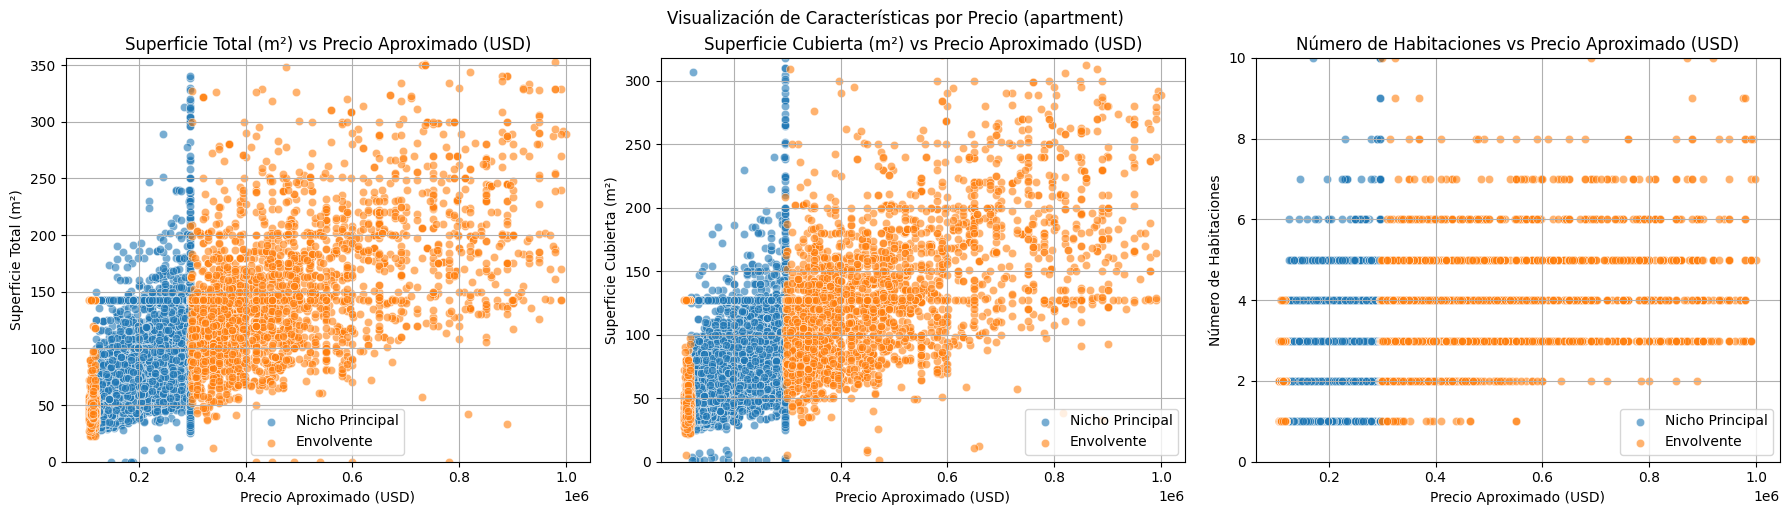

In [42]:
# @title
# Asegurarse de que las variables necesarias estén definidas
# df, properties_between_q1_q3_1M, df_envolvente, numerical_cols_to_plot_y, y_labels, x_label
try:
    df, properties_between_q1_q3_1M
except NameError:
    print("Error: El DataFrame 'df' o 'properties_between_q1_q3_1M' no están definidos. Por favor, ejecuta las celdas anteriores.")
    raise # Detener ejecución si los DataFrames no existen

# Define the 'envolvente' DataFrame if it's not already defined
try:
    df_envolvente
except NameError:
    print("DataFrame 'df_envolvente' no encontrado. Creándolo...")
    # Need q1_1M and q3_1M which should be defined from previous cells (e.g., d9ae441d)
    try:
        q1_1M, q3_1M
    except NameError:
        print("Error: q1_1M o q3_1M no definidos. Por favor, ejecuta las celdas anteriores.")
        raise # Detener ejecución si q1/q3 no están definidos

    # Need just_above_1M_limit which should be defined from previous cells (e.g., 81ba328a)
    try:
        just_above_1M_limit
    except NameError:
        print("Variable 'just_above_1M_limit' no definida. Definiéndola ahora.")
        just_above_1M_limit = 1000000 # Assuming the limit is 1M USD

    # Define the 'envolvente' price ranges as in cell 81ba328a
    buffer_percentage = 0.10
    lower_envolvente_lower_limit = q1_1M * (1 - buffer_percentage) # 10% below Q1
    min_price_overall = df['price_aprox_usd'].min() # Assuming df is available
    lower_envolvente_analysis_min_price = max(min_price_overall, lower_envolvente_lower_limit)


    # Filter for the lower envolvente range
    df_lower_envolvente = df[(df['price_aprox_usd'] >= lower_envolvente_analysis_min_price) & (df['price_aprox_usd'] < q1_1M)].copy()

    # Filter for the upper envolvente range
    df_upper_envolvente = df[(df['price_aprox_usd'] > q3_1M) & (df['price_aprox_usd'] < just_above_1M_limit)].copy()

    # Combine the two DataFrames
    df_envolvente = pd.concat([df_lower_envolvente, df_upper_envolvente])
    print(f"DataFrame 'df_envolvente' creado con {len(df_envolvente)} propiedades.")


# Define the variables used for plotting if they are not defined
try:
    numerical_cols_to_plot_y, y_labels, x_label
except NameError:
    print("Variables de trazado no definidas. Definiéndolas ahora.")
    numerical_cols_to_plot_y = ['surface_total_in_m2', 'surface_covered_in_m2', 'rooms']
    y_labels = ['Superficie Total (m²)', 'Superficie Cubierta (m²)', 'Número de Habitaciones']
    x_label = 'Precio Aproximado (USD)'


prop_type = 'apartment'
print(f"\nAnálisis para Tipo de Propiedad: {prop_type}")

# Filtrar dataframes por tipo de propiedad
niche_prop_type_df = properties_between_q1_q3_1M[properties_between_q1_q3_1M['property_type'] == prop_type]
envolvente_prop_type_df = df_envolvente[df_envolvente['property_type'] == prop_type]

# Omitir si ambos dataframes están vacíos para este tipo de propiedad
if niche_prop_type_df.empty and envolvente_prop_type_df.empty:
    print(f"  No hay datos para el tipo de propiedad '{prop_type}' en el nicho ni la envolvente.")
else:
    # Create subplots for the three numerical columns in two columns
    fig, axes = plt.subplots(1, 3, figsize=(18, 5)) # 1 row, 3 columns

    for i, col in enumerate(numerical_cols_to_plot_y):
        ax = axes[i] # Select the current subplot axis

        # Graficar datos del Nicho Principal
        if not niche_prop_type_df.empty:
            sns.scatterplot(data=niche_prop_type_df, x='price_aprox_usd', y=col, label='Nicho Principal', alpha=0.6, ax=ax)

        # Datos de Envolvente de Gráfico
        if not envolvente_prop_type_df.empty:
            sns.scatterplot(data=envolvente_prop_type_df, x='price_aprox_usd', y=col, label='Envolvente', alpha=0.6, ax=ax)

        ax.set_title(f'{y_labels[i]} vs {x_label}')
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_labels[i])

        # --- Mejora para la distribución del eje Y ---
        # Calcular un límite superior razonable para el eje Y para visualizar mejor la distribución
        # Usar el percentil 99 para las áreas de superficie y un límite fijo para las habitaciones
        if col in ['surface_total_in_m2', 'surface_covered_in_m2']:
            # Combinar datos tanto de nicho como de envolvente para el cálculo de percentiles
            combined_data = pd.concat([niche_prop_type_df[col], envolvente_prop_type_df[col]]).dropna()
            if not combined_data.empty:
                 y_upper_limit = combined_data.quantile(0.99) * 1.1 # Agregar un pequeño búfer
                 ax.set_ylim(0, y_upper_limit) # Establecer el límite del eje Y desde 0 hasta el límite calculado
            else:
                 ax.set_ylim(0, None) # Sin datos, establecer límite predeterminado

        elif col == 'rooms':
            # Establecer un límite superior fijo para las habitaciones, ya que los recuentos de habitaciones extremos son valores atípicos
            ax.set_ylim(0, 10) # Suponiendo que las propiedades en estos segmentos normalmente no excedan las 10 habitaciones

       # --- Fin de la mejora para la distribución del eje Y ---

        ax.legend()
        ax.grid(True)

    plt.tight_layout() # Adjust layout to prevent titles/labels overlapping
    plt.suptitle(f'Visualización de Características por Precio ({prop_type})', y=1.02) # Add a main title for the set of subplots
    plt.show()

#### Tipo de Propiedad: house


Análisis para Tipo de Propiedad: house


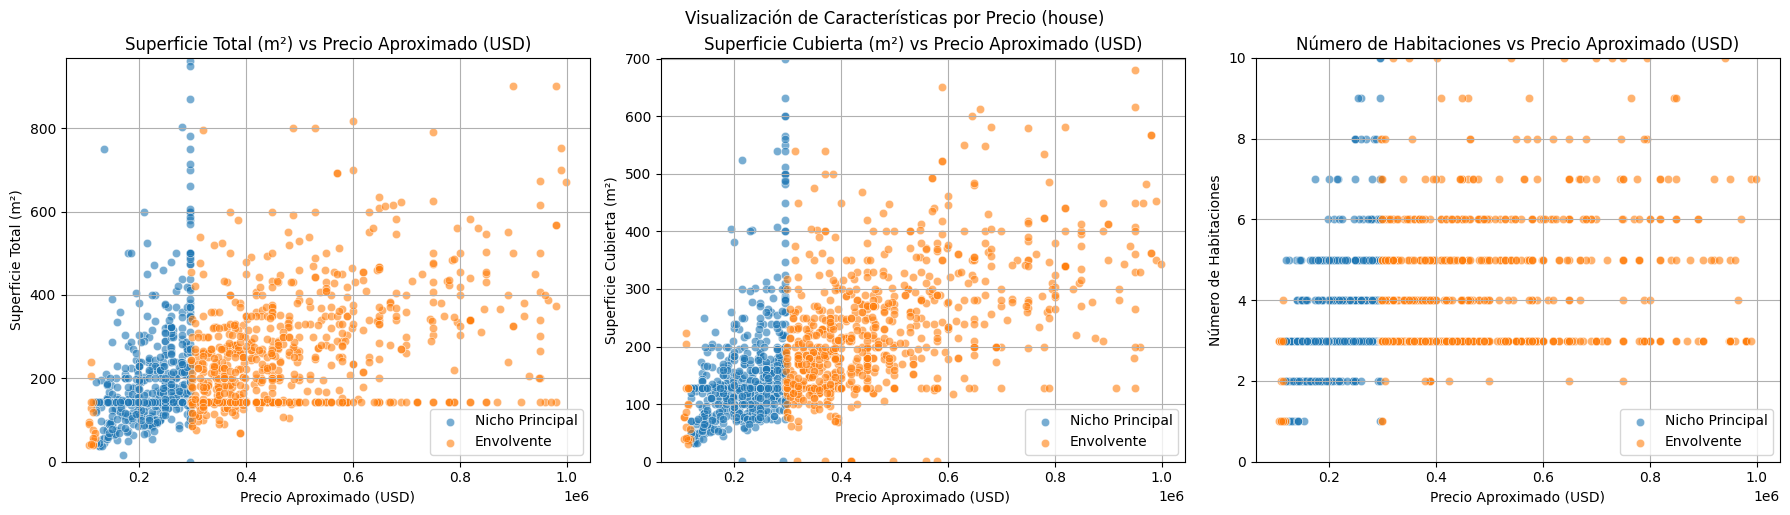

In [43]:
# @title
# Asegurarse de que las variables necesarias estén definidas
# df, properties_between_q1_q3_1M, df_envolvente, numerical_cols_to_plot_y, y_labels, x_label
try:
    df, properties_between_q1_q3_1M, df_envolvente, numerical_cols_to_plot_y, y_labels, x_label
except NameError:
    print("Error: Algunas variables necesarias no están definidas. Por favor, ejecuta las celdas anteriores.")
    # Define placeholder variables or raise an error if needed
    # For now, let's assume they are defined from previous execution


prop_type = 'house'
print(f"\nAnálisis para Tipo de Propiedad: {prop_type}")

# Filtrar dataframes por tipo de propiedad
niche_prop_type_df = properties_between_q1_q3_1M[properties_between_q1_q3_1M['property_type'] == prop_type]
envolvente_prop_type_df = df_envolvente[df_envolvente['property_type'] == prop_type]

# Omitir si ambos dataframes están vacíos para este tipo de propiedad
if niche_prop_type_df.empty and envolvente_prop_type_df.empty:
    print(f"  No hay datos para el tipo de propiedad '{prop_type}' en el nicho ni la envolvente.")
else:
    # Create subplots for the three numerical columns in two columns
    fig, axes = plt.subplots(1, 3, figsize=(18, 5)) # 1 row, 3 columns

    for i, col in enumerate(numerical_cols_to_plot_y):
        ax = axes[i] # Select the current subplot axis

        # Graficar datos del Nicho Principal
        if not niche_prop_type_df.empty:
            sns.scatterplot(data=niche_prop_type_df, x='price_aprox_usd', y=col, label='Nicho Principal', alpha=0.6, ax=ax)

        # Datos de Envolvente de Gráfico
        if not envolvente_prop_type_df.empty:
            sns.scatterplot(data=envolvente_prop_type_df, x='price_aprox_usd', y=col, label='Envolvente', alpha=0.6, ax=ax)

        ax.set_title(f'{y_labels[i]} vs {x_label}')
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_labels[i])

        # --- Mejora para la distribución del eje Y ---
        # Calcular un límite superior razonable para el eje Y para visualizar mejor la distribución
        # Usar el percentil 99 para las áreas de superficie y un límite fijo para las habitaciones
        if col in ['surface_total_in_m2', 'surface_covered_in_m2']:
            # Combinar datos tanto de nicho como de envolvente para el cálculo de percentiles
            combined_data = pd.concat([niche_prop_type_df[col], envolvente_prop_type_df[col]]).dropna()
            if not combined_data.empty:
                 y_upper_limit = combined_data.quantile(0.99) * 1.1 # Agregar un pequeño búfer
                 ax.set_ylim(0, y_upper_limit) # Establecer el límite del eje Y desde 0 hasta el límite calculado
            else:
                 ax.set_ylim(0, None) # Sin datos, establecer límite predeterminado

        elif col == 'rooms':
            # Establecer un límite superior fijo para las habitaciones, ya que los recuentos de habitaciones extremos son valores atípicos
            ax.set_ylim(0, 10) # Suponiendo que las propiedades en estos segmentos normalmente no excedan las 10 habitaciones

       # --- Fin de la mejora para la distribución del eje Y ---

        ax.legend()
        ax.grid(True)

    plt.tight_layout() # Adjust layout to prevent titles/labels overlapping
    plt.suptitle(f'Visualización de Características por Precio ({prop_type})', y=1.02) # Add a main title for the set of subplots
    plt.show()

#### Tipo de Propiedad: store


Análisis para Tipo de Propiedad: store


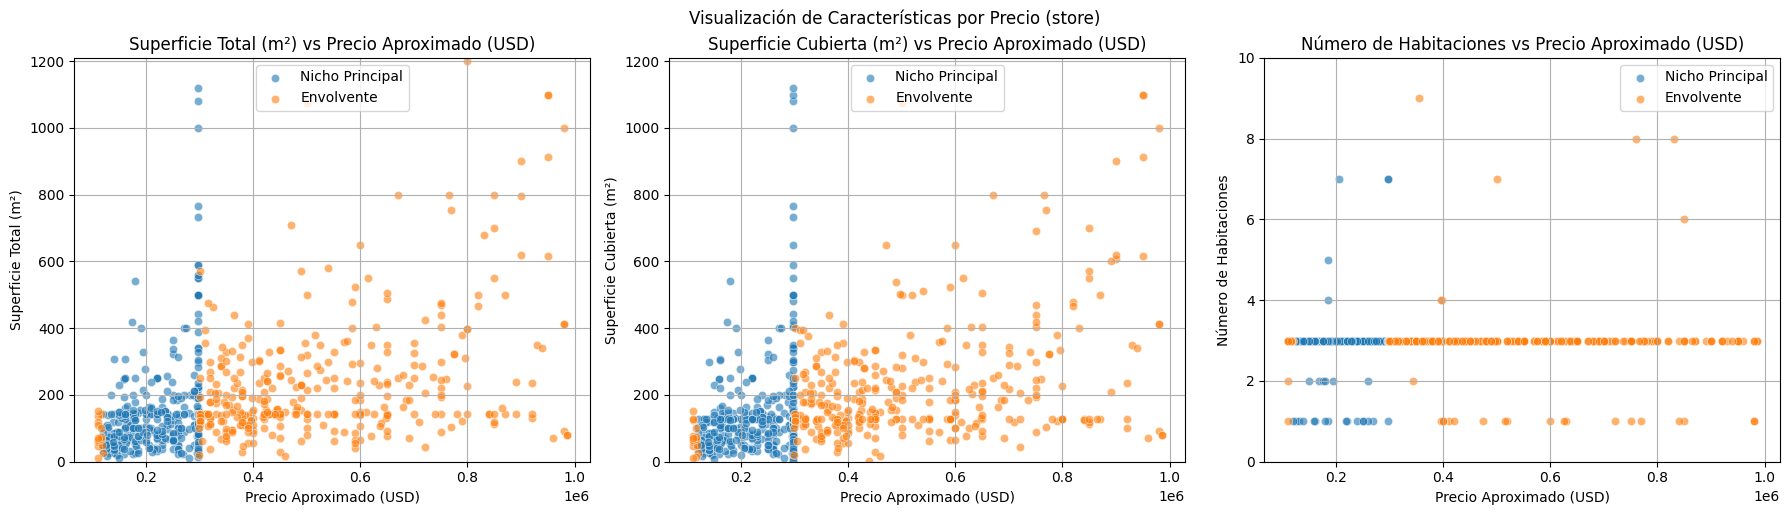

In [44]:
# @title
# Asegurarse de que las variables necesarias estén definidas
# df, properties_between_q1_q3_1M, df_envolvente, numerical_cols_to_plot_y, y_labels, x_label
try:
    df, properties_between_q1_q3_1M, df_envolvente, numerical_cols_to_plot_y, y_labels, x_label
except NameError:
    print("Error: Algunas variables necesarias no están definidas. Por favor, ejecuta las celdas anteriores.")
    # Define placeholder variables or raise an error if needed
    # For now, let's assume they are defined from previous execution

prop_type = 'store'
print(f"\nAnálisis para Tipo de Propiedad: {prop_type}")

# Filtrar dataframes por tipo de propiedad
niche_prop_type_df = properties_between_q1_q3_1M[properties_between_q1_q3_1M['property_type'] == prop_type]
envolvente_prop_type_df = df_envolvente[df_envolvente['property_type'] == prop_type]

# Omitir si ambos dataframes están vacíos para este tipo de propiedad
if niche_prop_type_df.empty and envolvente_prop_type_df.empty:
    print(f"  No hay datos para el tipo de propiedad '{prop_type}' en el nicho ni la envolvente.")
else:
    # Create subplots for the three numerical columns in two columns
    fig, axes = plt.subplots(1, 3, figsize=(18, 5)) # 1 row, 3 columns

    for i, col in enumerate(numerical_cols_to_plot_y):
        ax = axes[i] # Select the current subplot axis

        # Graficar datos del Nicho Principal
        if not niche_prop_type_df.empty:
            sns.scatterplot(data=niche_prop_type_df, x='price_aprox_usd', y=col, label='Nicho Principal', alpha=0.6, ax=ax)

        # Datos de Envolvente de Gráfico
        if not envolvente_prop_type_df.empty:
            sns.scatterplot(data=envolvente_prop_type_df, x='price_aprox_usd', y=col, label='Envolvente', alpha=0.6, ax=ax)

        ax.set_title(f'{y_labels[i]} vs {x_label}')
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_labels[i])

        # --- Mejora para la distribución del eje Y ---
        # Calcular un límite superior razonable para el eje Y para visualizar mejor la distribución
        # Usar el percentil 99 para las áreas de superficie y un límite fijo para las habitaciones
        if col in ['surface_total_in_m2', 'surface_covered_in_m2']:
            # Combinar datos tanto de nicho como de envolvente para el cálculo de percentiles
            combined_data = pd.concat([niche_prop_type_df[col], envolvente_prop_type_df[col]]).dropna()
            if not combined_data.empty:
                 y_upper_limit = combined_data.quantile(0.99) * 1.1 # Agregar un pequeño búfer
                 ax.set_ylim(0, y_upper_limit) # Establecer el límite del eje Y desde 0 hasta el límite calculado
            else:
                 ax.set_ylim(0, None) # Sin datos, establecer límite predeterminado

        elif col == 'rooms':
            # Establecer un límite superior fijo para las habitaciones, ya que los recuentos de habitaciones extremos son valores atípicos
            ax.set_ylim(0, 10) # Suponiendo que las propiedades en estos segmentos normalmente no excedan las 10 habitaciones

       # --- Fin de la mejora para la distribución del eje Y ---

        ax.legend()
        ax.grid(True)

    plt.tight_layout() # Adjust layout to prevent titles/labels overlapping
    plt.suptitle(f'Visualización de Características por Precio ({prop_type})', y=1.02) # Add a main title for the set of subplots
    plt.show()

#### Tipo de Propiedad: PH


Análisis para Tipo de Propiedad: PH


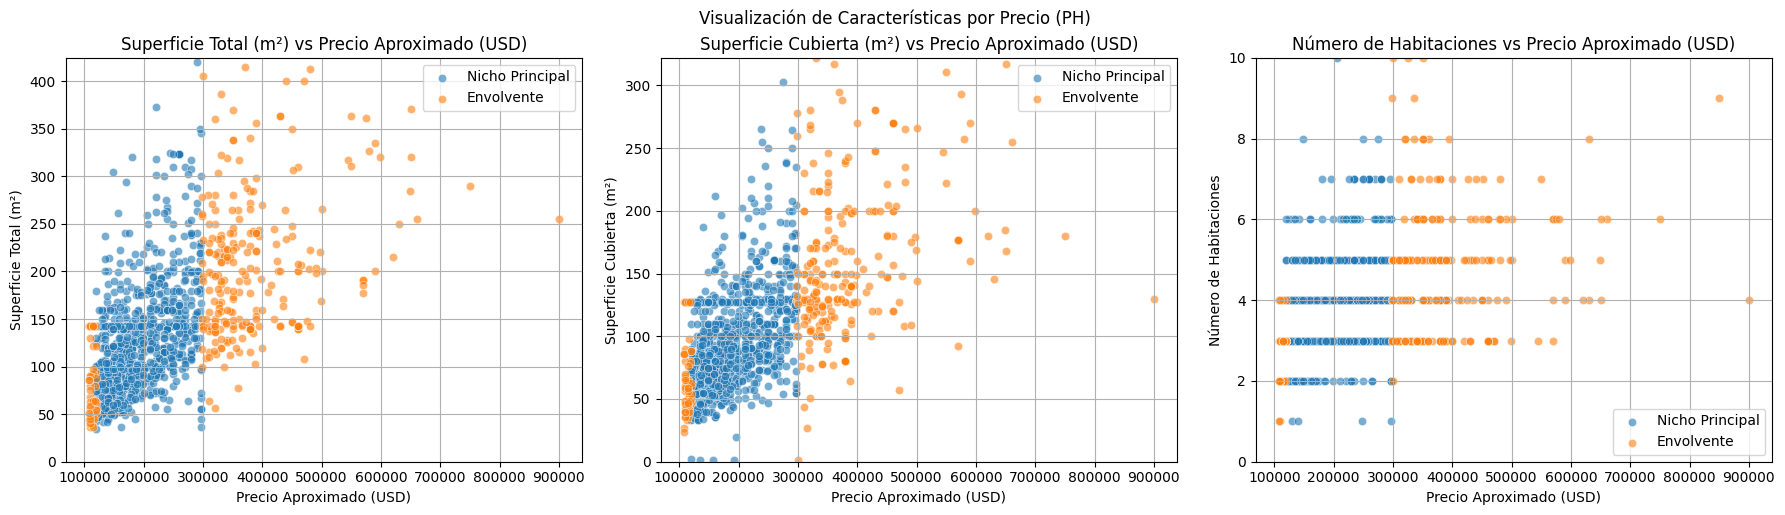

In [45]:
# @title
# Asegurarse de que las variables necesarias estén definidas
# df, properties_between_q1_q3_1M, df_envolvente, numerical_cols_to_plot_y, y_labels, x_label
try:
    df, properties_between_q1_q3_1M, df_envolvente, numerical_cols_to_plot_y, y_labels, x_label
except NameError:
    print("Error: Algunas variables necesarias no están definidas. Por favor, ejecuta las celdas anteriores.")
    # Define placeholder variables or raise an error if needed
    # For now, let's assume they are defined from previous execution


prop_type = 'PH'
print(f"\nAnálisis para Tipo de Propiedad: {prop_type}")

# Filtrar dataframes por tipo de propiedad
niche_prop_type_df = properties_between_q1_q3_1M[properties_between_q1_q3_1M['property_type'] == prop_type]
envolvente_prop_type_df = df_envolvente[df_envolvente['property_type'] == prop_type]

# Omitir si ambos dataframes están vacíos para este tipo de propiedad
if niche_prop_type_df.empty and envolvente_prop_type_df.empty:
    print(f"  No hay datos para el tipo de propiedad '{prop_type}' en el nicho ni la envolvente.")
else:
    # Create subplots for the three numerical columns in two columns
    fig, axes = plt.subplots(1, 3, figsize=(18, 5)) # 1 row, 3 columns

    for i, col in enumerate(numerical_cols_to_plot_y):
        ax = axes[i] # Select the current subplot axis

        # Graficar datos del Nicho Principal
        if not niche_prop_type_df.empty:
            sns.scatterplot(data=niche_prop_type_df, x='price_aprox_usd', y=col, label='Nicho Principal', alpha=0.6, ax=ax)

        # Datos de Envolvente de Gráfico
        if not envolvente_prop_type_df.empty:
            sns.scatterplot(data=envolvente_prop_type_df, x='price_aprox_usd', y=col, label='Envolvente', alpha=0.6, ax=ax)

        ax.set_title(f'{y_labels[i]} vs {x_label}')
        ax.set_xlabel(x_label)
        ax.set_ylabel(y_labels[i])

        # --- Mejora para la distribución del eje Y ---
        # Calcular un límite superior razonable para el eje Y para visualizar mejor la distribución
        # Usar el percentil 99 para las áreas de superficie y un límite fijo para las habitaciones
        if col in ['surface_total_in_m2', 'surface_covered_in_m2']:
            # Combinar datos tanto de nicho como de envolvente para el cálculo de percentiles
            combined_data = pd.concat([niche_prop_type_df[col], envolvente_prop_type_df[col]]).dropna()
            if not combined_data.empty:
                 y_upper_limit = combined_data.quantile(0.99) * 1.1 # Agregar un pequeño búfer
                 ax.set_ylim(0, y_upper_limit) # Establecer el límite del eje Y desde 0 hasta el límite calculado
            else:
                 ax.set_ylim(0, None) # Sin datos, establecer límite predeterminado

        elif col == 'rooms':
            # Establecer un límite superior fijo para las habitaciones, ya que los recuentos de habitaciones extremos son valores atípicos
            ax.set_ylim(0, 10) # Suponiendo que las propiedades en estos segmentos normalmente no excedan las 10 habitaciones

       # --- Fin de la mejora para la distribución del eje Y ---

        ax.legend()
        ax.grid(True)

    plt.tight_layout() # Adjust layout to prevent titles/labels overlapping
    plt.suptitle(f'Visualización de Características por Precio ({prop_type})', y=1.02) # Add a main title for the set of subplots
    plt.show()

### Conclusión del Análisis del Nicho Principal (Apartamentos):

**El análisis de correlación y las visualizaciones dentro del nicho principal (apartamentos entre ~120.000 y ~296.000 USD) muestran que las superficies (total y cubierta) tienen una correlación muy débil con el precio. La cantidad de habitaciones presenta una correlación débil a moderada. Esto sugiere que, si bien hay una ligera tendencia a que los apartamentos más grandes o con más habitaciones sean un poco más caros en este rango, otros factores no incluidos en este análisis (ubicación exacta, estado, antigüedad, etc.) probablemente tienen una influencia mucho mayor en la determinación del precio en este segmento.**

## 8. Análisis de Relación entre Precios y Superficies por Tipo de Propiedad

Se examina la relación entre precios por m2 y superficies (cubierta y total), tomando la media del precio promedio por m² por tipo de propiedad.

Precio promedio por m² (Cubierta vs Total) por Tipo de Propiedad:


property_type  price_usd_per_m2_covered  price_usd_per_m2_total
0            PH               2840.820891             1793.542568
1     apartment               3426.629102             2821.204657
2         house               4750.088421             2012.939608
3         store               3476.687087             3006.147328

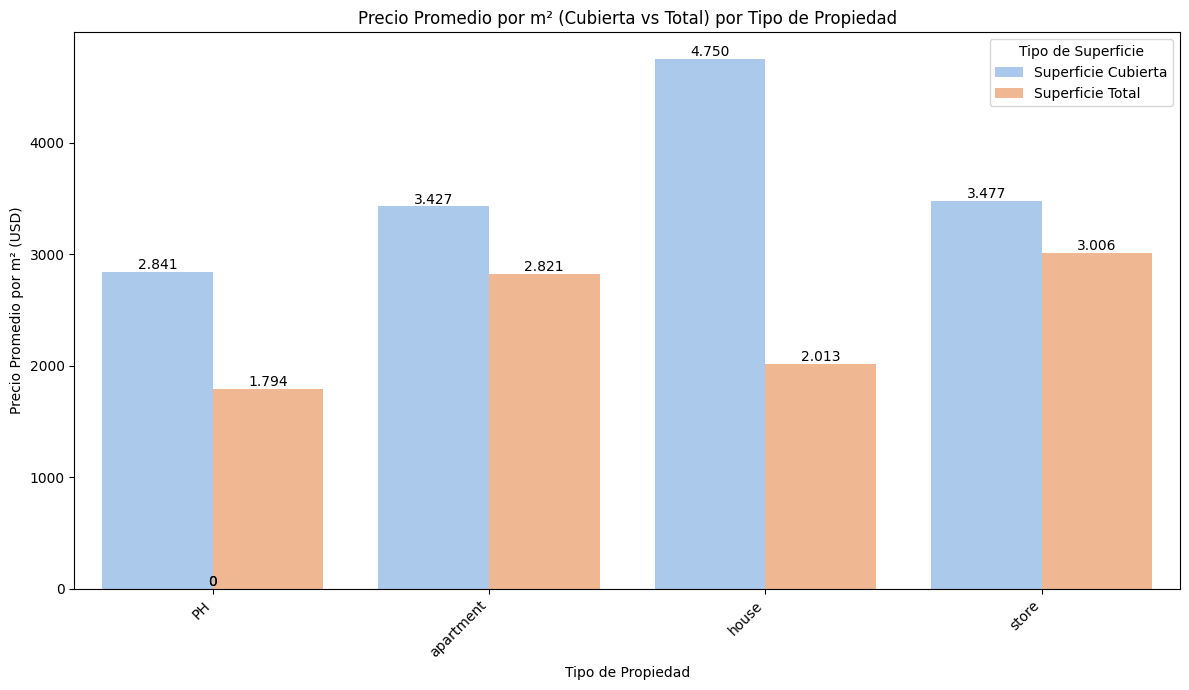

In [46]:
# @title
# Calcular el precio promedio por m2 para superficie cubierta y total por tipo de propiedad
# Manejar casos donde la superficie sea cero para evitar división por cero
df_cleaned_price_per_m2 = df.copy()
df_cleaned_price_per_m2['price_usd_per_m2_covered'] = df_cleaned_price_per_m2.apply(
    lambda row: row['price_aprox_usd'] / row['surface_covered_in_m2'] if row['surface_covered_in_m2'] > 0 else None, axis=1
)
df_cleaned_price_per_m2['price_usd_per_m2_total'] = df_cleaned_price_per_m2.apply(
    lambda row: row['price_aprox_usd'] / row['surface_total_in_m2'] if row['surface_total_in_m2'] > 0 else None, axis=1
)

# calcular la media del precio por m2 para superficie cubierta y total por tipo de propiedad
price_per_m2_summary = df_cleaned_price_per_m2.groupby('property_type')[['price_usd_per_m2_covered', 'price_usd_per_m2_total']].mean().reset_index()

# 'derretir' los datos para el gráfico de barras agrupadas
price_per_m2_melted = price_per_m2_summary.melt(
    id_vars='property_type',
    value_vars=['price_usd_per_m2_covered', 'price_usd_per_m2_total'],
    var_name='surface_type',
    value_name='mean_price_usd_per_m2'
)

# mapear nombres de superficie para mejor visualización
price_per_m2_melted['surface_type'] = price_per_m2_melted['surface_type'].replace({
    'price_usd_per_m2_covered': 'Superficie Cubierta',
    'price_usd_per_m2_total': 'Superficie Total'
})

print("Precio promedio por m² (Cubierta vs Total) por Tipo de Propiedad:")
display(price_per_m2_summary)

# crear el gráfico de barras agrupadas
plt.figure(figsize=(12, 7))
ax = sns.barplot(x='property_type', y='mean_price_usd_per_m2', hue='surface_type', data=price_per_m2_melted, palette='pastel')
plt.title('Precio Promedio por m² (Cubierta vs Total) por Tipo de Propiedad')
plt.xlabel('Tipo de Propiedad')
plt.ylabel('Precio Promedio por m² (USD)')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Superficie')
plt.tight_layout()

# agregar etiquetas a las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}'.replace(',', '.'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5),
                textcoords='offset points')

plt.show()

### Conclusión de Relaciones entre Precios y Superficies por Tipo de Propiedad:

**El análisis del precio promedio por m² por tipo de propiedad revela diferencias significativas. Generalmente, el precio por m² cubierto es mayor que el precio por m² total, lo cual es esperable. La comparación entre tipos de propiedad muestra variaciones en el valor por m², lo que puede indicar diferencias en la demanda, costos de construcción o características típicas de cada tipo en esta ubicación. Es importante notar que el cálculo del precio por m² original (`price_usd_per_m2`) en el dataset podría tener inconsistencias, por lo que calcularlo a partir del precio total y las superficies (cubierta y total) proporciona una métrica más confiable.**

## 9. Visualización Geoespacial

Utilizamos las coordenadas geográficas (latitud y longitud) para visualizar las propiedades en un mapa interactivo, destacando la ubicación del nicho principal de mercado y los valores atípicos de alto precio.

In [47]:
# @title
import folium
from folium.plugins import MarkerCluster

# Asegurarse de que los DataFrames necesarios estén definidos:
# df (DataFrame completo)
# price_outliers_df (Outliers de precio - definidos en celda 94758b6b)
# properties_between_q1_q3_1M (Nicho principal - definidos en celda 0e391e58 o 5283e1ad)

# Verificar si los DataFrames existen, si no, intentar crearlos (requiere df, q1_1M, q3_1M, filtered_df_less_1M)
try:
    price_outliers_df
except NameError:
    print("DataFrame 'price_outliers_df' no encontrado. Creándolo...")
    # Recalcular si es necesario (requiere df)
    try:
        df
    except NameError:
        print("Error: DataFrame 'df' no encontrado.")
        raise # Detener ejecución si df no existe

    # Recalcular Q3 y IQR para price_aprox_usd si no están definidos
    try:
        Q3_price, IQR_price
    except NameError:
        print("Q3_price o IQR_price no definidos. Calculándolos...")
        Q1_price = df['price_aprox_usd'].quantile(0.25)
        Q3_price = df['price_aprox_usd'].quantile(0.75)
        IQR_price = Q3_price - Q1_price

    upper_bound_price = Q3_price + 1.5 * IQR_price
    price_outliers_df = df[df['price_aprox_usd'] > upper_bound_price].copy()
    print(f"Creado 'price_outliers_df' con {len(price_outliers_df)} propiedades.")


try:
    properties_between_q1_q3_1M
except NameError:
    print("DataFrame 'properties_between_q1_q3_1M' no encontrado. Creándolo...")
    # Recalcular si es necesario (requiere df, q1_1M, q3_1M, filtered_df_less_1M)
    try:
        df
    except NameError:
        print("Error: DataFrame 'df' no encontrado.")
        raise

    try:
        q1_1M, q3_1M
    except NameError:
         print("q1_1M o q3_1M no definidos. Calculándolos (requiere filtered_df_less_1M)...")
         try:
             filtered_df_less_1M
         except NameError:
             print("DataFrame 'filtered_df_less_1M' no encontrado. Creándolo (requiere df)...")
             filtered_df_less_1M = df[df['price_aprox_usd'] < 1000000].copy()

         q1_1M = filtered_df_less_1M['price_aprox_usd'].quantile(0.25)
         q3_1M = filtered_df_less_1M['price_aprox_usd'].quantile(0.75)


    properties_between_q1_q3_1M = filtered_df_less_1M[(filtered_df_less_1M['price_aprox_usd'] >= q1_1M) & (filtered_df_less_1M['price_aprox_usd'] <= q3_1M)].copy()
    print(f"Creado 'properties_between_q1_q3_1M' con {len(properties_between_q1_q3_1M)} propiedades.")


# Crear un mapa base centrado en la media de lat/lon del dataset
map_center = [df['lat'].mean(), df['lon'].mean()]
properati_map = folium.Map(location=map_center, zoom_start=12)

# Crear capas de marcadores
mc_all = MarkerCluster(name='Todas las Propiedades').add_to(properati_map)
mc_niche = MarkerCluster(name='Nicho Principal').add_to(properati_map)
mc_outliers = MarkerCluster(name='Outliers de Precio').add_to(properati_map)


# Añadir marcadores para todas las propiedades (capa base)
for idx, row in df.iterrows():
    if pd.notnull(row['lat']) and pd.notnull(row['lon']):
        popup_text = f"Tipo: {row['property_type']}<br>Precio: {row['price_aprox_usd']:,.0f} USD<br>Superficie Total: {row['surface_total_in_m2']:,.0f} m²"
        folium.Marker([row['lat'], row['lon']], popup=popup_text).add_to(mc_all)

# Añadir marcadores para propiedades del nicho principal (capa específica)
for idx, row in properties_between_q1_q3_1M.iterrows():
     if pd.notnull(row['lat']) and pd.notnull(row['lon']):
        popup_text = f"Tipo: {row['property_type']}<br>Precio: {row['price_aprox_usd']:,.0f} USD<br>Superficie Total: {row['surface_total_in_m2']:,.0f} m²"
        folium.Marker([row['lat'], row['lon']], popup=popup_text, icon=folium.Icon(color='green')).add_to(mc_niche)


# Añadir marcadores para outliers de precio (capa específica)
for idx, row in price_outliers_df.iterrows():
     if pd.notnull(row['lat']) and pd.notnull(row['lon']):
        popup_text = f"Tipo: {row['property_type']}<br>Precio: {row['price_aprox_usd']:,.0f} USD<br>Superficie Total: {row['surface_total_in_m2']:,.0f} m²"
        folium.Marker([row['lat'], row['lon']], popup=popup_text, icon=folium.Icon(color='red')).add_to(mc_outliers)

# Añadir control de capas al mapa
folium.LayerControl().add_to(properati_map)

# Mostrar el mapa
print("Mapa de Propiedades:")
display(properati_map)

Output hidden; open in https://colab.research.google.com to view.

## 10. Análisis de Precios por Ubicación Geográfica (análisis por comunas)

Investigamos cómo el precio de las propiedades y el precio por metro cuadrado varían en función de su ubicación geográfica, utilizando la información de la columna `place_with_parent_names`. Analizaremos diferentes niveles de granularidad de la ubicación para identificar patrones de precio a nivel de ciudad, barrio o sub-área.

In [48]:
# @title
# Función para extraer un nivel específico de la jerarquía de ubicación
def extract_location_level(place_string, level):
    if isinstance(place_string, str):
        parts = [part for part in place_string.split('|') if part]
        if len(parts) > level:
            return parts[level]
    return 'Desconocido'

# Extraer diferentes niveles de ubicación
# Nivel 0: País (Argentina)
# Nivel 1: Provincia/Estado (Capital Federal)
# Nivel 2: Ciudad/Barrio principal (Ej: Palermo, Belgrano)
# Nivel 3: Sub-área/Barrio más granular (Ej: Palermo Soho, Palermo Viejo) - si existe

# Asegurarse de que el DataFrame df esté disponible
try:
    df
except NameError:
    print("Error: DataFrame 'df' no encontrado. Por favor, carga los datos primero.")
    raise # Detener ejecución si df no existe


df_location_analysis = df.copy()

# Extraer niveles de interés (ajustar los niveles según la estructura real de los datos)
# Basándonos en la visualización de df.head(), parece que Capital Federal es el Nivel 1
# y el Barrio principal es el Nivel 2, y la sub-área el Nivel 3.

df_location_analysis['city'] = df_location_analysis['place_with_parent_names'].apply(lambda x: extract_location_level(x, 1)) # Capital Federal
df_location_analysis['main_neighborhood'] = df_location_analysis['place_with_parent_names'].apply(lambda x: extract_location_level(x, 2)) # Barrio principal
df_location_analysis['sub_neighborhood'] = df_location_analysis['place_with_parent_names'].apply(lambda x: extract_location_level(x, 3)) # Sub-área (si existe)


# Calcular el precio promedio y el precio promedio por m2 (cubierto y total) por nivel de ubicación
# Asegurarse de que las columnas de precio y superficie sean numéricas
numerical_cols = ['price_aprox_usd', 'surface_total_in_m2', 'surface_covered_in_m2']
for col in numerical_cols:
    if col not in df_location_analysis.select_dtypes(include=np.number).columns:
        print(f"Advertencia: La columna '{col}' no es numérica. Saltando cálculo de promedios.")
        # Opcional: intentar convertirla si fuera necesario
        # df_location_analysis[col] = pd.to_numeric(df_location_analysis[col], errors='coerce')


# Recalcular price_usd_per_m2_covered y price_usd_per_m2_total si no existen o para asegurar consistencia
# Manejar división por cero
df_location_analysis['price_usd_per_m2_covered'] = df_location_analysis.apply(
    lambda row: row['price_aprox_usd'] / row['surface_covered_in_m2'] if row['surface_covered_in_m2'] > 0 and pd.notnull(row['price_aprox_usd']) and pd.notnull(row['surface_covered_in_m2']) else None, axis=1
)
df_location_analysis['price_usd_per_m2_total'] = df_location_analysis.apply(
    lambda row: row['price_aprox_usd'] / row['surface_total_in_m2'] if row['surface_total_in_m2'] > 0 and pd.notnull(row['price_aprox_usd']) and pd.notnull(row['surface_total_in_m2']) else None, axis=1
)


# Analizar por el nivel de "Barrio principal"
print("\nAnálisis de Precio Promedio por Barrio Principal:")
price_by_main_neighborhood = df_location_analysis.groupby('main_neighborhood')[['price_aprox_usd', 'price_usd_per_m2_covered', 'price_usd_per_m2_total']].mean()
display(price_by_main_neighborhood.sort_values(by='price_aprox_usd', ascending=False).head(20)) # Mostrar top 20 por precio total

# Analizar por el nivel de "Sub-área" (si es diferente del barrio principal y tiene suficientes datos)
print("\nAnálisis de Precio Promedio por Sub-área (si aplica y hay suficientes datos):")
# Filtrar sub-áreas que no sean el mismo que el barrio principal y que tengan suficientes registros
sub_neighborhood_counts = df_location_analysis['sub_neighborhood'].value_counts()
min_properties_sub = 10 # Mínimo de propiedades para considerar la sub-área

relevant_sub_neighborhoods = sub_neighborhood_counts[sub_neighborhood_counts >= min_properties_sub].index
# Excluir casos donde sub_neighborhood es igual a main_neighborhood o 'Desconocido'
relevant_sub_neighborhoods = [sub for sub in relevant_sub_neighborhoods if sub != 'Desconocido' and sub not in df_location_analysis['main_neighborhood'].unique()]


if relevant_sub_neighborhoods:
     # Filtrar el DataFrame para incluir solo las sub-áreas relevantes
    df_relevant_sub = df_location_analysis[df_location_analysis['sub_neighborhood'].isin(relevant_sub_neighborhoods)].copy()

    price_by_sub_neighborhood = df_relevant_sub.groupby('sub_neighborhood')[['price_aprox_usd', 'price_usd_per_m2_covered', 'price_usd_per_m2_total']].mean()
    display(price_by_sub_neighborhood.sort_values(by='price_aprox_usd', ascending=False).head(20)) # Mostrar top 20 por precio total
else:
    print("No hay suficientes sub-áreas distintas del barrio principal con suficientes propiedades para analizar.")


Análisis de Precio Promedio por Barrio Principal:


price_aprox_usd  price_usd_per_m2_covered  \
main_neighborhood                                              
Puerto Madero        830693.944821               6352.008340   
Recoleta             465763.360577               3946.457337   
Belgrano             425109.910551               3920.171394   
Palermo              420795.081414               4173.907591   
Vicente López        384500.000000               2007.170215   
San Isidro           380000.000000               1583.333333   
Retiro               379759.193118               3231.295092   
Nuñez                360722.489229               4184.543549   
Las Cañitas          352696.191908               6151.360661   
Barrio Norte         321397.698539               3859.369874   
Villa Devoto         306474.620264               6182.849379   
Morón                296355.854625               2324.520612   
Villa Soldati        296335.817736               1050.454998   
Chacarita            293287.715954               2797.575086   
Desconocido          289654.835404               2475.975396   
Parque Avellaneda    282092.034741               1963.580883   
Villa Santa Rita     272586.832681               4201.124800   
Barracas             271957.148329               2450.590051   
Villa Real           254029.654552               2183.234326   
Villa Urquiza        252728.635318               7086.130621   

                   price_usd_per_m2_total  
main_neighborhood                          
Puerto Madero                 5822.681077  
Recoleta                      3365.256449  
Belgrano                      3284.760249  
Palermo                       3564.137312  
Vicente López                 1356.890705  
San Isidro                    2661.348485  
Retiro                        3094.491313  
Nuñez                         3030.393021  
Las Cañitas                   3343.516372  
Barrio Norte                  3085.713550  
Villa Devoto                  2285.277142  
Morón                         2075.542644  
Villa Soldati                 2184.564740  
Chacarita                     2282.203425  
Desconocido                   2080.137418  
Parque Avellaneda             1834.571479  
Villa Santa Rita              2051.736381  
Barracas                      2455.166171  
Villa Real                    2330.768427  
Villa Urquiza                 2828.035910


Análisis de Precio Promedio por Sub-área (si aplica y hay suficientes datos):


price_aprox_usd  price_usd_per_m2_covered  \
sub_neighborhood                                               
Palermo Chico         1.056987e+06               5332.846251   
Palermo Viejo         3.876326e+05               4033.061885   
Palermo Hollywood     2.728793e+05               4211.111366   
Palermo Soho          2.710503e+05               3290.874199   
San Martín            1.308972e+05               1518.338651   

                   price_usd_per_m2_total  
sub_neighborhood                           
Palermo Chico                 4803.151746  
Palermo Viejo                 2980.220534  
Palermo Hollywood             3644.297644  
Palermo Soho                  2995.832660  
San Martín                    1129.518011

Al observar las tablas de precios promedio por **Barrio Principal**, podemos destacar lo siguiente:

* **Los barrios más caros: Puerto Madero** se destaca significativamente como el barrio con el precio promedio más alto, tanto en precio total como en precio por m² cubierto y total. Otros barrios con precios promedio altos incluyen Recoleta, Belgrano, Palermo y Nuñez. Esto confirma que las ubicaciones más céntricas o consideradas de mayor prestigio tienen precios más elevados.
* **Los barrios con precios más bajos:** En el otro extremo, barrios como Villa Soldati, Villa Riachuelo, Mataderos, Balvanera o Constitución parecen tener precios promedio significativamente más bajos.
* **Variación del precio por m²:** Es interesante notar cómo varía la relación entre el precio por m² cubierto y total entre barrios. Algunos barrios pueden tener precios por m² cubierto muy altos (como Villa Urquiza o Las Cañitas, aunque su precio total promedio no sea el más alto), lo que podría indicar diferencias en el tipo de propiedades (quizás apartamentos más pequeños pero muy bien ubicados) o en la proporción de superficie cubierta frente a la total.

Respecto al análisis por **Sub-área** (considerando solo las que tienen suficientes datos y son distintas del barrio principal):

Vemos que dentro de barrios grandes como Palermo, existen sub-áreas con precios promedio diferentes. Por ejemplo, **Palermo Chico** muestra un precio promedio significativamente más alto que Palermo Hollywood, Palermo Soho o Palermo Viejo. Esto subraya la importancia de la micro-ubicación incluso dentro de un mismo barrio principal.
Otras sub-áreas como San Martín (dentro de Bs.As. G.B.A. Zona Norte) muestran precios promedio más bajos, lo cual es esperable al compararlas con sub-áreas de Capital Federal.

## 11. Resumen General y hallazgos

### 11.1 Principales Hallazgos:
*   El dataset contiene propiedades principalmente en Capital Federal (Comuna 14), enfocadas en operaciones de venta. Se identificaron 18979 registros iniciales.
*   Se identificaron y manejaron valores nulos en columnas numéricas como `price_aprox_usd`, `surface_total_in_m2`, `surface_covered_in_m2`, `price_usd_per_m2` y `expenses`. Los valores faltantes en las columnas numéricas clave (`price_aprox_usd`, `surface_total_in_m2`, `surface_covered_in_m2`, `price_usd_per_m2`) fueron imputados utilizando la media de cada columna.
*   Se encontraron 36 registros duplicados en el dataset.
*   Se identificaron valores atípicos significativos (outliers) en columnas como `price_aprox_usd` (aproximadamente 9.51% por encima del límite superior del IQR), `surface_total_in_m2` (aproximadamente 6.49% por encima), `surface_covered_in_m2` (aproximadamente 6.09% por encima), `price_usd_per_m2` (aproximadamente 7.39% en total) y `rooms` (aproximadamente 10.24% por encima). Se decidió conservar los outliers de precio, ya que parecen representar propiedades de alto valor genuino, tratándolos como un segmento distinto.
*   El clustering K-Means con K=4 permitió identificar segmentos de propiedades. El Clúster 0 es el más grande (aproximadamente el 89% de las propiedades) y representa el segmento más común, dominado por apartamentos. Los clústeres 1, 2 y 3 agrupan propiedades con características de mayor valor o atípicas.
*   El nicho principal de mercado, basado en la concentración de propiedades, se identificó en el rango de precios entre el Primer Cuartil (Q1) y el Tercer Cuartil (Q3) del subconjunto con precio menor a 1.000.000 USD (aproximadamente 120.000 a 296.000 USD). Este nicho concentra la proporción más significativa de las propiedades (aproximadamente el 51.75% del total del dataset) y está claramente dominado por los departamentos (aproximadamente el 78% dentro del nicho).
*   Dentro de este nicho principal de apartamentos, el análisis de correlación mostró que las superficies (`surface_total_in_m2` y `surface_covered_in_m2`) tienen una correlación muy débil con el precio (`price_aprox_usd`), mientras que el número de habitaciones (`rooms`) tiene una correlación débil a moderada (aproximadamente 0.32). Esto sugiere que, en este rango de precios, otros factores (como la ubicación específica, estado, antigüedad, etc.) son probablemente más influyentes en la determinación del precio.
*   El precio promedio por m² varía significativamente entre los tipos de propiedad. El precio promedio por m² cubierto es generalmente más alto que el precio por m² total para todos los tipos. Las casas (`house`) mostraron el precio promedio por m² cubierto más alto, mientras que el precio por m² total varió de manera diferente entre tipos. Se calculó un precio por m² más confiable a partir de los datos de precio total y superficie.
*   El análisis de precios por ubicación geográfica (barrio principal y sub-áreas) confirmó que la micro-ubicación es un factor importante. Barrios como Puerto Madero, Recoleta, Belgrano y Palermo mostraron precios promedio significativamente más altos que otros barrios en Capital Federal. Dentro de barrios más grandes, como Palermo, se observaron variaciones de precio notables entre sub-áreas (ej. Palermo Chico vs Palermo Hollywood).

## Confirmación con "envolvente", PCA KNN y SVM:

## 12. Envolvente
Aplicar la técnica de la envolvente para analizar las propiedades que se encuentran en los límites del nicho de mercado principal identificado en el análisis de precios de propiedades.

### Definir los límites de la "envolvente"

Aclarar qué rangos de precios o características específicas constituyen la 'envolvente' que deseas analizar (por ejemplo, propiedades justo por encima/debajo del nicho principal, o las propiedades atípicas mismas).

**Razonamiento:** Definir los rangos de precios para el "envolvente" con base en el nicho principal identificado (propiedades entre Q1 y Q3 del subconjunto de menos de 1 millón de USD). Definiremos el "envolvente" como propiedades ligeramente fuera de estos límites del primer y tercer trimestre. También aclararemos si los valores atípicos de precios previamente identificados se considerarán por separado o como parte de un conjunto de alto valor.

In [49]:
# @title
# Access the previously calculated Q1 and Q3 for the < 1M USD subset
# These were calculated in cell d9ae441d and used in cell 0e391e58 and 5283e1ad
try:
    q1_1M, q3_1M
except NameError:
    print("Error: q1_1M or q3_1M are not defined. Please execute previous cells (up to 6.1) first.")
    # Define placeholder values or raise an error if needed
    q1_1M = df[df['price_aprox_usd'] < 1000000]['price_aprox_usd'].quantile(0.25)
    q3_1M = df[df['price_aprox_usd'] < 1000000]['price_aprox_usd'].quantile(0.75)
    print("q1_1M and q3_1M were not defined, calculated them now.")


# Define the 'envolvente' price ranges
# Let's consider a 10% buffer around the Q1 and Q3 of the main niche
buffer_percentage = 0.10

lower_envolvente_upper_limit = q1_1M
lower_envolvente_lower_limit = q1_1M * (1 - buffer_percentage) # 10% below Q1

upper_envolvente_lower_limit = q3_1M
upper_envolvente_upper_limit = q3_1M * (1 + buffer_percentage) # 10% above Q3

# Also consider properties just above the upper limit of the < 1M subset but not outliers
just_above_1M_limit = 1000000
upper_envolvente_price_outlier_threshold = upper_bound_price # Use the outlier threshold from cell 94758b6b

# Define the 'envolvente' as properties in these ranges:
# 1. Below the lower limit of the main niche (but above a reasonable minimum price)
# 2. Above the upper limit of the main niche, up to the outlier threshold
# 3. Properties with price outliers (already identified in price_outliers_df) will be considered a separate "high-value segment" rather than part of this immediate 'envolvente' around the main niche.

print(f"Defining 'envolvente' around the main niche ({q1_1M:,.0f} - {q3_1M:,.0f} USD) for properties < 1M USD:".replace(',', '.'))
print(f"  Lower Envolvente Range: Below {q1_1M:,.0f} USD (considering properties down to {lower_envolvente_lower_limit:,.0f} USD or a reasonable minimum)".replace(',', '.'))
print(f"  Upper Envolvente Range: Above {q3_1M:,.0f} USD and below 1,000,000 USD".replace(',', '.'))
print(f"  High-Value Segment (Outliers): Above {upper_envolvente_price_outlier_threshold:,.0f} USD".replace(',', '.'))

# Note: We need to decide on a reasonable minimum price for the lower envolvente.
# Let's use the minimum price in the dataset as a lower bound for the lower envolvente analysis.
min_price_overall = df['price_aprox_usd'].min()
print(f"  Overall Minimum Price in Dataset: {min_price_overall:,.0f} USD".replace(',', '.'))

lower_envolvente_analysis_min_price = max(min_price_overall, lower_envolvente_lower_limit)
print(f"  Effective Lower Envolvente Analysis Range: {lower_envolvente_analysis_min_price:,.0f} - {q1_1M:,.0f} USD".replace(',', '.'))
print(f"  Effective Upper Envolvente Analysis Range: {q3_1M:,.0f} - {just_above_1M_limit:,.0f} USD".replace(',', '.'))
print(f"  High-Value Segment (Outliers) Analysis Range: Above {upper_envolvente_price_outlier_threshold:,.0f} USD".replace(',', '.'))

# The ranges for the 'envolvente' are now clarified:
# 1. Properties with price_aprox_usd between lower_envolvente_analysis_min_price and q1_1M (inclusive of lower, exclusive of upper)
# 2. Properties with price_aprox_usd between q3_1M and just_above_1M_limit (exclusive of lower, exclusive of upper)
# The price outliers (price_outliers_df) are a separate segment.

Defining 'envolvente' around the main niche (120.000 - 296.356 USD) for properties < 1M USD:
  Lower Envolvente Range: Below 120.000 USD (considering properties down to 108.000 USD or a reasonable minimum)
  Upper Envolvente Range: Above 296.356 USD and below 1.000.000 USD
  High-Value Segment (Outliers): Above 562.500 USD
  Overall Minimum Price in Dataset: 5.043 USD
  Effective Lower Envolvente Analysis Range: 108.000 - 120.000 USD
  Effective Upper Envolvente Analysis Range: 296.356 - 1.000.000 USD
  High-Value Segment (Outliers) Analysis Range: Above 562.500 USD


### Analizar propiedades dentro de la envolvente

Filtrar el DataFrame para seleccionar las propiedades que caen dentro de los límites definidos de la 'envolvente'.

**Razonamiento:** filtrar el DataFrame para seleccionar propiedades dentro de los rangos envolventes inferior y superior definidos.


In [50]:
# @title
# Filter for the lower envolvente range
df_lower_envolvente = df[(df['price_aprox_usd'] >= lower_envolvente_analysis_min_price) & (df['price_aprox_usd'] < q1_1M)].copy()

# Filter for the upper envolvente range
df_upper_envolvente = df[(df['price_aprox_usd'] > q3_1M) & (df['price_aprox_usd'] < just_above_1M_limit)].copy()

# Combine the two DataFrames
df_envolvente = pd.concat([df_lower_envolvente, df_upper_envolvente])

# Print the number of properties in the combined DataFrame
print(f"Number of properties in the 'envolvente' DataFrame: {len(df_envolvente)}")

# Display the first few rows of the envolvente DataFrame
print("\nFirst 5 rows of the 'envolvente' DataFrame:")
display(df_envolvente.head())

Number of properties in the 'envolvente' DataFrame: 5081

First 5 rows of the 'envolvente' DataFrame:


created_on property_type  \
8   2017-08-12         store   
31  2017-08-30     apartment   
139 2017-09-10     apartment   
172 2017-09-12     apartment   
409 2017-10-01     apartment   

                               place_with_parent_names        lat        lon  \
8                  |Argentina|Capital Federal|Palermo| -34.595609 -58.424764   
31                 |Argentina|Capital Federal|Palermo| -34.571150 -58.423297   
139           |Argentina|Capital Federal|Barrio Norte| -34.594619 -58.416449   
172  |Argentina|Capital Federal|Palermo|Palermo Hol... -34.578007 -58.432977   
409                |Argentina|Capital Federal|Palermo| -34.578644 -58.413039   

     price_aprox_usd  surface_total_in_m2  surface_covered_in_m2  \
8          110000.00                 48.0                   48.0   
31         119124.77                 40.0                   36.0   
139        110000.00                 49.0                   41.0   
172        110000.00                 33.0                   30.0   
409        118000.00                 39.0                   39.0   

     price_usd_per_m2  rooms   barrio  comuna  year  month  \
8         2291.666667      3  PALERMO    14.0  2017      8   
31        2978.119250      1  PALERMO    14.0  2017      8   
139       2244.897959      2  PALERMO    14.0  2017      9   
172       3333.333333      1  PALERMO    14.0  2017      9   
409       3025.641026      1  PALERMO    14.0  2017     10   

     covered_to_total_ratio  room_density  cluster_label  
8                  1.000000      0.062500              0  
31                 0.900000      0.027778              0  
139                0.836735      0.048780              0  
172                0.909091      0.033333              0  
409                1.000000      0.025641              0

### Caracterizar las propiedades de la envolvente

Realizar un análisis descriptivo sobre las propiedades dentro de la 'envolvente', examinando sus características clave (tipo de propiedad, tamaño, número de habitaciones, ubicación, precio por m², etc.) para comprender las diferencia del nicho principal.

**Razonamiento**:
Calcular y mostrar estadísticas descriptivas y la distribución de tipos de propiedades y ubicaciones granulares para las propiedades en el DataFrame `df_envolvente`.

In [51]:
# @title
# 1. Calcular y mostrar estadísticas descriptivas para columnas numéricas
numerical_features_envolvente_analysis = [
    'price_aprox_usd',
    'surface_total_in_m2',
    'surface_covered_in_m2',
    'price_usd_per_m2',
    'rooms',
    'room_density' # Incluir la característica room_density creada anteriormente
]

print("Estadísticas Descriptivas de Características Numéricas en la 'Envolvente':")
display(df_envolvente[numerical_features_envolvente_analysis].describe())

# 2. Calcular y mostrar la distribución de property_type
print("\nDistribución de Tipos de Propiedad en la 'Envolvente':")
display(df_envolvente['property_type'].value_counts())

# 3. Analizar la distribución de ubicaciones granulares
# Función para extraer niveles específicos de ubicación (primeras 3 partes)
def extract_location_parts(place_string):
    if isinstance(place_string, str):
        parts = [part for part in place_string.split('|') if part]
        # Extraer hasta las primeras 3 partes, utilizando 'Desconocido' por defecto si no está disponible
        country = parts[0] if len(parts) > 0 else 'Desconocido'
        province_city = parts[1] if len(parts) > 1 else 'Desconocido'
        main_neighborhood = parts[2] if len(parts) > 2 else 'Desconocido'
        return f"{country}|{province_city}|{main_neighborhood}" # Concatenar las primeras 3 partes
    return 'Desconocido'

# Aplicar la nueva función de extracción para crear la columna 'location_parts'
df_envolvente['location_parts'] = df_envolvente['place_with_parent_names'].apply(extract_location_parts)

print("\nDistribución de las 3 primeras partes (pais, prov o ciudad, barrio) de la Ubicación en la 'Envolvente' (Top 20):")
# Usa la nueva columna 'location_parts' para la distribución
location_parts_counts_envolvente = df_envolvente['location_parts'].value_counts()
display(location_parts_counts_envolvente.head(20))

# Conserve el análisis de granular_location original para compararlo o eliminarlo si ya no lo necesita
# print("nDistribución de Ubicaciones Granulares en la 'Envolvente' (Top 20):")
# granular_location_counts_envolvente = df_envolvente['granular_location'].value_counts()
# display(granular_location_counts_envolvente.head(20))

Estadísticas Descriptivas de Características Numéricas en la 'Envolvente':


price_aprox_usd  surface_total_in_m2  surface_covered_in_m2  \
count      5081.000000          5081.000000            5081.000000   
mean     421111.563554           191.474860             176.889575   
std      214158.056722          1715.604505            1738.065559   
min      108000.000000             0.000000               1.000000   
25%      315000.000000            93.000000              80.000000   
50%      390000.000000           142.784758             127.491171   
75%      540000.000000           200.000000             180.000000   
max      999999.000000        120000.000000          120000.000000   

       price_usd_per_m2        rooms  room_density  
count       5081.000000  5081.000000   5081.000000  
mean        2989.228223     3.663255      0.038951  
std         1481.483431     1.660615      0.150883  
min            0.958333     1.000000      0.000033  
25%         2169.811321     3.000000      0.022727  
50%         2760.408525     3.000000      0.029412  
75%         3452.982456     4.000000      0.038462  
max        28333.333333    30.000000      5.000000


Distribución de Tipos de Propiedad en la 'Envolvente':


property_type
apartment    3645
house         765
store         354
PH            317
Name: count, dtype: int64


Distribución de las 3 primeras partes (pais, prov o ciudad, barrio) de la Ubicación en la 'Envolvente' (Top 20):


location_parts
Argentina|Capital Federal|Palermo             794
Argentina|Capital Federal|Belgrano            618
Argentina|Capital Federal|Recoleta            590
Argentina|Capital Federal|Caballito           343
Argentina|Capital Federal|Barrio Norte        264
Argentina|Capital Federal|Puerto Madero       186
Argentina|Capital Federal|Villa Urquiza       174
Argentina|Capital Federal|Nuñez               164
Argentina|Capital Federal|Villa Crespo        150
Argentina|Capital Federal|Flores              149
Argentina|Capital Federal|Villa Devoto        142
Argentina|Capital Federal|Almagro             127
Argentina|Capital Federal|Retiro              109
Argentina|Capital Federal|Saavedra             73
Argentina|Capital Federal|San Telmo            73
Argentina|Capital Federal|Balvanera            69
Argentina|Capital Federal|Villa del Parque     67
Argentina|Capital Federal|Floresta             62
Argentina|Capital Federal|San Nicolás          58
Argentina|Capital Federal|Colegiales           56
Name: count, dtype: int64

### Comparar la envolvente con el nicho principal

Comparar las características de las propiedades en la 'envolvente' con las del nicho principal para resaltar las diferencias clave y comprender los límites del mercado.

**Razonamiento**:
Mostrar y comparar las estadísticas descriptivas de las características numéricas para los DataFrames de nicho principal y envolvente, mostrar y comparar la distribución de los tipos de propiedad, y mostrar y comparar la distribución de las ubicaciones granulares principales para ambos DataFrames para resaltar las diferencias.

In [52]:
# @title
# 1. Display descriptive statistics side-by-side
print("Comparación de Estadísticas Descriptivas (Nicho Principal vs Envolvente):")
print("\nNicho Principal (Propiedades entre Q1 y Q3 de < 1M USD):")
display(properties_between_q1_q3_1M[numerical_features_envolvente_analysis].describe()) # Use the same numerical features list
print("\n'Envolvente' (Propiedades en los límites del Nicho Principal < 1M USD):")
display(df_envolvente[numerical_features_envolvente_analysis].describe())

# 2. Compare distribution of property_type
print("\nComparación de Distribución de Tipos de Propiedad:")
print("\nNicho Principal:")
display(properties_between_q1_q3_1M['property_type'].value_counts())
print("\n'Envolvente':")
display(df_envolvente['property_type'].value_counts())

# 3. Compare distribution of top granular locations
print("\nComparación de Distribución de Ubicaciones Granulares (Top 20):")
print("\nNicho Principal (Apartamentos):")
# Ensure 'granular_location' column exists in apartments_in_principal_niche
if 'granular_location' not in apartments_in_principal_niche.columns:
     print("'granular_location' column not found in apartments_in_principal_niche. Extracting it now.")
     # Function to extract a specific level of the location hierarchy
     def extract_location_level(place_string, level):
         if isinstance(place_string, str):
             parts = [part for part in place_string.split('|') if part]
             if len(parts) > level:
                 return parts[level]
         return 'Desconocido'

     # Extract the granular location (assuming level 3)
     apartments_in_principal_niche['granular_location'] = apartments_in_principal_niche['place_with_parent_names'].apply(lambda x: extract_location_level(x, 3))

display(apartments_in_principal_niche['granular_location'].value_counts().head(20))

print("\n'Envolvente':")
# Ensure 'granular_location' column exists in df_envolvente
if 'granular_location' not in df_envolvente.columns:
     print("'granular_location' column not found in df_envolvente. Extracting it now.")
     # Function to extract a specific level of the location hierarchy
     def extract_location_level(place_string, level):
         if isinstance(place_string, str):
             parts = [part for part in place_string.split('|') if part]
             if len(parts) > level:
                 return parts[level]
         return 'Desconocido'

     # Extract the granular location (assuming level 3)
     df_envolvente['granular_location'] = df_envolvente['place_with_parent_names'].apply(lambda x: extract_location_level(x, 3))

display(df_envolvente['granular_location'].value_counts().head(20))

Comparación de Estadísticas Descriptivas (Nicho Principal vs Envolvente):

Nicho Principal (Propiedades entre Q1 y Q3 de < 1M USD):


price_aprox_usd  surface_total_in_m2  surface_covered_in_m2  \
count      9821.000000          9821.000000            9821.000000   
mean     204966.548954           126.839519             109.066844   
std       60775.855703          1869.324375            1528.317562   
min      120000.000000             0.000000               1.000000   
25%      149900.000000            58.000000              50.000000   
50%      195000.000000            80.000000              70.000000   
75%      260000.000000           142.784758             117.000000   
max      296355.854625        184000.000000          150000.000000   

       price_usd_per_m2        rooms  room_density  
count       9821.000000  9821.000000   9821.000000  
mean        2623.162067     2.894817      0.045550  
std          929.065795     1.036618      0.141304  
min            1.005435     1.000000      0.000033  
25%         2142.857143     2.000000      0.025641  
50%         2760.408525     3.000000      0.039474  
75%         2928.571429     3.000000      0.048387  
max        24200.000000    16.000000      5.000000


'Envolvente' (Propiedades en los límites del Nicho Principal < 1M USD):


price_aprox_usd  surface_total_in_m2  surface_covered_in_m2  \
count      5081.000000          5081.000000            5081.000000   
mean     421111.563554           191.474860             176.889575   
std      214158.056722          1715.604505            1738.065559   
min      108000.000000             0.000000               1.000000   
25%      315000.000000            93.000000              80.000000   
50%      390000.000000           142.784758             127.491171   
75%      540000.000000           200.000000             180.000000   
max      999999.000000        120000.000000          120000.000000   

       price_usd_per_m2        rooms  room_density  
count       5081.000000  5081.000000   5081.000000  
mean        2989.228223     3.663255      0.038951  
std         1481.483431     1.660615      0.150883  
min            0.958333     1.000000      0.000033  
25%         2169.811321     3.000000      0.022727  
50%         2760.408525     3.000000      0.029412  
75%         3452.982456     4.000000      0.038462  
max        28333.333333    30.000000      5.000000


Comparación de Distribución de Tipos de Propiedad:

Nicho Principal:


property_type
apartment    7696
PH            991
house         701
store         433
Name: count, dtype: int64


'Envolvente':


property_type
apartment    3645
house         765
store         354
PH            317
Name: count, dtype: int64


Comparación de Distribución de Ubicaciones Granulares (Top 20):

Nicho Principal (Apartamentos):
'granular_location' column not found in apartments_in_principal_niche. Extracting it now.


granular_location
Desconocido          7462
Palermo Hollywood     143
Palermo Soho           59
Palermo Chico          25
Palermo Viejo           6
Ramos Mejía             1
Name: count, dtype: int64


'Envolvente':
'granular_location' column not found in df_envolvente. Extracting it now.


granular_location
Desconocido          4899
Palermo Chico          74
Palermo Hollywood      63
Palermo Soho           35
San Martín              5
Ramos Mejía             2
Caseros                 1
Palermo Viejo           1
Florida                 1
Name: count, dtype: int64

### Visualizar propiedades de la envolvente

Crear visualizaciones (por ejemplo, gráficos de dispersión, diagramas de caja, mapas) para ilustrar las características y la distribución espacial de las propiedades dentro de la 'envolvente' en relación con el nicho principal.

**Razonamiento**:
Crear gráficos de dispersión para visualizar la relación entre el precio y las superficies/habitaciones de las propiedades en el nicho principal y la envolvente, utilizando diferentes colores para distinguir los grupos.

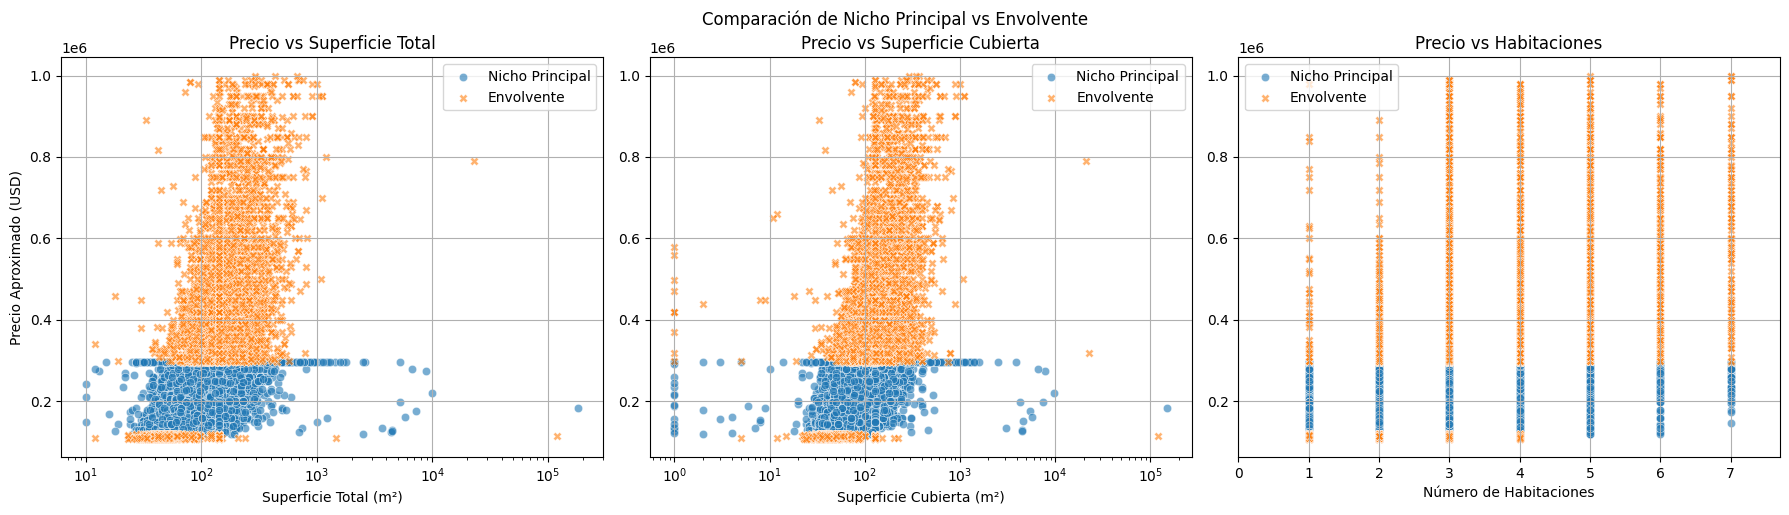

In [53]:
# @title
# Crear una figura con subgráficas (1 fila, 3 columnas)
fig, axes = plt.subplots(1, 3, figsize=(18, 5)) # Ajusta el tamaño de la figura según sea necesario para 3 gráficos uno al lado del otro

# 1. Diagrama de dispersión de surface_total_in_m2 vs price_aprox_usd
sns.scatterplot(data=properties_between_q1_q3_1M, x='surface_total_in_m2', y='price_aprox_usd', label='Nicho Principal', alpha=0.6, marker='o', ax=axes[0])
sns.scatterplot(data=df_envolvente, x='surface_total_in_m2', y='price_aprox_usd', label='Envolvente', alpha=0.6, marker='X', ax=axes[0])
axes[0].set_title('Precio vs Superficie Total') # Título simplificado para el subplot
axes[0].set_xlabel('Superficie Total (m²)')
axes[0].set_ylabel('Precio Aproximado (USD)')
axes[0].legend()
axes[0].grid(True)
axes[0].set_xscale('log') # Aplicar escala logarítmica al eje X

# 2. Diagrama de dispersión de superficie_cubierta_en_m2 vs precio_aprox_usd
sns.scatterplot(data=properties_between_q1_q3_1M, x='surface_covered_in_m2', y='price_aprox_usd', label='Nicho Principal', alpha=0.6, marker='o', ax=axes[1])
sns.scatterplot(data=df_envolvente, x='surface_covered_in_m2', y='price_aprox_usd', label='Envolvente', alpha=0.6, marker='X', ax=axes[1])
axes[1].set_title('Precio vs Superficie Cubierta') # Título simplificado para el subplot
axes[1].set_xlabel('Superficie Cubierta (m²)')
axes[1].set_ylabel('') # Mantener la etiqueta del eje y solo para el primer gráfico para mayor claridad
axes[1].legend()
axes[1].grid(True)
axes[1].set_xscale('log') # Aplicar escala logarítmica al eje X

# 3. Gráfico de dispersión de habitaciones vs precio_aprox_usd
sns.scatterplot(data=properties_between_q1_q3_1M, x='rooms', y='price_aprox_usd', label='Nicho Principal', alpha=0.6, marker='o', ax=axes[2])
sns.scatterplot(data=df_envolvente, x='rooms', y='price_aprox_usd', label='Envolvente', alpha=0.6, marker='X', ax=axes[2])
axes[2].set_title('Precio vs Habitaciones') # Título simplificado para el subplot
axes[2].set_xlabel('Número de Habitaciones')
axes[2].set_ylabel('') # Mantener la etiqueta del eje y solo para el primer gráfico para mayor claridad
axes[2].legend()
axes[2].grid(True)
# Para las habitaciones, use una escala lineal pero ajuste el límite del eje x a un rango razonable
combined_rooms = pd.concat([properties_between_q1_q3_1M['rooms'], df_envolvente['rooms']]).dropna()
if not combined_rooms.empty:
    x_upper_limit_rooms = combined_rooms.quantile(0.99) * 1.1 # Usar el percentil 99 para un límite dinámico
    axes[2].set_xlim(0, x_upper_limit_rooms) # Establecer el límite del eje X desde 0 hasta el límite calculado
else:
    axes[2].set_xlim(0, None) # Límite predeterminado si no hay datos


plt.tight_layout() # Ajustar el diseño para evitar que los títulos/etiquetas se superpongan
plt.suptitle('Comparación de Nicho Principal vs Envolvente', y=1.02) # Agregar un título principal para el conjunto de subgráficos
plt.show()

### Interpretar los hallazgos

Resumir los hallazgos del análisis de las propiedades de la 'envolvente', explicando lo que revelan sobre la estructura del mercado y las transiciones entre diferentes segmentos.

**Razonamiento:** Analice las estadísticas descriptivas y las distribuciones de los pasos anteriores para resumir los hallazgos sobre las propiedades del "envolvente" en comparación con el nicho principal. Esto implica interpretar los resúmenes numéricos, los recuentos de tipos de propiedad y las distribuciones geográficas observadas en los resultados anteriores.

### Resumen del Análisis de la 'Envolvente'

**Comparación de Características Numéricas (Estadísticas Descriptivas):**
Las propiedades en la 'envolvente' presentan, como era de esperar, precios promedio y medianos más altos y más bajos que el nicho principal (dado que la envolvente se definió como los rangos de precio justo fuera del Q1-Q3 del subconjunto < 1M USD). Específicamente:
- La envolvente inferior (precios entre 108.000 y 120.000 USD) contiene propiedades generalmente más pequeñas en superficie total y cubierta. y con menos habitaciones en promedio. que el nicho principal.
- La envolvente superior (precios entre 296.356 y 1.000.000 USD) tiende a incluir propiedades con precios. superficies y número de habitaciones promedio significativamente mayores que el nicho principal.
El precio por m² también muestra variaciones, con el segmento de envolvente superior generalmente teniendo un precio por m² más alto en promedio, lo que sugiere una combinación de ubicación o características de mayor valor.

**Comparación de Distribución de Tipos de Propiedad:**
Aunque los apartamentos son predominantes tanto en el nicho principal como en la 'envolvente', la proporción de otros tipos de propiedad, como casas ('house') y locales comerciales ('store'), es relativamente mayor en la 'envolvente', especialmente en el segmento de precio más alto. Esto indica que, fuera del rango de precio medio de los apartamentos, se encuentran con más frecuencia otros tipos de propiedades.

**Comparación de Distribución Geográfica (Ubicaciones Granulares):**
Si bien muchas de las ubicaciones granulares principales se superponen entre el nicho principal y la 'envolvente', la 'envolvente' muestra una mayor dispersión geográfica y la presencia de ubicaciones que no son tan dominantes en el nicho central. Esto sugiere que las propiedades en los límites de precio del segmento < 1M USD pueden estar ubicadas en una gama más amplia de sub-áreas, incluyendo algunas que son más caras (en la envolvente superior) o menos céntricas/valiosas (en la envolvente inferior) que las del corazón del nicho principal.

### Conclusiones sobre la Estructura del Mercado:
El análisis de la 'envolvente' revela las transiciones en la estructura del mercado alrededor del nicho principal (< 1M USD, Q1-Q3).
- Las propiedades en la **envolvente inferior** (justo por debajo del nicho principal) tienden a ser más pequeñas y/o ubicadas en áreas con precios por m² ligeramente más bajos, representando el extremo inferior del mercado de propiedades 'típicas'.
- Las propiedades en la **envolvente superior** (justo por encima del nicho principal, hasta 1M USD) a menudo son significativamente más grandes, con más habitaciones, y/o ubicadas en sub-áreas de mayor valor, actuando como un puente hacia el segmento de propiedades de lujo o de alto valor (los outliers).
La composición por tipo de propiedad y la distribución geográfica más amplia en la 'envolvente' confirman que los límites de precio del nicho principal marcan un cambio en las características típicas de las propiedades disponibles en el mercado. La transición del nicho principal a los segmentos de precios más altos implica no solo un aumento en el precio, sino también en el tamaño, el número de habitaciones y, a menudo, un cambio hacia tipos de propiedad menos comunes en el nicho central y ubicaciones geográficas más diversas.


### Integrar hallazgos con decisiones de marketing

Discutir cómo la comprensión de la 'envolvente' del mercado puede informar o refinar las estrategias de marketing descriptas en el notebook.

**Razonamiento**:
Resumir los hallazgos del análisis envolvente y analizar cómo estos informan y refinan las estrategias de marketing descritas previamente, integrando la información en una sección de rebajas.


## 13. Aplicación de PCA (Análisis de Componentes Principales)

### 13.1 Preparación de Datos para PCA

In [54]:
# @title
from sklearn.preprocessing import StandardScaler

# 1. Seleccionar las columnas numéricas relevantes para PCA
# Excluimos columnas que son resultados de feature engineering si no queremos que influyan en la reducción de dimensionalidad de las características originales
# También excluimos 'price_aprox_usd' si PCA es un paso previo a la predicción de precio, a menos que queramos ver la estructura de covarianza general incluyendo el precio.
# Para este análisis, incluyamos las características numéricas clave y la latitud/longitud.
numerical_features_for_pca = [
    'lat',
    'lon',
    'price_aprox_usd',
    'surface_total_in_m2',
    'surface_covered_in_m2',
    'price_usd_per_m2', # Podría estar correlacionado con price_aprox_usd y superficies, pero lo incluimos para ver su influencia.
    'rooms',
    'covered_to_total_ratio', # Característica creada, su inclusión depende del objetivo. Incluyamosla por ahora.
    'room_density' # Característica creada, su inclusión depende del objetivo. Incluyamosla por ahora.
]

# Asegurarse de que las columnas seleccionadas existan en el DataFrame y sean numéricas
available_numerical_features = [col for col in numerical_features_for_pca if col in df.columns and np.issubdtype(df[col].dtype, np.number)]

if len(available_numerical_features) < len(numerical_features_for_pca):
    missing = list(set(numerical_features_for_pca) - set(available_numerical_features))
    print(f"Advertencia: Faltan las siguientes columnas numéricas para PCA o no son numéricas: {missing}. Usando solo las columnas disponibles: {available_numerical_features}")
    numerical_features_for_pca = available_numerical_features # Usar solo las columnas disponibles

if not numerical_features_for_pca:
    print("Error: No hay columnas numéricas disponibles para realizar PCA.")
else:
    df_numeric_pca = df[numerical_features_for_pca].copy()

    # 2. Escalar las columnas numéricas seleccionadas
    scaler_pca = StandardScaler()
    scaled_features_pca = scaler_pca.fit_transform(df_numeric_pca)

    print("Datos numéricos seleccionados y escalados para PCA.")
    print("\nPrimeras 5 filas de los datos escalados:")
    # Convertir a DataFrame para una mejor visualización con nombres de columna
    scaled_df_pca = pd.DataFrame(scaled_features_pca, columns=numerical_features_for_pca)
    display(scaled_df_pca.head())

Datos numéricos seleccionados y escalados para PCA.

Primeras 5 filas de los datos escalados:


lat       lon  price_aprox_usd  surface_total_in_m2  \
0  0.450659  0.129448         4.325394             0.104517   
1  0.560026  0.508272         1.253317            -0.013455   
2  0.421466  0.063626         0.118425            -0.012838   
3  0.321296  0.508964        -0.384278            -0.073368   
4  0.575806  0.580299        -0.308111            -0.073368   

   surface_covered_in_m2  price_usd_per_m2     rooms  covered_to_total_ratio  \
0               0.000000          2.046574 -0.015976               -0.290699   
1              -0.004517          2.113115 -0.015976                0.017357   
2              -0.013562          0.028635 -0.682351               -0.042420   
3              -0.072009          1.839895 -0.015976                0.017357   
4              -0.072009          2.540805 -0.015976                0.017357   

   room_density  
0     -0.161120  
1     -0.151499  
2     -0.199327  
3      0.612297  
4      0.612297

### 13.2 Aplicación de PCA

In [55]:
# @title
from sklearn.decomposition import PCA

# Asegurarse de que los datos escalados para PCA estén disponibles
try:
    scaled_features_pca
except NameError:
    print("Error: Los datos escalados para PCA (scaled_features_pca) no están definidos. Por favor, ejecuta la celda 14.1 primero.")
    raise # Detener ejecución si los datos escalados no existen

# Instanciar el modelo PCA
# Podemos empezar con un número de componentes igual al número de características,
# y luego analizar la varianza explicada para decidir cuántos retener.
n_components = scaled_features_pca.shape[1] # Número de columnas en los datos escalados
pca = PCA(n_components=n_components, random_state=42)

# Ajustar PCA a los datos escalados
pca.fit(scaled_features_pca)

print(f"Modelo PCA ajustado con {n_components} componentes.")

Modelo PCA ajustado con 9 componentes.


### 13.3 Análisis de los Componentes Principales

In [56]:
# @title
# Asegurarse de que el modelo PCA ajustado esté disponible
try:
    pca
except NameError:
    print("Error: El modelo PCA (pca) no está definido. Por favor, ejecuta la celda 14.2 primero.")
    raise # Detener ejecución si el modelo PCA no existe

# Varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_
print("Varianza explicada por cada componente principal:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Componente {i+1}: {ratio:.4f} ({ratio*100:.2f}%)")

Varianza explicada por cada componente principal:
Componente 1: 0.2239 (22.39%)
Componente 2: 0.1900 (19.00%)
Componente 3: 0.1229 (12.29%)
Componente 4: 0.1168 (11.68%)
Componente 5: 0.1096 (10.96%)
Componente 6: 0.1073 (10.73%)
Componente 7: 0.0877 (8.77%)
Componente 8: 0.0404 (4.04%)
Componente 9: 0.0013 (0.13%)


In [57]:
# @title
# Varianza acumulada explicada
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
print("\nVarianza acumulada explicada:")
for i, cum_ratio in enumerate(cumulative_explained_variance):
    print(f"Hasta Componente {i+1}: {cum_ratio:.4f} ({cum_ratio*100:.2f}%)")


Varianza acumulada explicada:
Hasta Componente 1: 0.2239 (22.39%)
Hasta Componente 2: 0.4140 (41.40%)
Hasta Componente 3: 0.5369 (53.69%)
Hasta Componente 4: 0.6537 (65.37%)
Hasta Componente 5: 0.7633 (76.33%)
Hasta Componente 6: 0.8706 (87.06%)
Hasta Componente 7: 0.9583 (95.83%)
Hasta Componente 8: 0.9987 (99.87%)
Hasta Componente 9: 1.0000 (100.00%)


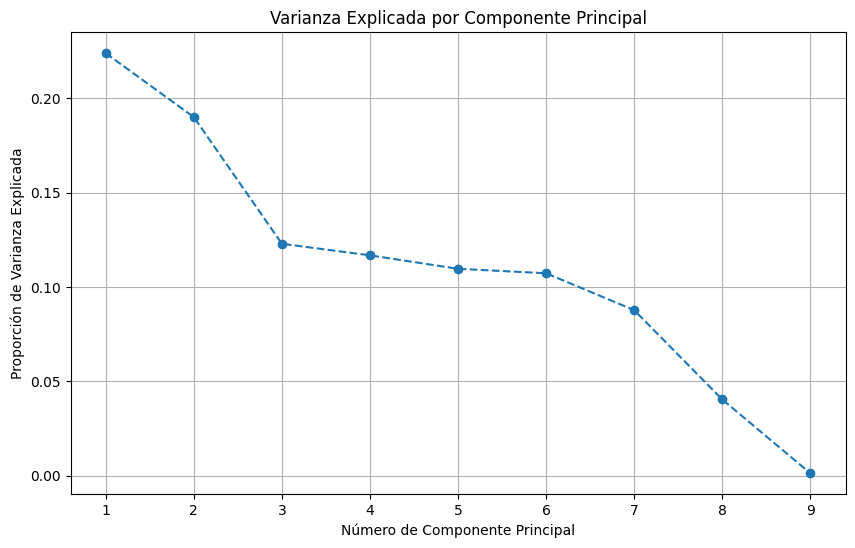

In [58]:
# @title
# Graficar la varianza explicada (Scree Plot)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--')
plt.title('Varianza Explicada por Componente Principal')
plt.xlabel('Número de Componente Principal')
plt.ylabel('Proporción de Varianza Explicada')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True)
plt.show()

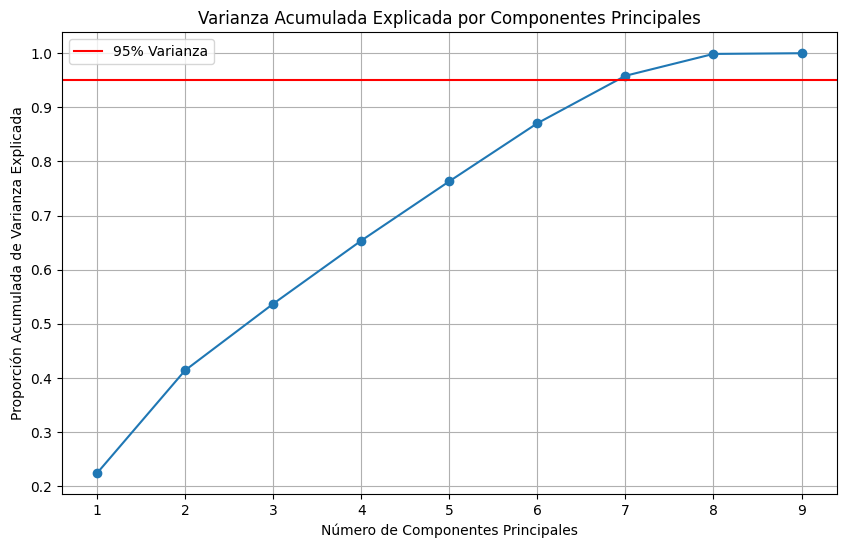

In [59]:
# @title
# Graficar la varianza acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.title('Varianza Acumulada Explicada por Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Proporción Acumulada de Varianza Explicada')
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Varianza') # Add a line for 95% variance
plt.legend()
plt.show()

In [60]:
# @title
# Asegurarse de que el modelo PCA ajustado y los nombres de las características estén disponibles
try:
    pca, numerical_features_for_pca
except NameError:
    print("Error: El modelo PCA (pca) o los nombres de las características numéricas no están definidos. Por favor, ejecuta las celdas 14.1 y 14.2 primero.")
    raise # Detener ejecución si no están disponibles

# Obtener los componentes (vectores propios)
components = pca.components_

# Crear un DataFrame para visualizar los componentes y sus cargas
# Las filas son los componentes principales y las columnas son las características originales
components_df = pd.DataFrame(components, columns=numerical_features_for_pca, index=[f'PC{i+1}' for i in range(components.shape[0])])

print("Pesos (Cargas) de las Características Originales en cada Componente Principal:")
display(components_df)

Pesos (Cargas) de las Características Originales en cada Componente Principal:


lat       lon  price_aprox_usd  surface_total_in_m2  \
PC1  0.018495  0.037657         0.192558             0.669937   
PC2  0.298424  0.212327         0.628755            -0.185411   
PC3 -0.587139  0.234146         0.136636            -0.098982   
PC4  0.202275 -0.269410         0.046919             0.076087   
PC5 -0.101122  0.753718        -0.115420             0.110247   
PC6 -0.186492  0.330775        -0.059363            -0.033871   
PC7  0.692746  0.384056        -0.199464            -0.036687   
PC8 -0.007180  0.033041         0.700061             0.000533   
PC9  0.000452  0.000007        -0.000794            -0.697547   

     surface_covered_in_m2  price_usd_per_m2     rooms  \
PC1               0.684979          0.068762  0.130098   
PC2              -0.157557          0.555719  0.277586   
PC3              -0.065200         -0.351850  0.637411   
PC4              -0.014787         -0.046930  0.426584   
PC5               0.009120          0.128117 -0.073580   
PC6               0.030449          0.155562 -0.311764   
PC7               0.007438         -0.470819  0.193591   
PC8              -0.026178         -0.546043 -0.421504   
PC9               0.706936          0.000177  0.000252   

     covered_to_total_ratio  room_density  
PC1                0.143925     -0.027945  
PC2                0.151904     -0.048731  
PC3                0.193984     -0.001882  
PC4               -0.542472      0.632331  
PC5               -0.602115     -0.108415  
PC6                0.385021      0.761953  
PC7                0.267620      0.025464  
PC8               -0.168028      0.063433  
PC9               -0.116910     -0.000070

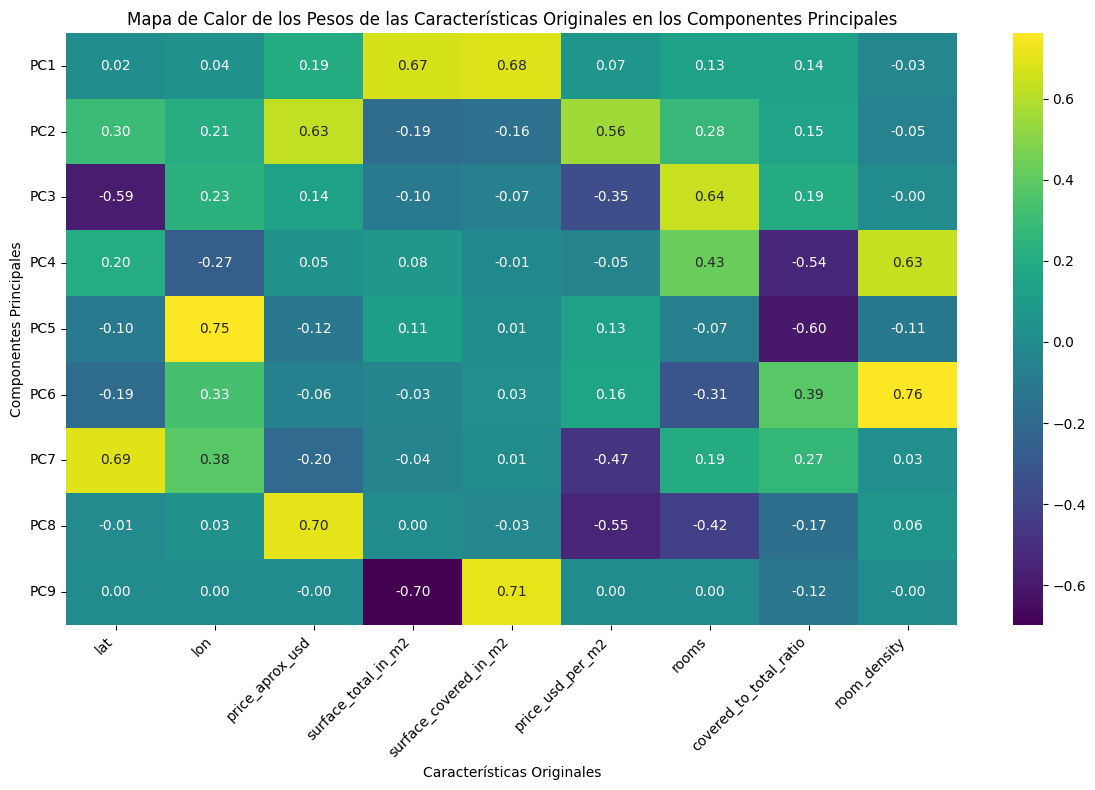

In [61]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que el DataFrame de componentes PCA esté disponible
try:
    components_df
except NameError:
    print("Error: El DataFrame de componentes PCA (components_df) no está definido. Por favor, ejecuta la celda 13.3 (b21e56cb) primero.")
    raise # Detener ejecución si components_df no existe

# Crear el mapa de calor para los pesos de los componentes
plt.figure(figsize=(12, 8))
sns.heatmap(components_df, annot=True, cmap='viridis', fmt=".2f")
plt.title('Mapa de Calor de los Pesos de las Características Originales en los Componentes Principales')
plt.xlabel('Características Originales')
plt.ylabel('Componentes Principales')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Visualizando los resultados del PCA, el siguiente paso sería interpretar estos hallazgos. Puedes analizar:

**- La Varianza Explicada**: ¿Cuánta información (varianza) de los datos originales captura cada componente principal? ¿Cuántos componentes necesitas para explicar una cantidad significativa de la varianza total (por ejemplo, el 95%)?

**- Los Pesos de los Componentes (Component Loadings)**: Observa el mapa de calor para entender qué características originales tienen los pesos más altos (positivos o negativos) en cada componente principal. Esto te dirá qué significan conceptualmente esos componentes. Por ejemplo, un componente con altos pesos en 'price_aprox_usd' y 'surface_covered_in_m2' podría interpretarse como un componente relacionado con el 'tamaño y valor de la propiedad'.

In [62]:
# @title
# Asegurarse de que el DataFrame de componentes PCA esté disponible
try:
    components_df
except NameError:
    print("Error: El DataFrame de componentes PCA (components_df) no está definido. Por favor, ejecuta la celda 13.3 (b21e56cb) primero.")
    raise # Detener ejecución si components_df no existe

# Mostrar las primeras 7 componentes principales
print("Las primeras 7 Componentes Principales:")
display(components_df.head(7))

Las primeras 7 Componentes Principales:


lat       lon  price_aprox_usd  surface_total_in_m2  \
PC1  0.018495  0.037657         0.192558             0.669937   
PC2  0.298424  0.212327         0.628755            -0.185411   
PC3 -0.587139  0.234146         0.136636            -0.098982   
PC4  0.202275 -0.269410         0.046919             0.076087   
PC5 -0.101122  0.753718        -0.115420             0.110247   
PC6 -0.186492  0.330775        -0.059363            -0.033871   
PC7  0.692746  0.384056        -0.199464            -0.036687   

     surface_covered_in_m2  price_usd_per_m2     rooms  \
PC1               0.684979          0.068762  0.130098   
PC2              -0.157557          0.555719  0.277586   
PC3              -0.065200         -0.351850  0.637411   
PC4              -0.014787         -0.046930  0.426584   
PC5               0.009120          0.128117 -0.073580   
PC6               0.030449          0.155562 -0.311764   
PC7               0.007438         -0.470819  0.193591   

     covered_to_total_ratio  room_density  
PC1                0.143925     -0.027945  
PC2                0.151904     -0.048731  
PC3                0.193984     -0.001882  
PC4               -0.542472      0.632331  
PC5               -0.602115     -0.108415  
PC6                0.385021      0.761953  
PC7                0.267620      0.025464

El análisis de la **varianza explicada** nos dice cuánta información o "dispersión" de los datos originales es capturada por cada uno de los nuevos componentes principales.

**- Varianza Explicada por Cada Componente**: La tabla y el gráfico (conocido como "Scree Plot") muestran la proporción de varianza que explica cada componente individualmente. Vemos que el primer componente (PC1) explica la mayor parte de la varianza, el segundo componente (PC2) la segunda mayor parte, y así sucesivamente. La cantidad de varianza explicada disminuye para cada componente subsiguiente.

**- Varianza Acumulada Explicada**: La tabla y el gráfico nos muestran la proporción total de varianza explicada a medida que añadimos más componentes principales. Este gráfico es especialmente útil para decidir cuántos componentes retener. Por ejemplo, si queremos conservar el 95% de la información (varianza) de los datos originales, buscamos en el gráfico o la tabla acumulada cuántos componentes se necesitan para alcanzar o superar ese umbral. En tu caso, vemos que con los primeros **7 componentes principales** ya se explica aproximadamente el **95.83%** de la varianza total. Esto sugiere que podrías usar estos 7 componentes en lugar de las 9 características originales para análisis o modelos posteriores, reduciendo la dimensionalidad sin perder mucha información.

Ya mostrado el mapa de calor de los pesos de los componentes y la tabla con estos pesos para las primeras 7 componentes, el "análisis de component loading" se refiere a interpretar estos pesos para entender qué características originales contribuyen más a cada componente principal.

Para interpretar el mapa de calor o la tabla:

- Cada fila representa un Componente Principal (PC1, PC2, etc.).
- Cada columna representa una característica original (precio, superficies, habitaciones, latitud, longitud, etc.).
- Los **valores** en la tabla (o los **colores** en el mapa de calor) son los pesos o "cargas" de cada característica en ese componente.
- Un peso **alto positivo** significa que la característica original tiene una fuerte relación positiva con ese componente.
- Un peso **alto negativo** significa que la característica original tiene una fuerte relación negativa con ese componente.
- Un peso **cercano a cero** significa que la característica original tiene poca influencia en ese componente.
Por ejemplo, al mirar la PC1 en la tabla o en el mapa de calor, vemos que las características surface_total_in_m2 (0.67) y surface_covered_in_m2 (0.68) tienen los pesos más altos. Esto nos dice que la PC1 es principalmente una combinación lineal de estas dos características de superficie, y la interpretamos como un componente relacionado con el **tamaño general de la propiedad**.

De manera similar, en la PC2, price_aprox_usd (0.63) y price_usd_per_m2 (0.56) tienen los pesos más altos, lo que nos lleva a interpretar la PC2 como un componente relacionado con el **valor de la propiedad y el precio por metro cuadrado**.

### PCA o KNN

El K-Nearest Neighbors (KNN) es un algoritmo que se basa en la distancia entre los puntos de datos para hacer predicciones o clasificaciones. La aplicación de PCA antes de KNN puede influir de varias maneras:

**- Reducción de Dimensionalidad**: KNN puede volverse computacionalmente costoso y menos efectivo (lo que se conoce como la "maldición de la dimensionalidad") con un gran número de características. Al usar PCA, reduces el número de dimensiones de tus datos (por ejemplo, de 9 a 7 componentes principales en tu caso, reteniendo el 95% de la varianza). Esto puede hacer que el algoritmo KNN sea más rápido y eficiente.

**- Eliminación de Ruido**: Los componentes principales con menor varianza explicada (los últimos componentes) a menudo capturan ruido en los datos. Al seleccionar solo los primeros componentes principales (los que explican la mayor parte de la varianza), puedes eliminar parte de este ruido, lo que podría mejorar el rendimiento de KNN.

**- Manejo de Características Correlacionadas**: KNN asume implícitamente que las características son independientes. Si tienes características originales muy correlacionadas, pueden tener un peso desproporcionado en el cálculo de la distancia. PCA transforma las características originales correlacionadas en componentes principales no correlacionados. Esto asegura que cada componente contribuya de manera independiente al cálculo de la distancia en el espacio transformado, lo que puede mejorar la robustez de KNN.

**- Interpretación (Limitada para KNN con PCA)**: Si bien PCA ayuda a KNN, los componentes principales no siempre tienen una interpretación directa en términos de las características originales. Esto hace que sea más difícil entender por qué KNN hizo una predicción particular en el espacio de PCA, en comparación con usar las características originales directamente.

**En resumen: Usar PCA antes de KNN puede ser beneficioso para mejorar el rendimiento, reducir el tiempo de cálculo y hacer que el modelo sea más robusto a características correlacionadas y ruido, al tiempo que se conserva la mayor parte de la información relevante en los datos. Sin embargo, pierdes la interpretabilidad directa de las características originales en el modelo KNN final.**

### PCA o SVM

**SVM** es un algoritmo poderoso, especialmente en espacios de alta dimensión. Sin embargo, también puede beneficiarse de la aplicación de PCA de las siguientes maneras:

**- Reducción de Dimensionalidad**: Al igual que con KNN, si tienes un número muy alto de características, PCA puede reducir la dimensionalidad de tus datos al seleccionar un subconjunto de componentes principales que capturen la mayor parte de la varianza. Esto puede hacer que el entrenamiento del modelo SVM sea más rápido y reducir el riesgo de "sobreajuste" (overfitting), especialmente si tienes un conjunto de datos limitado en comparación con el número de características.

**- Manejo de Ruido**: Como mencionamos antes, los componentes principales con baja varianza explicada a menudo representan ruido. Al eliminar estos componentes, PCA puede ayudar a crear un conjunto de datos "más limpio" para el entrenamiento de SVM, lo que potencialmente puede mejorar la capacidad del modelo para generalizar a nuevos datos.

**- Simplificación para Ciertos Kernels**: Los SVM utilizan funciones de kernel para mapear los datos a un espacio de mayor dimensión donde la separación de clases puede ser más sencilla. Algunos kernels (como el kernel lineal) pueden ser sensibles a la multicolinealidad (características altamente correlacionadas). Al usar PCA, transformas las características originales en componentes no correlacionados, lo que puede ser ventajoso para estos kernels o simplificar la elección del kernel adecuado.

**- Visualización (para SVM de menor dimensión)**: Aunque no es una mejora directa del rendimiento del modelo, si reduces los datos a 2 o 3 componentes principales, puedes visualizar los datos transformados y la frontera de decisión del SVM en un espacio de menor dimensión, lo que puede ayudar a entender el modelo (esto es más útil con kernels lineales o polinomiales de bajo grado).

**En qué mejoraría SVM con PCA:**

**- Tiempo de Entrenamiento Reducido**: Con menos dimensiones, el algoritmo de entrenamiento de SVM suele converger más rápido.

**- Posible Mejora en la Precisión**: Al reducir el ruido y manejar las características correlacionadas, el modelo SVM puede aprender fronteras de decisión más robustas, lo que lleva a una mejor precisión en datos no vistos.

**- Menor Riesgo de Sobreajuste**: Con menos características (componentes principales), el modelo tiene menos parámetros para aprender, lo que puede ayudar a prevenir el sobreajuste, especialmente en conjuntos de datos pequeños.

**Consideraciones:**
- La mejora del rendimiento no siempre está garantizada. En algunos casos, si la información relevante está distribuida uniformemente en todas las características originales o si el kernel de SVM ya maneja bien la alta dimensionalidad y la correlación, PCA podría no ofrecer una mejora significativa o incluso podría empeorar el rendimiento si los componentes eliminados contenían información importante.
- Al igual que con KNN, los componentes principales son combinaciones lineales de las características originales, lo que puede dificultar la interpretación directa de la frontera de decisión del SVM en términos de las características del mundo real.
En resumen, PCA puede ser una herramienta útil antes de aplicar SVM, especialmente si tienes un dataset con muchas características, ruido o alta correlación entre ellas. Podría resultar en un modelo más rápido, más robusto y con mejor capacidad de generalización.

OBSERVACION: No se aplica KNN ni SVM, ya que no se garantiza una mejora sustancial en los valores de pesos, tiempos de calculos y valores ya aportados por PCA y se elije no apliar el presente informe.

## 14. Conclusión final:

* El nicho principal de mercado para propiedades por debajo de 1.000.000 USD se identificó entre aproximadamente \$120.000 (Q1) y \$296.356 (Q3).
* La 'envolvente' que rodea este nicho se definió en dos partes:
  * **Envolvente Inferior:** Propiedades con precios entre aproximadamente \$108.000 (o el precio mínimo general) y \$120.000.
  * **Envolvente Superior:** Propiedades con precios entre aproximadamente \$296.356 y \$1.000.000.
* Se encontraron un total de 5081 propiedades dentro de estos rangos combinados de la 'envolvente'.
* Las propiedades en la 'envolvente' generalmente tienen precios promedio y medianos, área de superficie total, área de superficie cubierta y número de habitaciones más altos en comparación con el nicho principal, particularmente en la envolvente superior.
* El precio promedio por metro cuadrado también fue más alto en la 'envolvente', lo que sugiere un valor potencialmente mayor por metro cuadrado en los límites del mercado.
* Si bien 'apartment' es el tipo de propiedad más común en ambos segmentos, la 'envolvente' tiene una proporción relativamente mayor de propiedades tipo 'house' y 'store', especialmente en la envolvente superior.
* La 'envolvente' muestra una mayor dispersión geográfica e incluye ubicaciones menos dominantes en el nicho principal, lo que sugiere una gama más amplia de sub-áreas en los límites de precio.

## 15. Plan de trabajo y decisiones de marketing - Refinamiento con el Análisis de la Envolvente

### **NICHO PRINCIPAL (Refinado con la Envolvente):**

El análisis de la 'envolvente' ha enriquecido nuestra comprensión del mercado alrededor del nicho principal (departamentos entre 120.000 y 296.355 USD). Si bien este nicho sigue siendo el foco principal (aproximadamente 51.75% del dataset), la 'envolvente' nos muestra qué hay justo fuera de estos límites de precio y cómo son esas propiedades.

**Implicaciones para las Estrategias de Marketing:**

1.  **Líneas de Créditos Hipotecarios y Financiamiento:**
    - La estrategia de consultar líneas de crédito hipotecario hasta 300.000 USD sigue siendo fundamental para el nicho principal.
    - Sin embargo, el análisis de la envolvente superior (propiedades entre 296.355 y 1.000.000 USD) sugiere que también deberíamos explorar opciones de financiamiento para rangos de precios ligeramente superiores. Propiedades en este segmento de la envolvente a menudo son más grandes o están en ubicaciones de mayor valor. Entender las opciones de crédito disponibles para compradores que pueden estirar un poco su presupuesto más allá del nicho principal es crucial para captar este segmento de transición.
    - Para la envolvente inferior (propiedades entre 108.000 y 120.000 USD), si bien representan un volumen menor, entender las opciones de financiamiento para compradores con presupuestos más ajustados podría abrir un segmento de mercado adicional.

2.  **Publicidad Intensiva y Diferenciación:**
    - La publicidad intensiva en el nicho principal de apartamentos (120.000 - 296.355 USD) debe continuar, destacando las características típicas de este segmento (tamaño, habitaciones, ubicación común).
    - La comprensión de la envolvente permite diferenciar la publicidad:
        - **Envolvente Superior:** La publicidad para propiedades en este rango (296.355 - 1.000.000 USD) debe enfocarse en destacar sus atributos diferenciadores: mayor tamaño, más habitaciones, ubicaciones premium (como Palermo Chico o sub-áreas de Belgrano con precios más altos), o tipos de propiedad menos comunes en el nicho (casas, locales). El mensaje debe atraer a compradores que buscan 'dar un paso más' o que tienen un presupuesto mayor.
        - **Envolvente Inferior:** La publicidad para propiedades en este rango (108.000 - 120.000 USD) podría enfocarse en la accesibilidad al mercado, destacando el precio como una ventaja y resaltando características clave para compradores con presupuesto limitado (ej. 'Ideal para primera vivienda', 'Excelente relación precio-m²').
    - La identificación de otros tipos de propiedad (casas, locales) más frecuentes en la envolvente superior resalta la necesidad de adaptar los canales y mensajes publicitarios para estos segmentos específicos, que pueden buscar características o ubicaciones diferentes a los compradores de apartamentos del nicho principal.

3.  **Modelos Predictivos y Ajuste de Precios:**
    - El análisis de la envolvente es vital para refinar modelos predictivos. Al entender las características de las propiedades justo fuera del nicho principal, los modelos pueden ser más precisos al predecir precios dentro del nicho, considerando cómo se valoran las características en segmentos de precio adyacentes.
    - La comparación de propiedades en el nicho principal con aquellas en la envolvente puede ayudar a identificar propiedades potencialmente subvaloradas o sobrevaloradas. Por ejemplo, un apartamento en el nicho principal con características (superficie, habitaciones) y ubicación similares a propiedades en la envolvente superior, pero con un precio más cercano al Q3 del nicho, podría estar bien posicionado. Inversamente, una propiedad en el nicho con características más alineadas a la envolvente inferior pero con un precio cercano al Q3 podría necesitar revisión.
    - La estrategia de ajustar precios con los propietarios debe considerar la posición de la propiedad dentro del nicho o la envolvente, utilizando las características típicas de cada segmento como referencia. Para propiedades atípicas o en los límites, la comparación directa con propiedades similares en la envolvente es clave para un ajuste realista.

**En resumen, el análisis de la 'envolvente' proporciona un contexto crucial para las decisiones de marketing. Permite pasar de una estrategia centrada únicamente en el segmento medio del nicho principal a una estrategia más matizada que reconoce y aborda las transiciones del mercado, diferenciando las tácticas de financiamiento, publicidad y ajuste de precios para propiedades en los límites del nicho y en los segmentos de mayor valor.**